<h1><center>Used Car Price Prediction</center><h1>

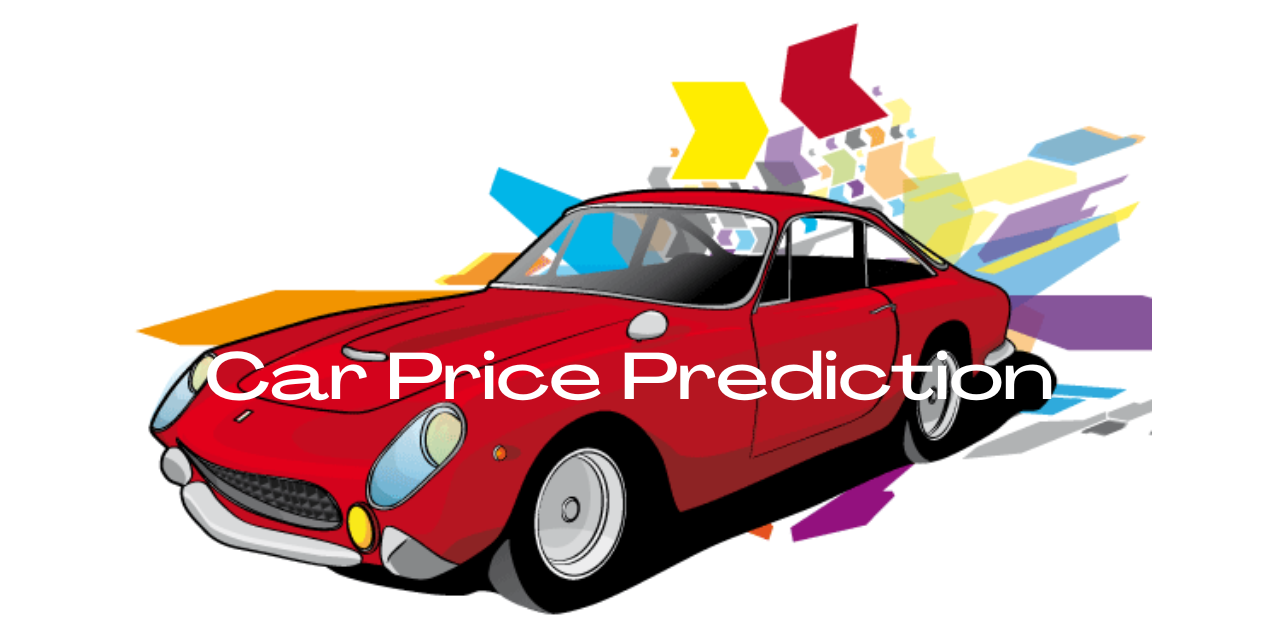

## Overview
__Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.__

__Your Goal: The goal of this competition is to predict the price of used cars based on various attributes.__

__Dataset Description__
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Used Car Price Prediction Dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

__Files__
- train.csv - the training dataset; price is the continuous target
- test.csv - the test dataset; your objective is to predict the value of price for each row
- sample_submission.csv - a sample submission file in the correct format

__Dataset Link -__ kaggle competitions download -c playground-series-s4e9

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Aaqui\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Import Dataset

In [2]:
train_df = pd.read_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\train.csv\train.csv')
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

## Data Preprocessing

In [3]:
train_df.shape

(188533, 13)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
train_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [6]:
train_df.isna().sum()/len(train_df)*100

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64

In [7]:
train_df.duplicated().sum()

0

In [8]:
test_df = pd.read_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\test.csv\test.csv')
test_df.head()

id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1           Silver   Black  None reported         Yes  
2            White   Ebony  None reported         NaN  
3  Silician Yellow   Black  None reported         NaN  
4             Gray   Black  None reported         Yes

In [9]:
test_df.shape

(125690, 12)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [11]:
test_df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [12]:
test_df.isna().sum()/len(test_df)*100

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.691543
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.298433
clean_title     11.328666
dtype: float64

In [13]:
test_df.duplicated().sum()

0

## Insights:
- __There are 188533 rows and 13 columns in train dataset while 125690 rows and 12 columns are there in test dataset__
- __There are 2.69%, 1.30% and 11.32% of missing data in fuel type, accident and clean title respectively for  both train and test dataset__
- __There are no duplicate values in both the dataset__
- __The Year is in integer data type and there is no need to change it's data type as it still serves the same purpose__

### Unique Values in both the dataset

In [14]:
for col in train_df.columns:
    print(f'Total number of unique values in {col}: {train_df[col].nunique()}')

Total number of unique values in id: 188533
Total number of unique values in brand: 57
Total number of unique values in model: 1897
Total number of unique values in model_year: 34
Total number of unique values in milage: 6651
Total number of unique values in fuel_type: 7
Total number of unique values in engine: 1117
Total number of unique values in transmission: 52
Total number of unique values in ext_col: 319
Total number of unique values in int_col: 156
Total number of unique values in accident: 2
Total number of unique values in clean_title: 1
Total number of unique values in price: 1569


In [15]:
for col in test_df.columns:
    print(f'Total number of unique values in {col}: {test_df[col].nunique()}')

Total number of unique values in id: 125690
Total number of unique values in brand: 55
Total number of unique values in model: 1891
Total number of unique values in model_year: 36
Total number of unique values in milage: 5700
Total number of unique values in fuel_type: 7
Total number of unique values in engine: 1117
Total number of unique values in transmission: 52
Total number of unique values in ext_col: 317
Total number of unique values in int_col: 156
Total number of unique values in accident: 2
Total number of unique values in clean_title: 1


### Missing values in both the dataset

In [16]:
miss_cols = [col for col in train_df.columns if train_df[col].isnull().any()]
miss_cols

['fuel_type', 'accident', 'clean_title']

In [17]:
for mcol in miss_cols:
    print(f'Total number of values in {mcol}')
    print(train_df[mcol].value_counts())
    print('-'*50)

Total number of values in fuel_type
fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64
--------------------------------------------------
Total number of values in accident
accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64
--------------------------------------------------
Total number of values in clean_title
clean_title
Yes    167114
Name: count, dtype: int64
--------------------------------------------------


In [18]:
miss_cols1 = [col for col in test_df.columns if test_df[col].isnull().any()]
miss_cols1

['fuel_type', 'accident', 'clean_title']

In [19]:
for mcol in miss_cols:
    print(f'Total number of values in {mcol}')
    print(test_df[mcol].value_counts())
    print('-'*50)

Total number of values in fuel_type
fuel_type
Gasoline          110533
Hybrid              4676
E85 Flex Fuel       3523
Diesel              2686
–                    538
Plug-In Hybrid       337
not supported         14
Name: count, dtype: int64
--------------------------------------------------
Total number of values in accident
accident
None reported                             96263
At least 1 accident or damage reported    27795
Name: count, dtype: int64
--------------------------------------------------
Total number of values in clean_title
clean_title
Yes    111451
Name: count, dtype: int64
--------------------------------------------------


## Insights:
- __We have missing values in fuel_type, clean_title and accident columns which will be treated as per business needs__

## Handling Missing Values

### 1. For train data

### Replace '-' with CNG as per business intuition 

In [20]:
replace_dict = {'–' : 'CNG', 'not supported' : 'Gasoline'}

train_df['fuel_type'].replace(replace_dict, inplace = True)

In [21]:
train_df[['fuel_type','accident','clean_title']].dtypes

fuel_type      object
accident       object
clean_title    object
dtype: object

### Since all the missing columns are of object data type, so we can fill those values with modal value

In [22]:
train_df['fuel_type'].fillna(train_df['fuel_type'].mode()[0], inplace=True)

In [23]:
train_df['accident'].fillna(train_df['accident'].mode()[0], inplace=True)

In [24]:
train_df['clean_title'].fillna('No', inplace=True)

In [25]:
train_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

### For test data

In [26]:
replace_dict1 = {'–' : 'CNG', 'not supported' : 'Gasoline'}

test_df['fuel_type'].replace(replace_dict1, inplace = True)

In [27]:
test_df[['fuel_type','accident','clean_title']].dtypes

fuel_type      object
accident       object
clean_title    object
dtype: object

In [28]:
test_df['fuel_type'].fillna(test_df['fuel_type'].mode()[0], inplace=True)

In [29]:
test_df['accident'].fillna(test_df['accident'].mode()[0], inplace=True)

In [30]:
test_df['clean_title'].fillna('No', inplace=True)

In [31]:
test_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

## Insights;
- __All the missing values are treated and now there is no null values__

## Feature Engineering

### Make new columns

### 1. For train data

In [32]:
from datetime import datetime

current_year = datetime.now().year
train_df['vehicle_age'] = current_year - train_df['model_year']
print(train_df['vehicle_age'])

0         17
1         22
2         22
3          7
4          3
          ..
188528     7
188529     6
188530     3
188531     2
188532     8
Name: vehicle_age, Length: 188533, dtype: int64


In [33]:
train_df['mileage_per_year'] = np.where(train_df['vehicle_age'] != 0, 
                                        round(train_df['milage'] / train_df['vehicle_age'], 0), 
                                        0)
train_df['mileage_per_year']

0         12529.0
1          6511.0
2          6215.0
3          2786.0
4          2463.0
           ...   
188528     7000.0
188529     4767.0
188530     4550.0
188531     6948.0
188532     7438.0
Name: mileage_per_year, Length: 188533, dtype: float64

In [34]:
train_df['engine_size'] = train_df.engine.str.split(' ').str[1]
train_df['engine_size'].head()

0    1.6L
1    3.9L
2    5.3L
3    5.0L
4    2.0L
Name: engine_size, dtype: object

In [35]:
non_l_df = train_df[~train_df['engine_size'].str.contains('L', na=False)]
non_l_df.engine_size.unique()

array(['V6', 'Motor', 'V10', 'Electric', 'V8', 'I4', nan, 'H6', 'H4',
       'I3', 'V12', 'I6', 'Turbo', '8', 'Range', '24V', 'W12', 'Cylinder',
       '4', 'W16', 'AH', '/', 'AC'], dtype=object)

In [36]:
replacement_dict = {
    'V6': '3.0L',
    'Motor': '2.0L',
    'V10': '5.0L',
    'Electric': '0.0L',
    'V8': '4.0L',
    'I4': '2.0L',
    'Liter' : '2.0L',
    np.nan: '0.0L',  # or any specific engine size you want for NaN
    'H6': '3.0L',
    'H4': '2.0L',
    'I3': '1.0L',
    'V12': '6.0L',
    'I6': '3.0L',
    'Turbo': '2.0L',
    '8': '4.0L',
    'Range': '1.0L',
    '24V': '2.0L',
    'W12': '6.0L',
    'Cylinder': '1.0L',
    '4': '2.0L',
    'W16': '8.0L',
    'AH': '1.0L',
    '/': '0.0L',
    'AC': '0.0L'
}
train_df['engine_size'] = train_df['engine_size'].replace(replacement_dict)
train_df.engine_size.unique()

array(['1.6L', '3.9L', '5.3L', '5.0L', '2.0L', '3.0L', '3.6L', '6.2L',
       '4.4L', '4.0L', '4.6L', '3.7L', '5.7L', '6.7L', '0.0L', '3.5L',
       '2.8L', '5.5L', '5.4L', '6.8L', '3.8L', '2.5L', '2.4L', '3.3L',
       '2.3L', '3.2L', '4.7L', '1.8L', '2.7L', '3.4L', '6.0L', '4.8L',
       '5.6L', '4.3L', '4.2L', '5.2L', '1.0L', '6.4L', '8.3L', '2.1L',
       '1.4L', '4.5L', '1.3L', '2.9L', '1.7L', '6.6L', '2.2L', '6.3L',
       '6.1L', '7.3L', '6.5L', '1.5L', '0.65L', '6.75L', '7.0L', '5.9L',
       '8.1L', '5.8L', '8.4L', '8.0L', '7.4L', '1.2L'], dtype=object)

In [37]:
train_df['engine_size'] = train_df['engine_size'].str.extract(r'(\d+\.\d+)').astype(float)

In [38]:
train_df['engine_size'].head()

0    1.6
1    3.9
2    5.3
3    5.0
4    2.0
Name: engine_size, dtype: float64

In [39]:
transmissions = [
    'A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
    '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic', '9-Speed Automatic',
    '5-Speed A/T', 'Automatic', '7-Speed Automatic with Auto-Shift', 'CVT Transmission', '5-Speed M/T',
    'M/T', '6-Speed M/T', '6-Speed Automatic', '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
    '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T', '6-Speed Manual', 'Transmission Overdrive Switch',
    '8-Speed Automatic with Auto-Shift', '7-Speed Manual', '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
    '6-Speed Automatic with Auto-Shift', '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
    '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt', '5-Speed Automatic', '2-Speed Automatic',
    '8-SPEED A/T', '7-Speed', 'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',
    '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic', 'SCHEDULED FOR OR IN PRODUCTION', '6-Speed',
    '6 Speed Mt'
]

def type_transmission(value):
    value = str(value).upper()  # Convert to string and uppercase for case-insensitive matching
    if 'DCT' in value:
        return 'DCT'
    elif any(keyword in value for keyword in ['A/T', 'AUTOMATIC', 'AT', 'TRANSMISSION OVERDRIVE SWITCH']):
        return 'Automatic'
    elif any(keyword in value for keyword in ['M/T', 'MANUAL', '-']):
        return 'Manual'
    elif 'CVT' in value or 'VARIABLE' in value:
        return 'CVT'
    elif 'SINGLE-SPEED FIXED GEAR' in value:
        return 'Electric Vehicle'
    elif any(keyword in value for keyword in ['A/T', 'M/T']) and 'BOTH' in value:
        return 'Both'
    else:
        return 'Other'  # Default for unspecified types

# Apply the function without altering the original dataframe structure
train_df['transmission_type'] = train_df['transmission'].apply(type_transmission)
train_df.transmission_type.head()

0    Automatic
1    Automatic
2    Automatic
3        Other
4    Automatic
Name: transmission_type, dtype: object

In [40]:
train_df.transmission_type.value_counts()

transmission_type
Automatic    150473
Other         19541
Manual        16445
CVT            2056
DCT              18
Name: count, dtype: int64

### For test data

In [41]:
from datetime import datetime

current_year = datetime.now().year
test_df['vehicle_age'] = current_year - test_df['model_year']
print(test_df['vehicle_age'])

0          9
1          4
2          2
3          8
4          6
          ..
125685    10
125686     5
125687    12
125688    12
125689     6
Name: vehicle_age, Length: 125690, dtype: int64


In [42]:
test_df['mileage_per_year'] = np.where(test_df['vehicle_age'] != 0, 
                                        round(test_df['milage'] / test_df['vehicle_age'], 0), 
                                        0)
test_df['mileage_per_year']

0         10889.0
1          2286.0
2         14060.0
3          7657.0
4          9833.0
           ...   
125685     8332.0
125686     5867.0
125687     6470.0
125688     9333.0
125689    11140.0
Name: mileage_per_year, Length: 125690, dtype: float64

In [43]:
test_df['engine_size'] = test_df.engine.str.split(' ').str[1]
test_df['engine_size'].head()

0     2.0L
1     3.0L
2       V6
3    Liter
4     2.0L
Name: engine_size, dtype: object

In [44]:
non_l_df1 = test_df[~test_df['engine_size'].str.contains('L', na=False)]
non_l_df1.engine_size.unique()

array(['V6', 'V8', 'I4', 'Electric', nan, 'Motor', 'H6', 'V12', 'I6',
       'V10', '8', 'H4', 'I3', 'W12', 'Turbo', 'W16', 'AH', 'Range',
       'Cylinder', '4', 'AC', '24V', '/'], dtype=object)

In [45]:
replacement_dict1 = {
    'V6': '3.0L',
    'Motor': '2.0L',
    'V10': '5.0L',
    'Electric': '0.0L',
    'V8': '4.0L',
    'I4': '2.0L',
    'Liter' : '2.0L',
    np.nan: '0.0L',  # or any specific engine size you want for NaN
    'H6': '3.0L',
    'H4': '2.0L',
    'I3': '1.0L',
    'V12': '6.0L',
    'I6': '3.0L',
    'Turbo': '2.0L',
    '8': '4.0L',
    'Range': '1.0L',
    '24V': '2.0L',
    'W12': '6.0L',
    'Cylinder': '1.0L',
    '4': '2.0L',
    'W16': '8.0L',
    'AH': '1.0L',
    '/': '0.0L',
    'AC': '0.0L'
}
test_df['engine_size'] = test_df['engine_size'].replace(replacement_dict1)
test_df.engine_size.unique()

array(['2.0L', '3.0L', '4.8L', '3.5L', '5.5L', '3.3L', '3.7L', '4.6L',
       '4.0L', '5.0L', '6.7L', '3.8L', '1.5L', '2.5L', '5.7L', '6.0L',
       '6.2L', '3.6L', '2.3L', '4.4L', '2.7L', '5.3L', '2.4L', '5.6L',
       '4.7L', '1.6L', '6.8L', '5.4L', '3.2L', '1.8L', '0.0L', '6.5L',
       '7.0L', '3.9L', '3.4L', '6.3L', '2.9L', '6.6L', '0.65L', '4.3L',
       '8.3L', '5.2L', '4.2L', '6.4L', '2.1L', '1.4L', '6.1L', '7.4L',
       '7.3L', '4.5L', '1.0L', '2.2L', '5.9L', '2.8L', '6.75L', '8.0L',
       '8.4L', '5.8L', '1.7L', '1.3L', '8.1L', '1.2L'], dtype=object)

In [46]:
test_df['engine_size'] = test_df['engine_size'].str.extract(r'(\d+\.\d+)').astype(float)

In [47]:
test_df['engine_size'].head()

0    2.0
1    3.0
2    3.0
3    2.0
4    2.0
Name: engine_size, dtype: float64

In [48]:
transmissions = [
    'A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
    '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic', '9-Speed Automatic',
    '5-Speed A/T', 'Automatic', '7-Speed Automatic with Auto-Shift', 'CVT Transmission', '5-Speed M/T',
    'M/T', '6-Speed M/T', '6-Speed Automatic', '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
    '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T', '6-Speed Manual', 'Transmission Overdrive Switch',
    '8-Speed Automatic with Auto-Shift', '7-Speed Manual', '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
    '6-Speed Automatic with Auto-Shift', '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
    '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt', '5-Speed Automatic', '2-Speed Automatic',
    '8-SPEED A/T', '7-Speed', 'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',
    '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic', 'SCHEDULED FOR OR IN PRODUCTION', '6-Speed',
    '6 Speed Mt'
]

def type_transmission(value):
    value = str(value).upper()  # Convert to string and uppercase for case-insensitive matching
    if 'DCT' in value:
        return 'DCT'
    elif any(keyword in value for keyword in ['A/T', 'AUTOMATIC', 'AT', 'TRANSMISSION OVERDRIVE SWITCH']):
        return 'Automatic'
    elif any(keyword in value for keyword in ['M/T', 'MANUAL', '-']):
        return 'Manual'
    elif 'CVT' in value or 'VARIABLE' in value:
        return 'CVT'
    elif 'SINGLE-SPEED FIXED GEAR' in value:
        return 'Electric Vehicle'
    elif any(keyword in value for keyword in ['A/T', 'M/T']) and 'BOTH' in value:
        return 'Both'
    else:
        return 'Other'  # Default for unspecified types

# Apply the function without altering the original dataframe structure
test_df['transmission_type'] = test_df['transmission'].apply(type_transmission)
test_df.transmission_type.head()

0    Automatic
1    Automatic
2    Automatic
3    Automatic
4    Automatic
Name: transmission_type, dtype: object

In [49]:
test_df.transmission_type.value_counts()

transmission_type
Automatic    100432
Other         13008
Manual        10844
CVT            1395
DCT              11
Name: count, dtype: int64

In [50]:
train_df.head(3)

id      brand              model  model_year  milage      fuel_type  \
0   0       MINI      Cooper S Base        2007  213000       Gasoline   
1   1    Lincoln              LS V8        2002  143250       Gasoline   
2   2  Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   

                                              engine transmission ext_col  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel          A/T  Yellow   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel          A/T  Silver   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...          A/T    Blue   

  int_col                                accident clean_title  price  \
0    Gray                           None reported         Yes   4200   
1   Beige  At least 1 accident or damage reported         Yes   4999   
2    Gray                           None reported         Yes  13900   

   vehicle_age  mileage_per_year  engine_size transmission_type  
0           17           12529.0          1.6         Automatic  
1           22            6511.0          3.9         Automatic  
2           22            6215.0          5.3         Automatic

In [51]:
test_df.head(3)

id brand               model  model_year  milage fuel_type  \
0  188533  Land      Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land   Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford  Expedition Limited        2022   28121  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   

  ext_col int_col       accident clean_title  vehicle_age  mileage_per_year  \
0   White   Beige  None reported         Yes            9           10889.0   
1  Silver   Black  None reported         Yes            4            2286.0   
2   White   Ebony  None reported          No            2           14060.0   

   engine_size transmission_type  
0          2.0         Automatic  
1          3.0         Automatic  
2          3.0         Automatic

## Outlier Detection

### For train dataset

In [52]:
num_cols = ['model_year','milage', 'price', 'vehicle_age', 'mileage_per_year','engine_size']

for i in range(len(num_cols)):
    num_data = train_df[num_cols[i]].tolist()

    minim = np.min(num_data)
    _5th_percentile = round(np.percentile(num_data, 5),2)
    Q1 = np.percentile(num_data, 25)
    Q2 = np.median(num_data)
    Q3 = np.percentile(num_data, 75)
    _95th_percentile = round(np.percentile(num_data, 95),2)
    mean = round(np.mean(num_data),2)
    maxim = np.max(num_data)
    Normal_range = maxim - minim
    IQR = Q3 - Q1
    lower_mid_outlier = Q1-1.5*IQR
    upper_mid_outlier = Q3+1.5*IQR

    lower_outliers = []
    upper_outliers = []

    for j in num_data:
        if j < lower_mid_outlier:
            lower_outliers.append(j)
        elif j > upper_mid_outlier:
            upper_outliers.append(j)

    lower_mid_outlier_pct = round((len(lower_outliers)/train_df.shape[0])*100,2)
    upper_mid_outlier_pct = round((len(upper_outliers)/train_df.shape[0])*100,2)
    
    print()
    print(f"Outlier detection of {num_cols[i]}")
    print("-"*30)
    print(f"Minimum: {minim}")
    print(f"5th percentile of {num_cols[i]}: {_5th_percentile}")
    print(f"Q1: {Q1}")
    print(f"Q2: {Q2}")
    print(f"Q3: {Q3}")
    print(f"95th percentile of {num_cols[i]}: {_95th_percentile}")
    print(f"Average value of {num_cols[i]} : {mean}")
    print(f"Maximum: {maxim}")
    print(f"Normal range: {Normal_range}")
    print(f"IQR: {IQR}")
    print(f"Lower mid outlier: {lower_mid_outlier}")
    print(f"Upper mid outlier: {upper_mid_outlier}")
    print(f"Mid Outliers range: {upper_mid_outlier - lower_mid_outlier}")
    print(f"Lower Outliers percentage: {lower_mid_outlier_pct}%")
    print(f"Upper Outliers percentage: {upper_mid_outlier_pct}%")
    print(f"Overall Ouliers percentage: {lower_mid_outlier_pct + upper_mid_outlier_pct}%")
    print(f"Total No of Outliers: {len(lower_outliers) + len(upper_outliers)}")
    print('-'*70)
    print(f"Lower Outliers: {lower_outliers}")
    print(f"Upper Outliers: {upper_outliers}")
    print('-'*120)


Outlier detection of model_year
------------------------------
Minimum: 1974
5th percentile of model_year: 2004.0
Q1: 2013.0
Q2: 2017.0
Q3: 2020.0
95th percentile of model_year: 2022.0
Average value of model_year : 2015.83
Maximum: 2024
Normal range: 50
IQR: 7.0
Lower mid outlier: 2002.5
Upper mid outlier: 2030.5
Mid Outliers range: 28.0
Lower Outliers percentage: 2.72%
Upper Outliers percentage: 0.0%
Overall Ouliers percentage: 2.72%
Total No of Outliers: 5132
----------------------------------------------------------------------
Lower Outliers: [2002, 2002, 2001, 2000, 2002, 2001, 2001, 2001, 2001, 2002, 2001, 2001, 2001, 2001, 1997, 1998, 2001, 2000, 1999, 1997, 2001, 2000, 2002, 2001, 2001, 2001, 1999, 1997, 1999, 2002, 2001, 2001, 1999, 2001, 2002, 2001, 2002, 2001, 2002, 1998, 1994, 2002, 2001, 2001, 2002, 2002, 1993, 1993, 1999, 1998, 1999, 2001, 2001, 2001, 2001, 2002, 2000, 2002, 1997, 1997, 2002, 1996, 1994, 2002, 2001, 1997, 2002, 2000, 1998, 1994, 2002, 2002, 2000, 1996, 2


Outlier detection of price
------------------------------
Minimum: 2000
5th percentile of price: 6999.0
Q1: 17000.0
Q2: 30825.0
Q3: 49900.0
95th percentile of price: 107900.0
Average value of price : 43878.02
Maximum: 2954083
Normal range: 2952083
IQR: 32900.0
Lower mid outlier: -32350.0
Upper mid outlier: 99250.0
Mid Outliers range: 131600.0
Lower Outliers percentage: 0.0%
Upper Outliers percentage: 5.77%
Overall Ouliers percentage: 5.77%
Total No of Outliers: 10880
----------------------------------------------------------------------
Lower Outliers: []
Upper Outliers: [104900, 165000, 244896, 145000, 193063, 101000, 99950, 110000, 2954083, 124900, 315000, 267950, 140000, 489000, 175000, 146000, 349950, 166900, 145000, 197750, 275000, 449995, 130000, 250000, 131999, 275000, 107900, 112500, 349950, 108900, 417500, 143900, 99950, 279950, 173995, 116999, 99750, 239995, 115999, 399900, 139000, 105000, 254900, 239995, 166900, 116999, 165000, 210000, 314900, 127899, 179900, 185500, 220000


Outlier detection of mileage_per_year
------------------------------
Minimum: 0.0
5th percentile of mileage_per_year: 1255.0
Q1: 5156.0
Q2: 8000.0
Q3: 11000.0
95th percentile of mileage_per_year: 17600.0
Average value of mileage_per_year : 8683.75
Maximum: 235000.0
Normal range: 235000.0
IQR: 5844.0
Lower mid outlier: -3610.0
Upper mid outlier: 19766.0
Mid Outliers range: 23376.0
Lower Outliers percentage: 0.0%
Upper Outliers percentage: 3.4%
Overall Ouliers percentage: 3.4%
Total No of Outliers: 6409
----------------------------------------------------------------------
Lower Outliers: []
Upper Outliers: [20000.0, 29333.0, 20447.0, 23400.0, 39517.0, 20440.0, 20562.0, 22333.0, 41000.0, 25897.0, 34500.0, 20055.0, 31654.0, 25367.0, 24320.0, 24615.0, 21333.0, 27810.0, 22733.0, 21667.0, 28117.0, 29628.0, 24143.0, 20000.0, 38333.0, 21200.0, 21125.0, 24143.0, 20772.0, 24320.0, 22490.0, 45000.0, 21250.0, 22500.0, 50327.0, 24020.0, 20472.0, 62750.0, 22000.0, 40000.0, 20514.0, 39000.0, 44000.0

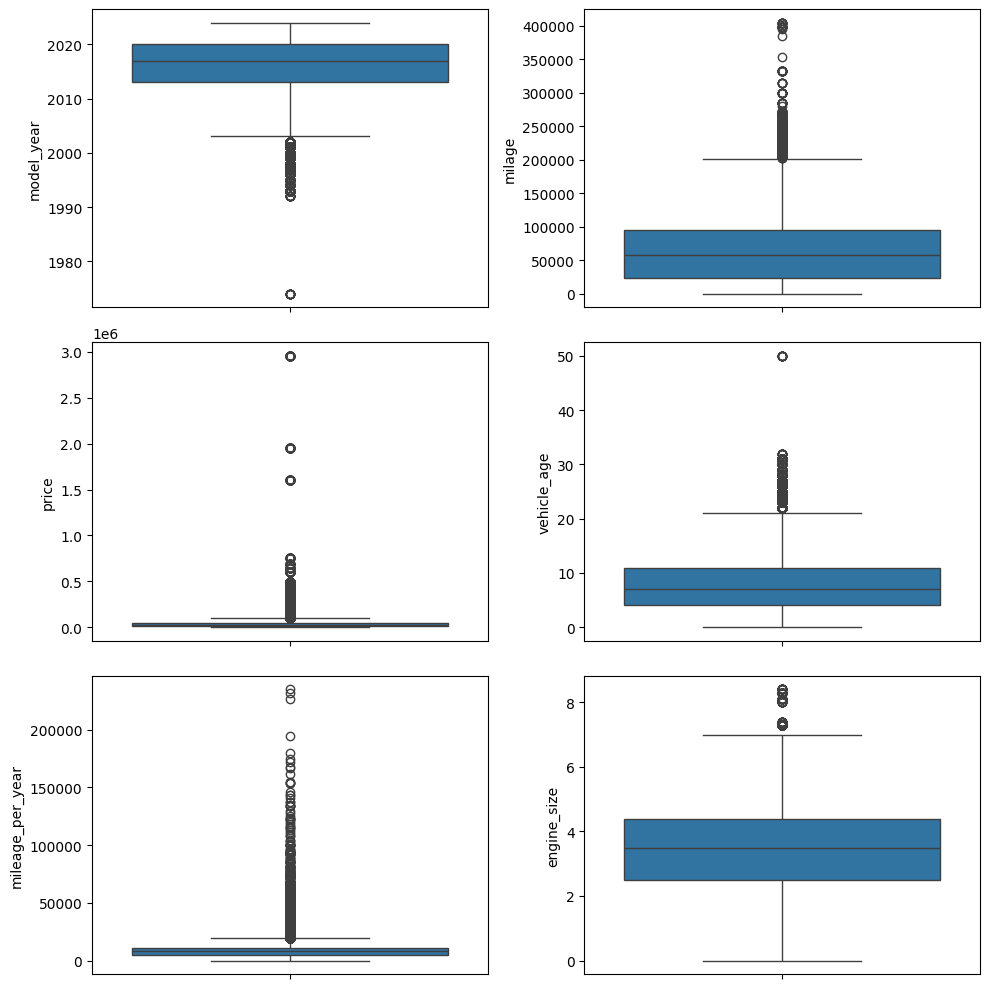

In [53]:
fig, axes = plt.subplots(nrows =3, ncols=2, sharex=False, sharey=False, figsize=(10,10))

idx=0
for rows in range(3):
    for col in range(2):
        if(idx<len(num_cols)):
            sns.boxplot(ax=axes[rows,col], data = train_df, y = num_cols[idx])
            idx+=1
plt.tight_layout()
plt.show()

In [54]:
for i in range(len(num_cols)):
    num_data = train_df[num_cols[i]].tolist()
    
    Q1 = np.percentile(num_data, 25)
    Q3 = np.percentile(num_data, 75)
    IQR = Q3-Q1
    lower_mid_outlier = Q1-1.5*IQR
    upper_mid_outlier = Q3+1.5*IQR

    lower_outliers = []
    upper_outliers = []

    for j in num_data:
        if j < lower_mid_outlier:
            lower_outliers.append(j)
        elif j > upper_mid_outlier:
            upper_outliers.append(j)
            
    lower_mid_outlier_pct = round((len(lower_outliers)/train_df.shape[0])*100,2)
    upper_mid_outlier_pct = round((len(upper_outliers)/train_df.shape[0])*100,2)
    
    print(f"Total number of Outliers in {num_cols[i]} is {len(lower_outliers + upper_outliers)} which is {lower_mid_outlier_pct + upper_mid_outlier_pct}% of overall data")

Total number of Outliers in model_year is 5132 which is 2.72% of overall data
Total number of Outliers in milage is 1766 which is 0.94% of overall data
Total number of Outliers in price is 10880 which is 5.77% of overall data
Total number of Outliers in vehicle_age is 5132 which is 2.72% of overall data
Total number of Outliers in mileage_per_year is 6409 which is 3.4% of overall data
Total number of Outliers in engine_size is 317 which is 0.17% of overall data


### For test dataset

In [55]:
num_cols1 = ['model_year','milage', 'vehicle_age', 'mileage_per_year','engine_size']

for i in range(len(num_cols1)):
    num_data = test_df[num_cols1[i]].tolist()

    minim = np.min(num_data)
    _5th_percentile = round(np.percentile(num_data, 5),2)
    Q1 = np.percentile(num_data, 25)
    Q2 = np.median(num_data)
    Q3 = np.percentile(num_data, 75)
    _95th_percentile = round(np.percentile(num_data, 95),2)
    mean = round(np.mean(num_data),2)
    maxim = np.max(num_data)
    Normal_range = maxim - minim
    IQR = Q3 - Q1
    lower_mid_outlier = Q1-1.5*IQR
    upper_mid_outlier = Q3+1.5*IQR

    lower_outliers = []
    upper_outliers = []

    for j in num_data:
        if j < lower_mid_outlier:
            lower_outliers.append(j)
        elif j > upper_mid_outlier:
            upper_outliers.append(j)

    lower_mid_outlier_pct = round((len(lower_outliers)/test_df.shape[0])*100,2)
    upper_mid_outlier_pct = round((len(upper_outliers)/test_df.shape[0])*100,2)
    
    print()
    print(f"Outlier detection of {num_cols1[i]}")
    print("-"*30)
    print(f"Minimum: {minim}")
    print(f"5th percentile of {num_cols1[i]}: {_5th_percentile}")
    print(f"Q1: {Q1}")
    print(f"Q2: {Q2}")
    print(f"Q3: {Q3}")
    print(f"95th percentile of {num_cols1[i]}: {_95th_percentile}")
    print(f"Average value of {num_cols1[i]} : {mean}")
    print(f"Maximum: {maxim}")
    print(f"Normal range: {Normal_range}")
    print(f"IQR: {IQR}")
    print(f"Lower mid outlier: {lower_mid_outlier}")
    print(f"Upper mid outlier: {upper_mid_outlier}")
    print(f"Mid Outliers range: {upper_mid_outlier - lower_mid_outlier}")
    print(f"Lower Outliers percentage: {lower_mid_outlier_pct}%")
    print(f"Upper Outliers percentage: {upper_mid_outlier_pct}%")
    print(f"Overall Ouliers percentage: {lower_mid_outlier_pct + upper_mid_outlier_pct}%")
    print(f"Total No of Outliers: {len(lower_outliers) + len(upper_outliers)}")
    print('-'*70)
    print(f"Lower Outliers: {lower_outliers}")
    print(f"Upper Outliers: {upper_outliers}")
    print('-'*120)


Outlier detection of model_year
------------------------------
Minimum: 1974
5th percentile of model_year: 2004.0
Q1: 2013.0
Q2: 2017.0
Q3: 2020.0
95th percentile of model_year: 2022.0
Average value of model_year : 2015.8
Maximum: 2024
Normal range: 50
IQR: 7.0
Lower mid outlier: 2002.5
Upper mid outlier: 2030.5
Mid Outliers range: 28.0
Lower Outliers percentage: 2.8%
Upper Outliers percentage: 0.0%
Overall Ouliers percentage: 2.8%
Total No of Outliers: 3516
----------------------------------------------------------------------
Lower Outliers: [2002, 2001, 2000, 2002, 1999, 2002, 2002, 1999, 1999, 2002, 2001, 2002, 2002, 1997, 2000, 2001, 2001, 2001, 2001, 1999, 1999, 2001, 2002, 1999, 2002, 2002, 2001, 1993, 1994, 1998, 2001, 1997, 1993, 2001, 1997, 2001, 2001, 2002, 1997, 2002, 1995, 2002, 2000, 1997, 2000, 2000, 1993, 2002, 2002, 1998, 2001, 2002, 2002, 1998, 2001, 2001, 2000, 2002, 2002, 1997, 2001, 1996, 2002, 2002, 2000, 1998, 2002, 2002, 2000, 2000, 2000, 2002, 2001, 1997, 2002


Outlier detection of vehicle_age
------------------------------
Minimum: 0
5th percentile of vehicle_age: 2.0
Q1: 4.0
Q2: 7.0
Q3: 11.0
95th percentile of vehicle_age: 20.0
Average value of vehicle_age : 8.2
Maximum: 50
Normal range: 50
IQR: 7.0
Lower mid outlier: -6.5
Upper mid outlier: 21.5
Mid Outliers range: 28.0
Lower Outliers percentage: 0.0%
Upper Outliers percentage: 2.8%
Overall Ouliers percentage: 2.8%
Total No of Outliers: 3516
----------------------------------------------------------------------
Lower Outliers: []
Upper Outliers: [22, 23, 24, 22, 25, 22, 22, 25, 25, 22, 23, 22, 22, 27, 24, 23, 23, 23, 23, 25, 25, 23, 22, 25, 22, 22, 23, 31, 30, 26, 23, 27, 31, 23, 27, 23, 23, 22, 27, 22, 29, 22, 24, 27, 24, 24, 31, 22, 22, 26, 23, 22, 22, 26, 23, 23, 24, 22, 22, 27, 23, 28, 22, 22, 24, 26, 22, 22, 24, 24, 24, 22, 23, 27, 22, 24, 31, 23, 25, 25, 24, 23, 26, 23, 22, 25, 22, 26, 24, 22, 30, 23, 30, 22, 28, 25, 22, 22, 22, 31, 23, 23, 27, 22, 25, 22, 22, 23, 27, 23, 27, 22, 22


Outlier detection of engine_size
------------------------------
Minimum: 0.0
5th percentile of engine_size: 1.8
Q1: 2.5
Q2: 3.5
Q3: 4.4
95th percentile of engine_size: 6.2
Average value of engine_size : 3.53
Maximum: 8.4
Normal range: 8.4
IQR: 1.9000000000000004
Lower mid outlier: -0.35000000000000053
Upper mid outlier: 7.250000000000001
Mid Outliers range: 7.600000000000001
Lower Outliers percentage: 0.0%
Upper Outliers percentage: 0.16%
Overall Ouliers percentage: 0.16%
Total No of Outliers: 200
----------------------------------------------------------------------
Lower Outliers: []
Upper Outliers: [8.3, 8.3, 7.4, 7.3, 7.4, 8.0, 8.4, 7.3, 8.4, 7.3, 8.3, 8.1, 7.3, 8.1, 8.1, 8.1, 7.3, 7.3, 8.3, 7.3, 7.3, 8.3, 8.3, 7.3, 8.0, 8.0, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 8.4, 8.3, 7.3, 8.3, 8.3, 8.4, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 8.0, 7.3, 7.3, 7.3, 7.3, 8.1, 7.3, 8.3, 7.3, 8.3, 8.3, 7.3, 7.3, 7.3, 7.3, 8.4, 7.3, 7.3, 7.3, 8.3, 7.3, 8.0, 8.0, 7.3, 8.3, 8.3, 8.3, 8.1, 7.3, 7.3, 7.3, 7.3,

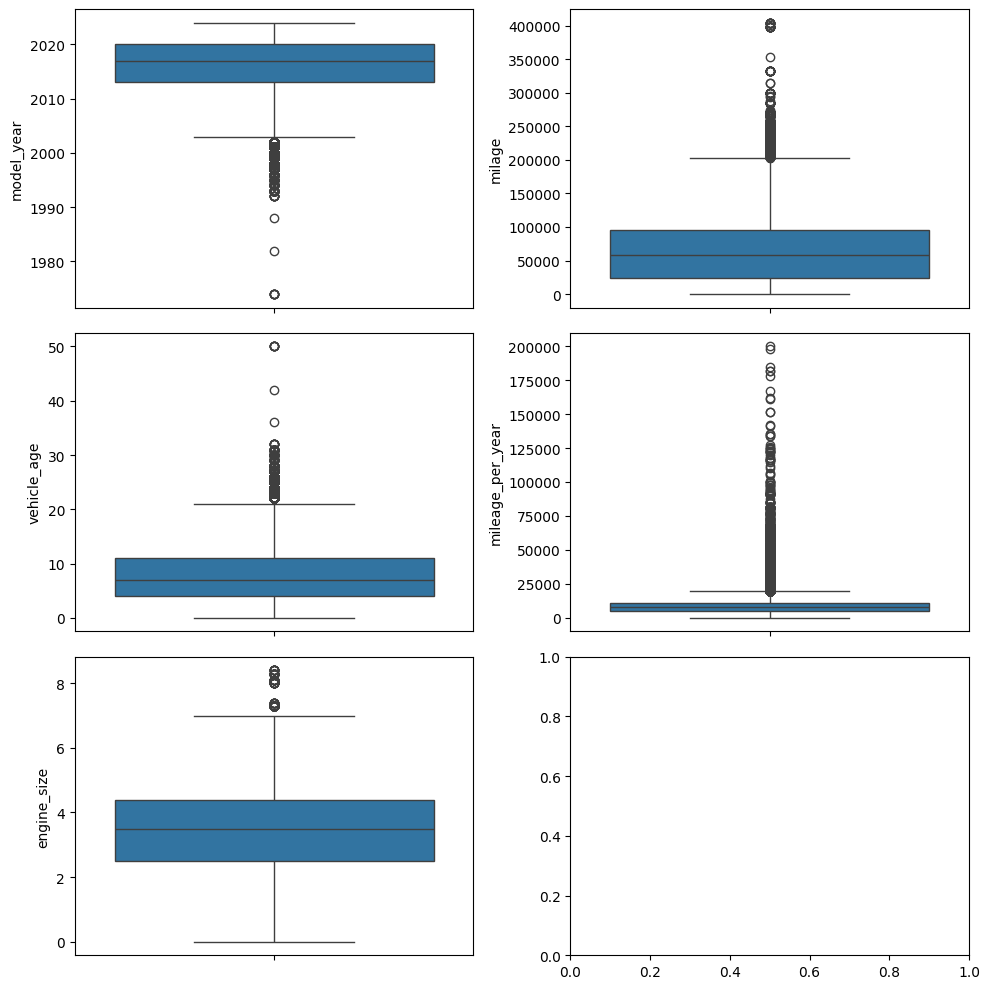

In [56]:
fig, axes = plt.subplots(nrows =3, ncols=2, sharex=False, sharey=False, figsize=(10,10))

idx=0
for rows in range(3):
    for col in range(2):
        if(idx<len(num_cols1)):
            sns.boxplot(ax=axes[rows,col], data = test_df, y = num_cols1[idx])
            idx+=1
plt.tight_layout()
plt.show()

In [57]:
for i in range(len(num_cols1)):
    num_data1 = test_df[num_cols1[i]].tolist()
    
    Q1 = np.percentile(num_data1, 25)
    Q3 = np.percentile(num_data1, 75)
    IQR = Q3-Q1
    lower_mid_outlier = Q1-1.5*IQR
    upper_mid_outlier = Q3+1.5*IQR

    lower_outliers = []
    upper_outliers = []

    for j in num_data1:
        if j < lower_mid_outlier:
            lower_outliers.append(j)
        elif j > upper_mid_outlier:
            upper_outliers.append(j)
            
    lower_mid_outlier_pct = round((len(lower_outliers)/test_df.shape[0])*100,2)
    upper_mid_outlier_pct = round((len(upper_outliers)/test_df.shape[0])*100,2)
    
    print(f"Total number of Outliers in {num_cols1[i]} is {len(lower_outliers + upper_outliers)} which is {lower_mid_outlier_pct + upper_mid_outlier_pct}% of overall data")

Total number of Outliers in model_year is 3516 which is 2.8% of overall data
Total number of Outliers in milage is 1353 which is 1.08% of overall data
Total number of Outliers in vehicle_age is 3516 which is 2.8% of overall data
Total number of Outliers in mileage_per_year is 4205 which is 3.35% of overall data
Total number of Outliers in engine_size is 200 which is 0.16% of overall data


## Insights:
- __There are 0.947%, 5.77%, 2.72% and 3.4% of Ouitliers in Milage, Price, Vehicle Age,and Milage per year columns respectively for train dataset__
- __There are 1.08%, 2.8%, and 3.44% of Ouitliers in Milage, Vehicle Age and Milage per year columns respectively for test dataset__

## 4. Univariate Analysis

In [58]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'vehicle_age', 'mileage_per_year', 'engine_size',
       'transmission_type'],
      dtype='object')

### 1. Top 10 brands of the car 

In [59]:
train_df['brand'].value_counts()[:10]

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Name: count, dtype: int64

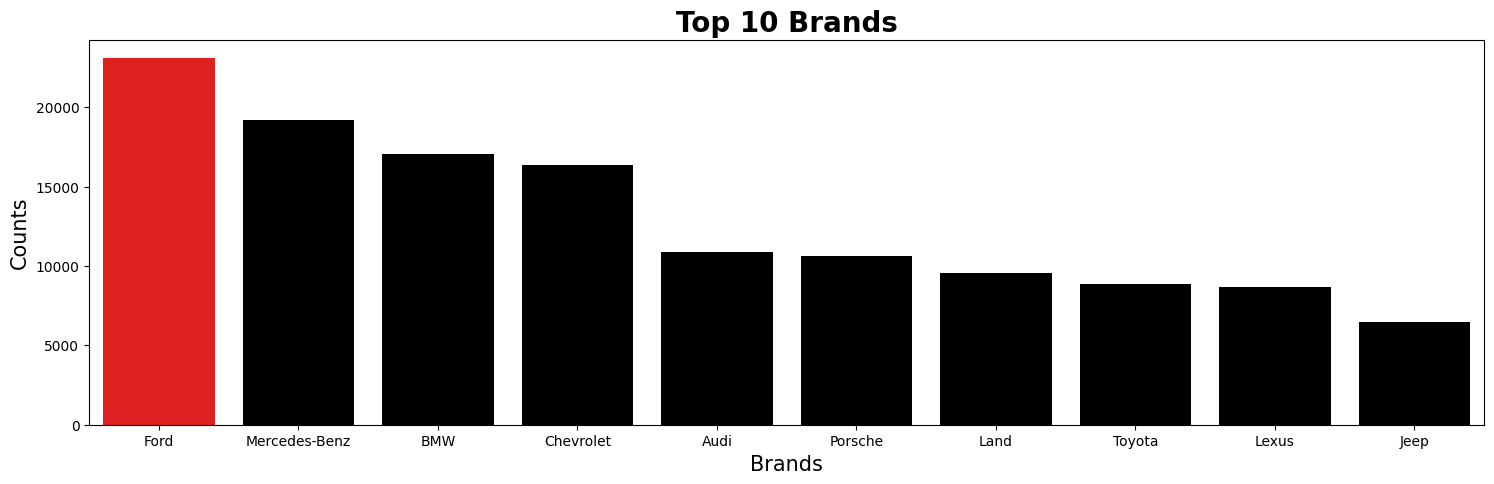

In [60]:
plt.figure(figsize=(18,5))
colors = ['red' if col == train_df['brand'].value_counts()[:10].max() else 'black' for col in train_df['brand'].value_counts()[:10]]
sns.barplot(x=train_df['brand'].value_counts()[:10].index , y=train_df['brand'].value_counts()[:10].values, palette =colors)
plt.xlabel('Brands', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Top 10 Brands', fontsize=20, fontweight='bold')
plt.show()

## Insights:
- __Ford brand has the highest sales followed by Merc-benz, BMW and Chevrolet while Jeep ahs the lowest sales__

### 2. Year wise sales of the car

In [61]:
year_wise_sale = train_df['model_year'].value_counts().sort_index()
year_wise_sale

model_year
1974       12
1992       14
1993      140
1994       92
1995      102
1996      189
1997      312
1998      343
1999      554
2000      558
2001     1534
2002     1282
2003     1906
2004     2570
2005     3129
2006     2814
2007     4876
2008     5156
2009     2716
2010     4235
2011     6265
2012     6095
2013     6796
2014     8415
2015    11389
2016    13696
2017    12794
2018    16414
2019    15409
2020    15848
2021    18198
2022    15749
2023     8769
2024      162
Name: count, dtype: int64

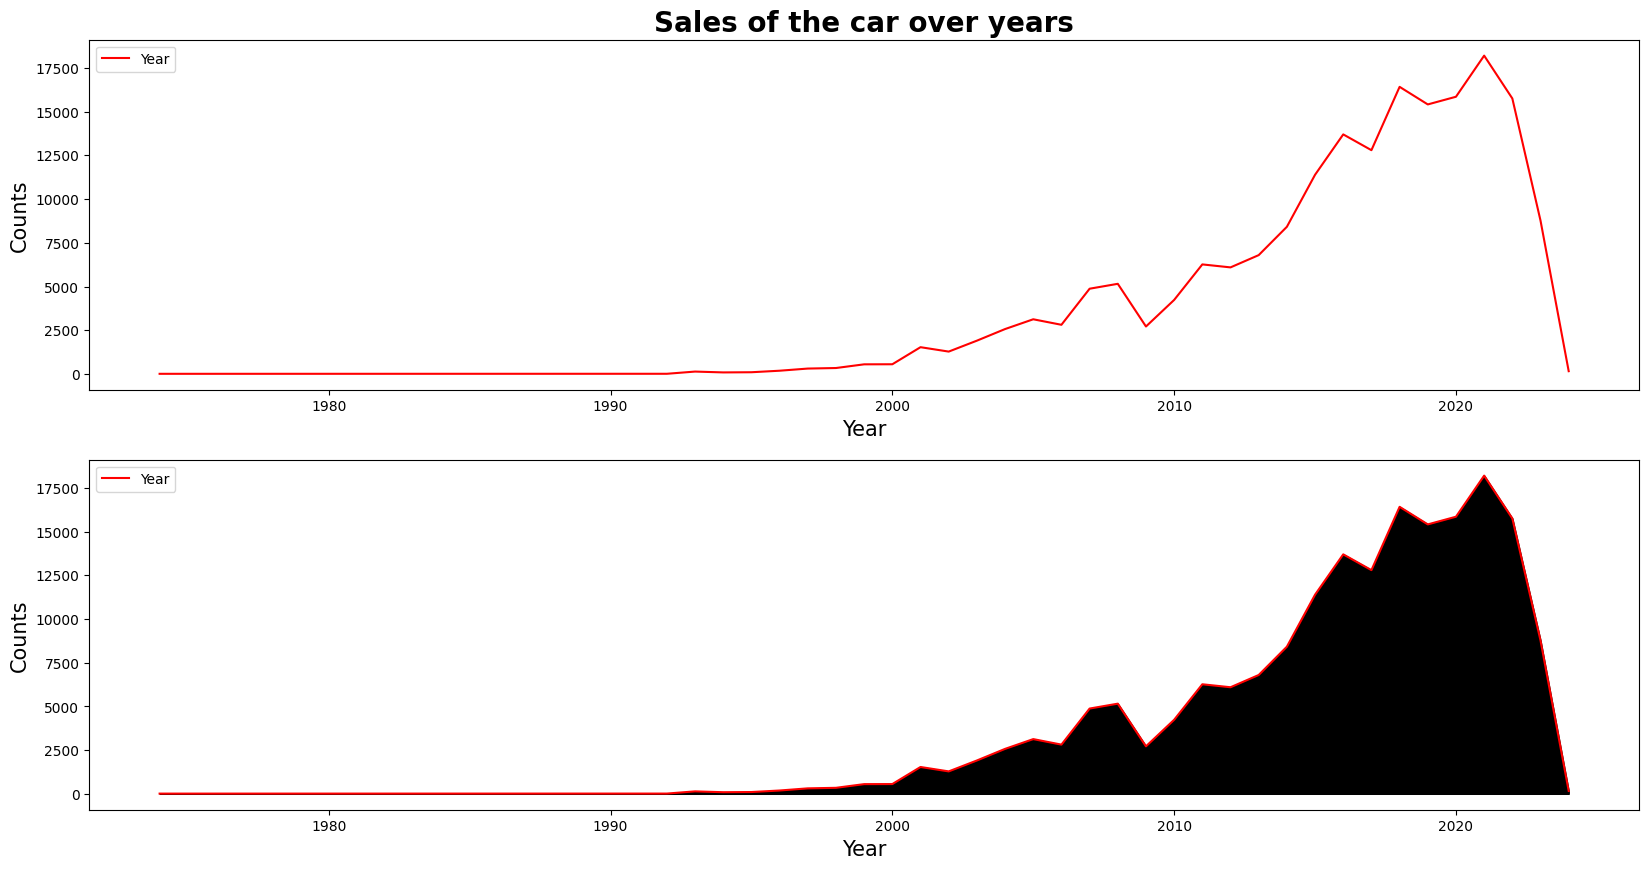

In [62]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.lineplot(x=year_wise_sale.index ,  y=year_wise_sale.values, color='red', label='Year')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Sales of the car over years', fontsize=20, fontweight='bold')
plt.legend(loc=2)
plt.grid(False)

plt.subplot(2,1,2)
sns.lineplot(x=year_wise_sale.index ,  y=year_wise_sale.values, color='red', label='Year')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(loc=2)
plt.grid(False)

plt.fill_between(year_wise_sale.index, year_wise_sale.values, color='black')

plt.show()

## Insights:
- __From 1974 to 2000, car sale is very low and increasing aLmost linearly__
- __Highest car sales is in the year 2021 while lowest is in 1974__
- __From 2000 to 2021, car sales have increasing trend but there is a significant drop from 2021 to 2024__

### 3. Most sold car with respect to their different fuel type

In [63]:
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          171038
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
CNG                  781
Plug-In Hybrid       521
Name: count, dtype: int64

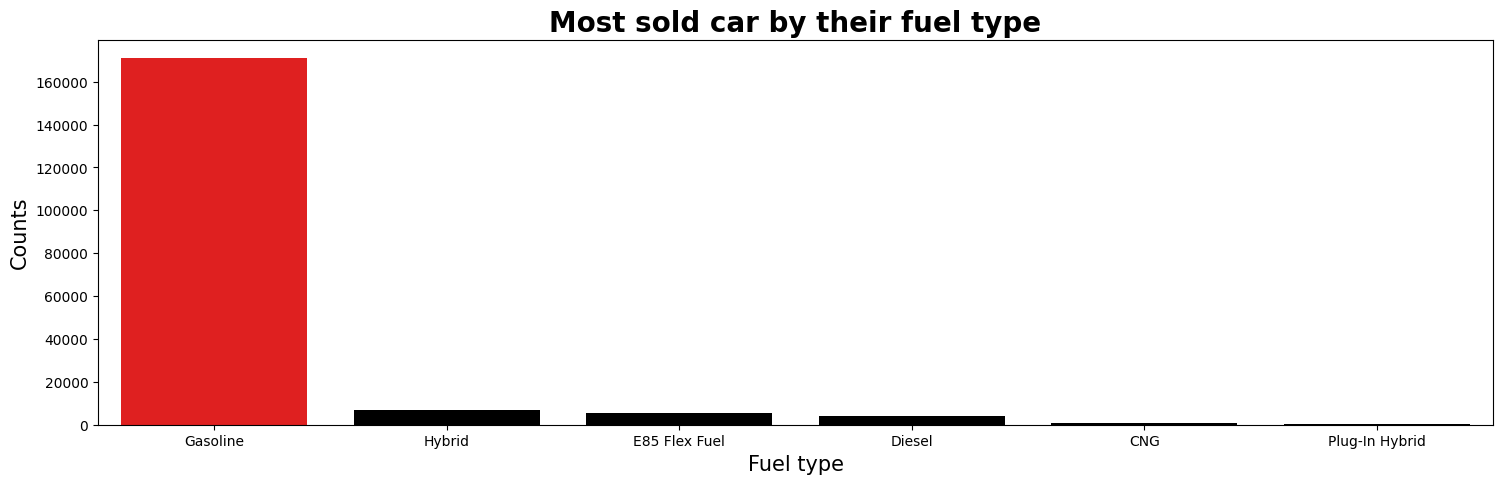

In [64]:
plt.figure(figsize=(18,5))
colors = ['red' if col == train_df['fuel_type'].value_counts().max() else 'black' for col in train_df['fuel_type'].value_counts()]
sns.barplot(x=train_df['fuel_type'].value_counts().index , y=train_df['fuel_type'].value_counts().values, palette =colors)
plt.xlabel('Fuel type', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Most sold car by their fuel type', fontsize=20, fontweight='bold')
plt.show()

## Insights:
- __Car with Gasoline fuel type has the highest car sale among others fuel type and it also outperforms other fuel type cars__

### 4. Distribution of Accidents

In [65]:
train_df['accident'].value_counts()

accident
None reported                             146966
At least 1 accident or damage reported     41567
Name: count, dtype: int64

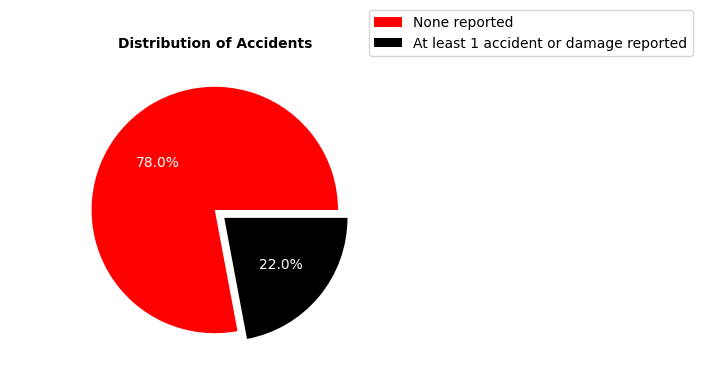

In [66]:
plt.figure(figsize=(4,4))
color=['red','black']
plt.pie(x=train_df['accident'].value_counts().values, labels=train_df['accident'].value_counts().index, 
        autopct='%1.1f%%', explode=[0, 0.1], colors=color, textprops={'color': 'white'})
plt.legend(loc=(1,1))
plt.title('Distribution of Accidents', fontsize=10, fontweight='bold')
plt.show()

## Insights:
- __There are 78% of cases with no accident and 22% cases with one or more accident__

### 5. Top 20 cars with most frequent price 

In [67]:
price_freq = train_df['price'].value_counts()
price_freq

price
15000     1920
12000     1459
30000     1280
29000     1228
8500      1204
          ... 
239991      22
269991      22
259991      21
107998      20
45998       19
Name: count, Length: 1569, dtype: int64

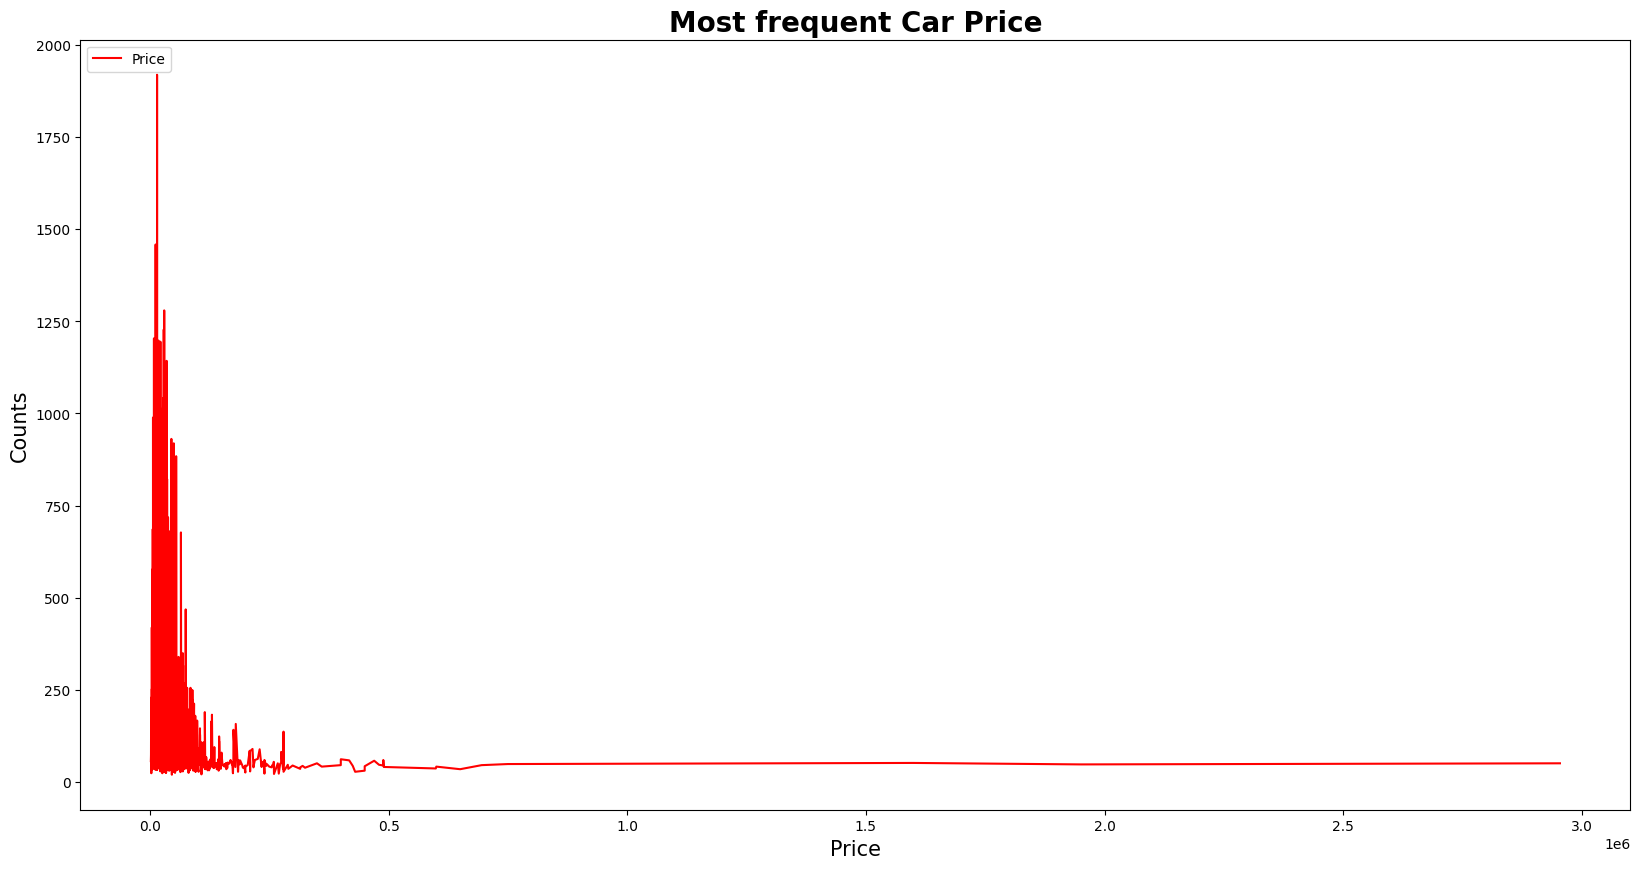

In [68]:
plt.figure(figsize=(20,10))

plt.subplot(1,1,1)
sns.lineplot(x=price_freq.index ,  y=price_freq.values, color='red', label='Price')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Most frequent Car Price', fontsize=20, fontweight='bold')
plt.legend(loc=2)
plt.grid(False)

plt.show()

## Insights:
- __Car with 15000 price has the highest sales, which clearly reflects that people wants to buy a cheaper car__

### 6. Distribution of vehicle age

In [69]:
car_age = train_df['vehicle_age'].value_counts()
car_age

vehicle_age
3     18198
6     16414
4     15848
2     15749
5     15409
8     13696
7     12794
9     11389
1      8769
10     8415
11     6796
13     6265
12     6095
16     5156
17     4876
14     4235
19     3129
18     2814
15     2716
20     2570
21     1906
23     1534
22     1282
24      558
25      554
26      343
27      312
28      189
0       162
31      140
29      102
30       92
32       14
50       12
Name: count, dtype: int64

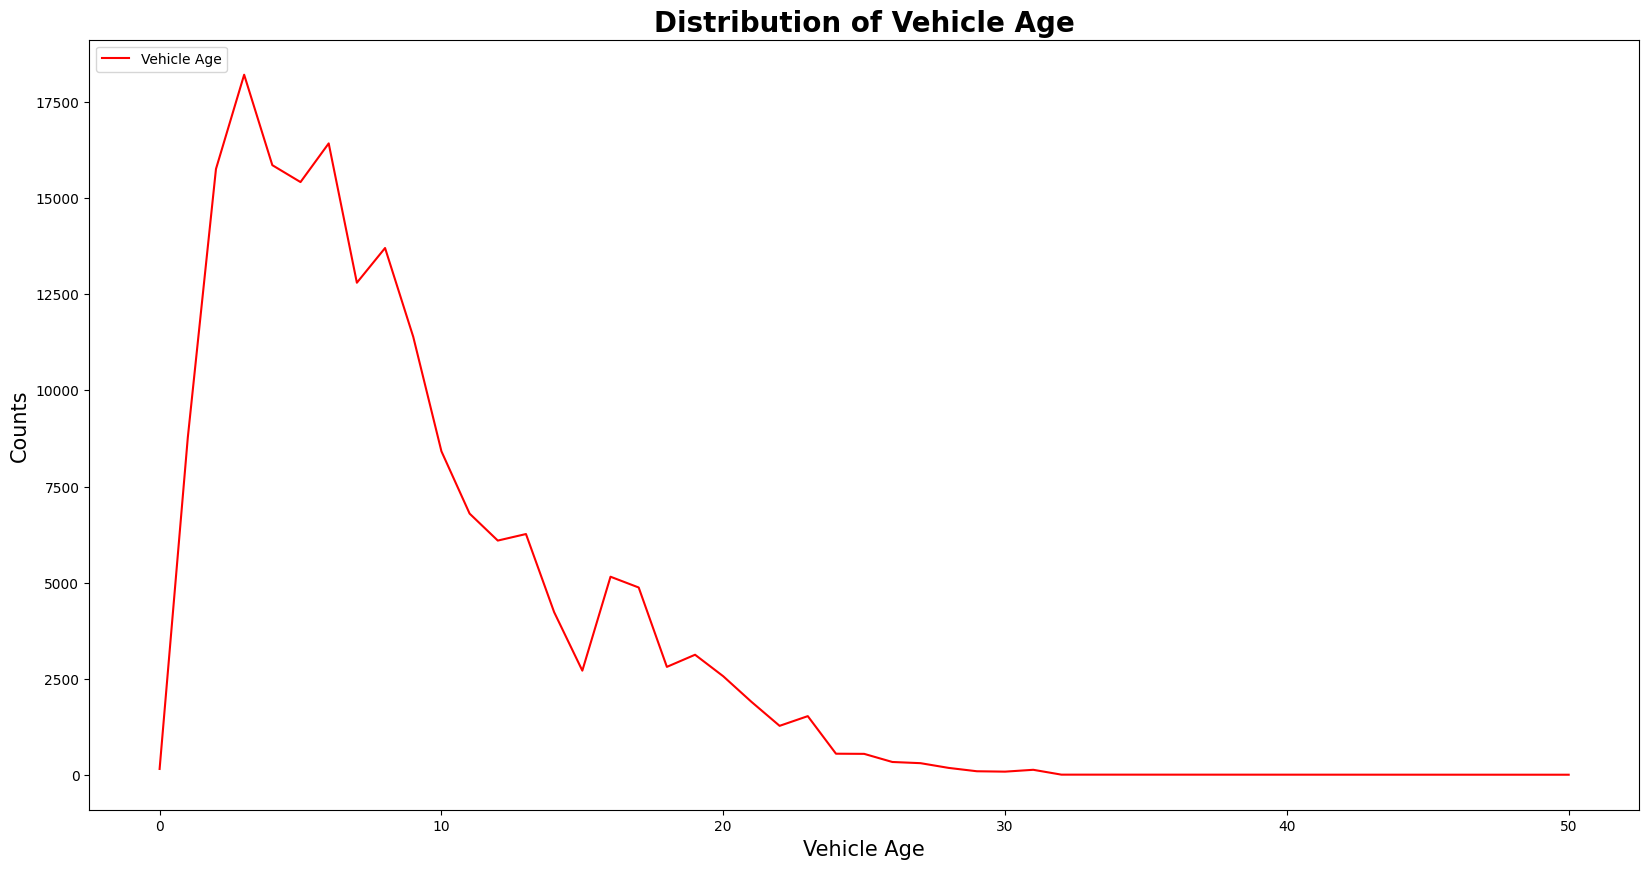

In [70]:
plt.figure(figsize=(20,10))

plt.subplot(1,1,1)
sns.lineplot(x=car_age.index ,  y=car_age.values, color='red', label='Vehicle Age')
plt.xlabel('Vehicle Age', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of Vehicle Age', fontsize=20, fontweight='bold')
plt.legend(loc=2)
plt.grid(False)

plt.show()

## Insights:
- __3 years of Vehicle age has the highest sales while with 50 years has the lowest sales and which is obvious__

### 7. Distribution of car milage

In [71]:
milage_year = train_df['milage'].value_counts()
milage_year

milage
60000     1319
170000    1246
120000    1178
110000    1155
130000     970
          ... 
5111         1
29755        1
28761        1
170612       1
134603       1
Name: count, Length: 6651, dtype: int64

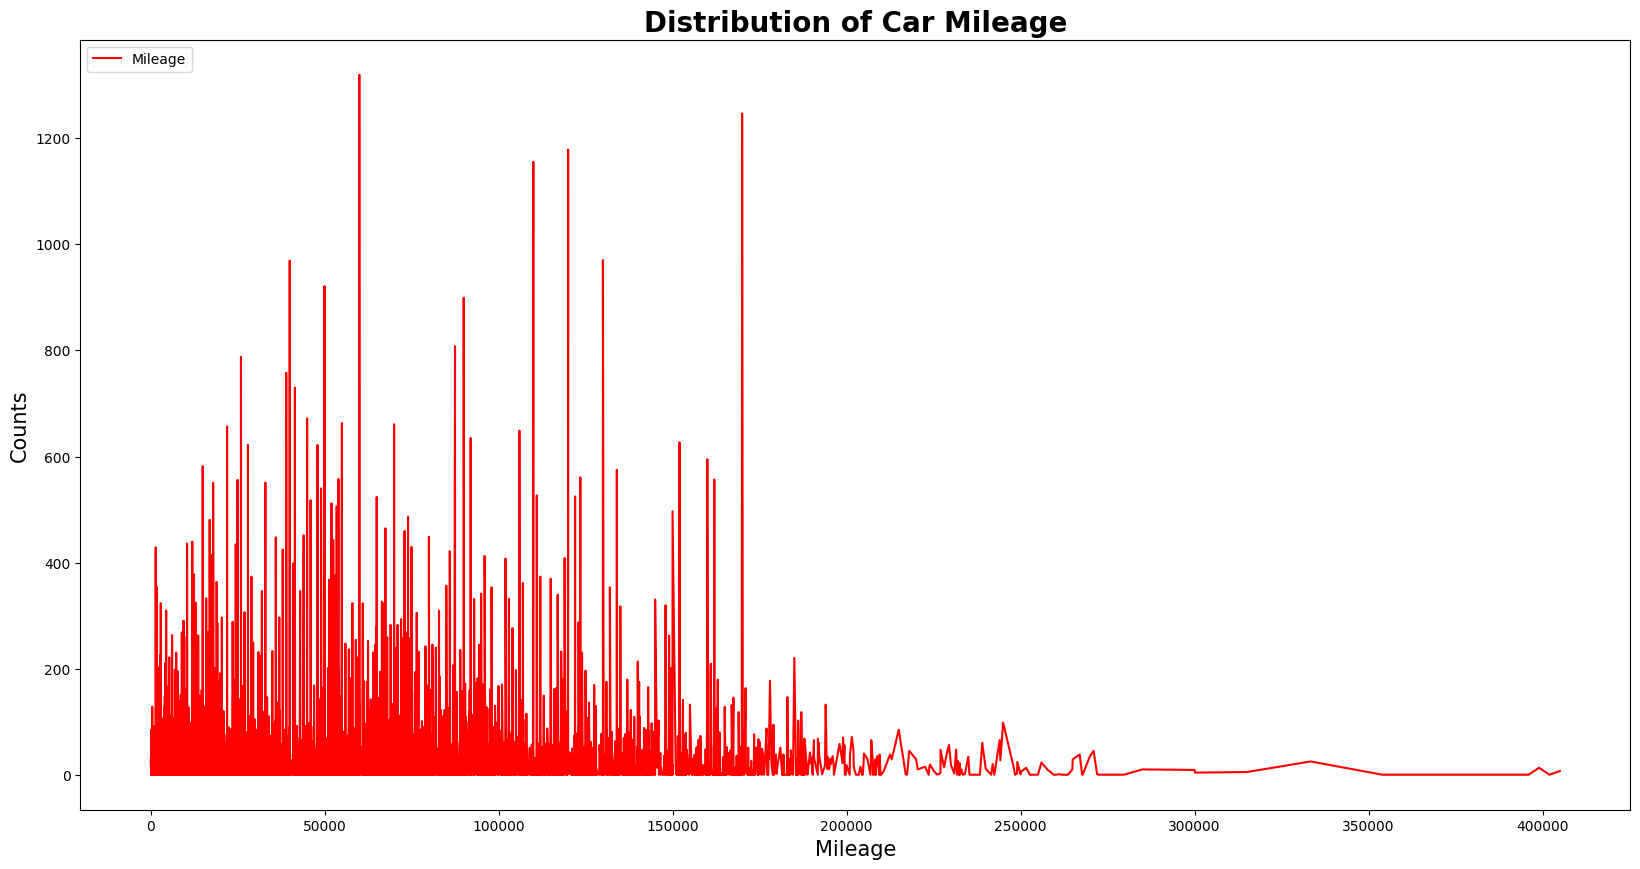

In [72]:
plt.figure(figsize=(20,10))

plt.subplot(1,1,1)
sns.lineplot(x=milage_year.index ,  y=milage_year.values, color='red', label='Mileage')
plt.xlabel('Mileage', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of Car Mileage', fontsize=20, fontweight='bold')
plt.legend(loc=2)
plt.grid(False)

plt.show()

## Insights:
- __Car with 60000 milage has the highet sales__
- __Cars with in the range of 22000 to 150000 interestingly have almost same sales figures__

## Recommendation:
- __Company can look why the cars with low milage have same sales figures as those with high milage__

## 8. Distribution of Clean Title 

In [73]:
train_df['clean_title'].value_counts()

clean_title
Yes    167114
No      21419
Name: count, dtype: int64

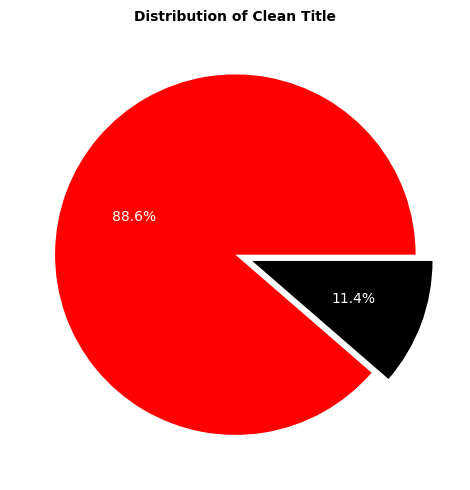

In [74]:
plt.figure(figsize=(5,5))
color = ['red' if col == train_df['clean_title'].value_counts().values.max() else 'black' for col in train_df['clean_title'].value_counts().values]
plt.pie(x=train_df['clean_title'].value_counts().values, labels=train_df['clean_title'].value_counts().index,
       autopct='%1.1f%%', explode=[0, 0.1], colors=color, textprops={'color': 'white'})
plt.title('Distribution of Clean Title', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

## Distribution of Transmission  type

In [75]:
trans_type_count = train_df['transmission_type'].value_counts()
trans_type_count

transmission_type
Automatic    150473
Other         19541
Manual        16445
CVT            2056
DCT              18
Name: count, dtype: int64

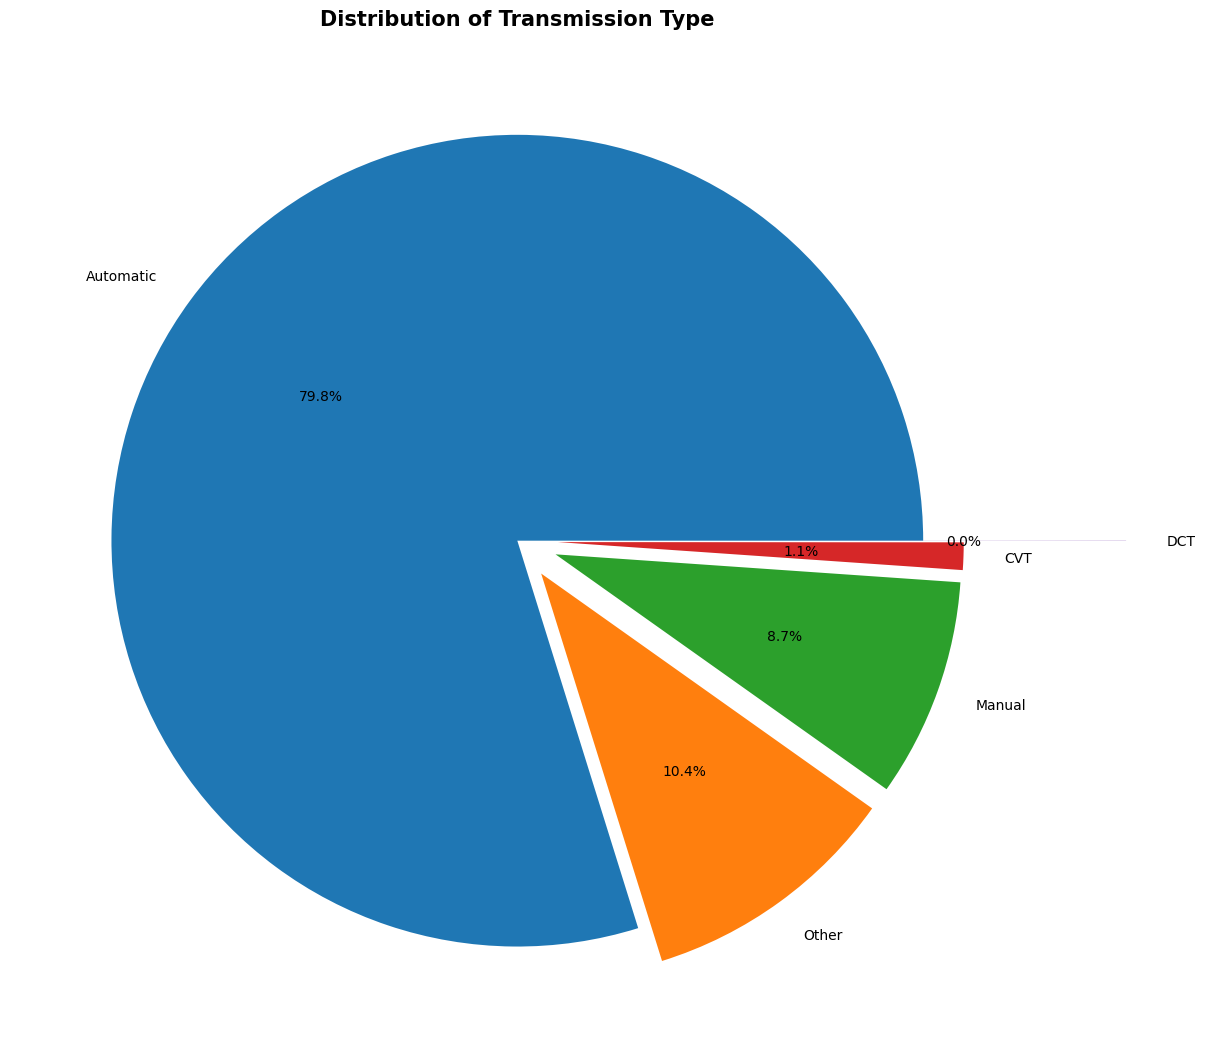

In [76]:
plt.figure(figsize=(12,12))
plt.pie(x=trans_type_count.values, labels=trans_type_count.index, autopct='%1.1f%%', explode=[0,0.1,0.1,0.1,0.5])
plt.title('Distribution of Transmission Type', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

## Insights:
- __Automatic transmission has the Highest Count for Cars while the lowest is DCT__

## Bivariate Analysis

In [77]:
cat_cols = [col for col in train_df.columns if train_df[col].dtype == 'object']
cat_cols

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'transmission_type']

In [78]:
num_cols

['model_year',
 'milage',
 'price',
 'vehicle_age',
 'mileage_per_year',
 'engine_size']

## 1. Price and Mileage relationship

In [79]:
train_df[['milage','price']].sort_values(by=['milage','price'], ascending=[True, False])

milage   price
103484     100  417500
155003     100  188500
13505      100   99000
135024     100   98900
125296     100   90000
...        ...     ...
45077   405000   30000
45288   405000   20995
137357  405000   18000
161337  405000   17500
126917  405000   10500

[188533 rows x 2 columns]

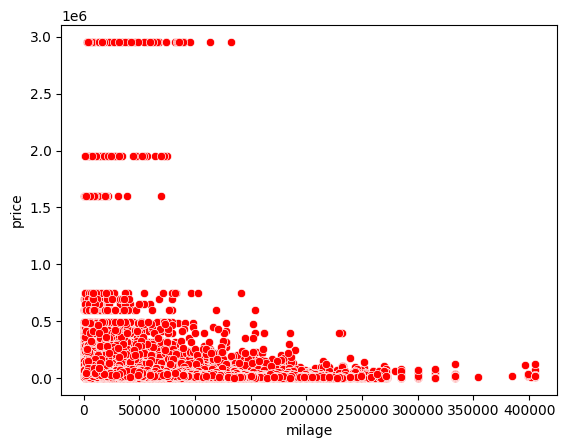

In [80]:
sns.scatterplot(x='milage',y='price',data=train_df, color='Red')
plt.show()

## Insights:
- __Obviously low milage car have high price but interestingly for a car with 100 miles of milage have a price range from 23500 to 417500, which clearly indicates that there are other factors as well which are impacting the price of low mileage cars.__

## Vehicle Age and Price relation

In [81]:
vehicle_age_price = train_df[['vehicle_age', 'price']].sort_values(by=['vehicle_age','price'], ascending =[True, False])
vehicle_age_price

vehicle_age   price
152311            0  399900
78119             0  288900
64880             0  243900
42190             0  240000
72538             0  200000
...             ...     ...
8173             50   29900
60702            50   29000
71389            50   23500
47488            50   13046
127656           50    9999

[188533 rows x 2 columns]

In [82]:
vehicle_age_price.loc[vehicle_age_price['vehicle_age']==0].min() , vehicle_age_price.loc[vehicle_age_price['vehicle_age']==0].max()

(vehicle_age        0
 price          22550
 dtype: int64,
 vehicle_age         0
 price          399900
 dtype: int64)

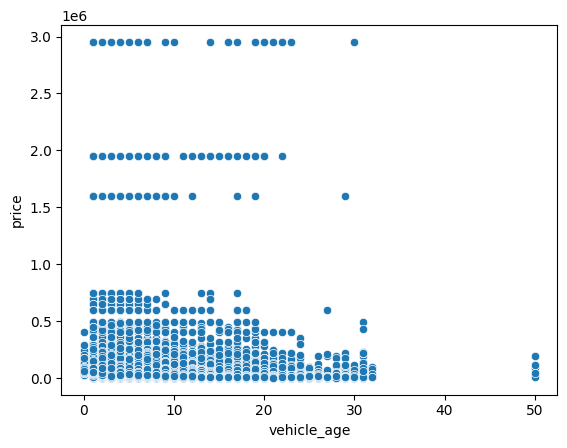

In [83]:
sns.scatterplot(x='vehicle_age',y='price',data=train_df)
plt.show()

## Insights:
- __Less Vehicle Age has obviously more price but agian interestingly vehicle age with zero years have a price variation from 22550 and 399900 which clearly implies that there are some other factors which are impacting the price for zero years of vehicle age.__

## Mielage per year and Price relation

In [84]:
mileage_year_price = train_df[['mileage_per_year','price']].sort_values(by=['mileage_per_year','price'], ascending=[True, False])
mileage_year_price

mileage_per_year   price
152311               0.0  399900
78119                0.0  288900
64880                0.0  243900
42190                0.0  240000
72538                0.0  200000
...                  ...     ...
83862           180036.0  179900
177913          195000.0   74995
175361          227000.0    5750
158832          231500.0    3550
17645           235000.0   53000

[188533 rows x 2 columns]

In [85]:
mileage_year_price.loc[mileage_year_price['mileage_per_year']==0.0].min() , mileage_year_price.loc[mileage_year_price['mileage_per_year']==0.0].max()

(mileage_per_year        0.0
 price               22550.0
 dtype: float64,
 mileage_per_year         0.0
 price               399900.0
 dtype: float64)

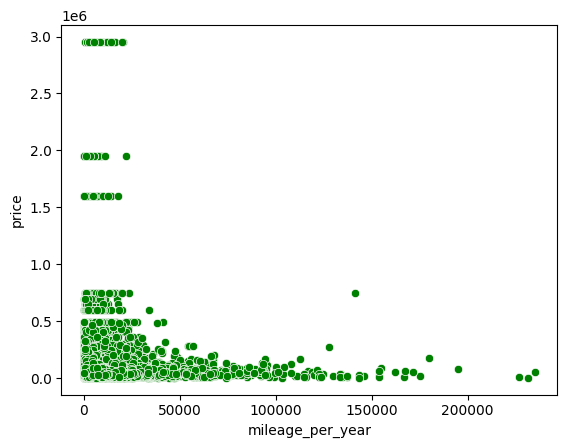

In [86]:
sns.scatterplot(x='mileage_per_year',y='price',data=train_df, color='green')
plt.show()

## Insights:
- __Less Mileage per year has obviously more price but agian interestingly Zero mileage per year has a price variation from 22550 and 399900 which clearly implies that there are some other factors which are impacting the price for zero mileage per year.__

## Relationship between Accident and Price

In [87]:
train_df[['accident','price']].sort_values(by=['accident','price'], ascending=[False,True])

accident    price
758                              None reported     2000
4781                             None reported     2000
11146                            None reported     2000
12655                            None reported     2000
17482                            None reported     2000
...                                        ...      ...
185197  At least 1 accident or damage reported  1950995
67957   At least 1 accident or damage reported  2954083
92612   At least 1 accident or damage reported  2954083
129054  At least 1 accident or damage reported  2954083
183006  At least 1 accident or damage reported  2954083

[188533 rows x 2 columns]

In [88]:
train_df.groupby('accident')['price'].count()

accident
At least 1 accident or damage reported     41567
None reported                             146966
Name: price, dtype: int64

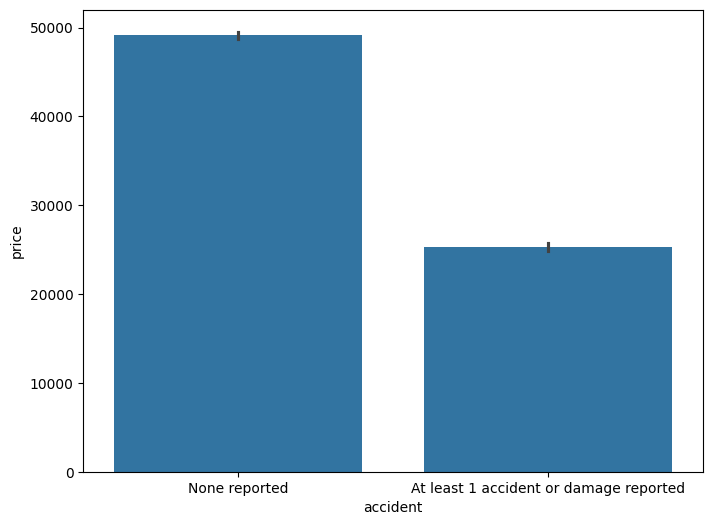

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(x='accident',y='price', data=train_df)
plt.show()

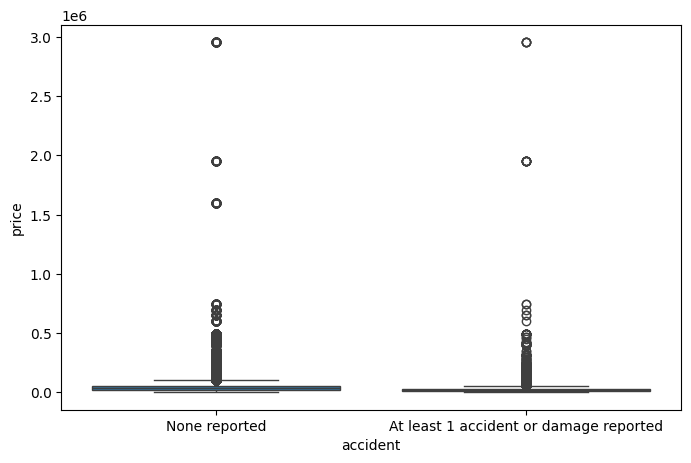

In [90]:
plt.figure(figsize=(8,5))
sns.boxplot(x='accident', y='price', data=train_df)
plt.show()

## Insights:

## Average Car price with respect to Engine Size

In [91]:
engine_price = train_df.groupby(['engine_size'])['price'].mean().sort_values(ascending=False).reset_index()
engine_price

engine_size          price
0           8.0  117016.800000
1           6.5  101528.634146
2           5.2   84937.626335
3           6.0   77369.132141
4           5.9   74170.150943
..          ...            ...
57          1.8   13626.963230
58          6.8   12765.486486
59          2.8   10454.132231
60          1.7    9938.700000
61          1.2    8000.000000

[62 rows x 2 columns]

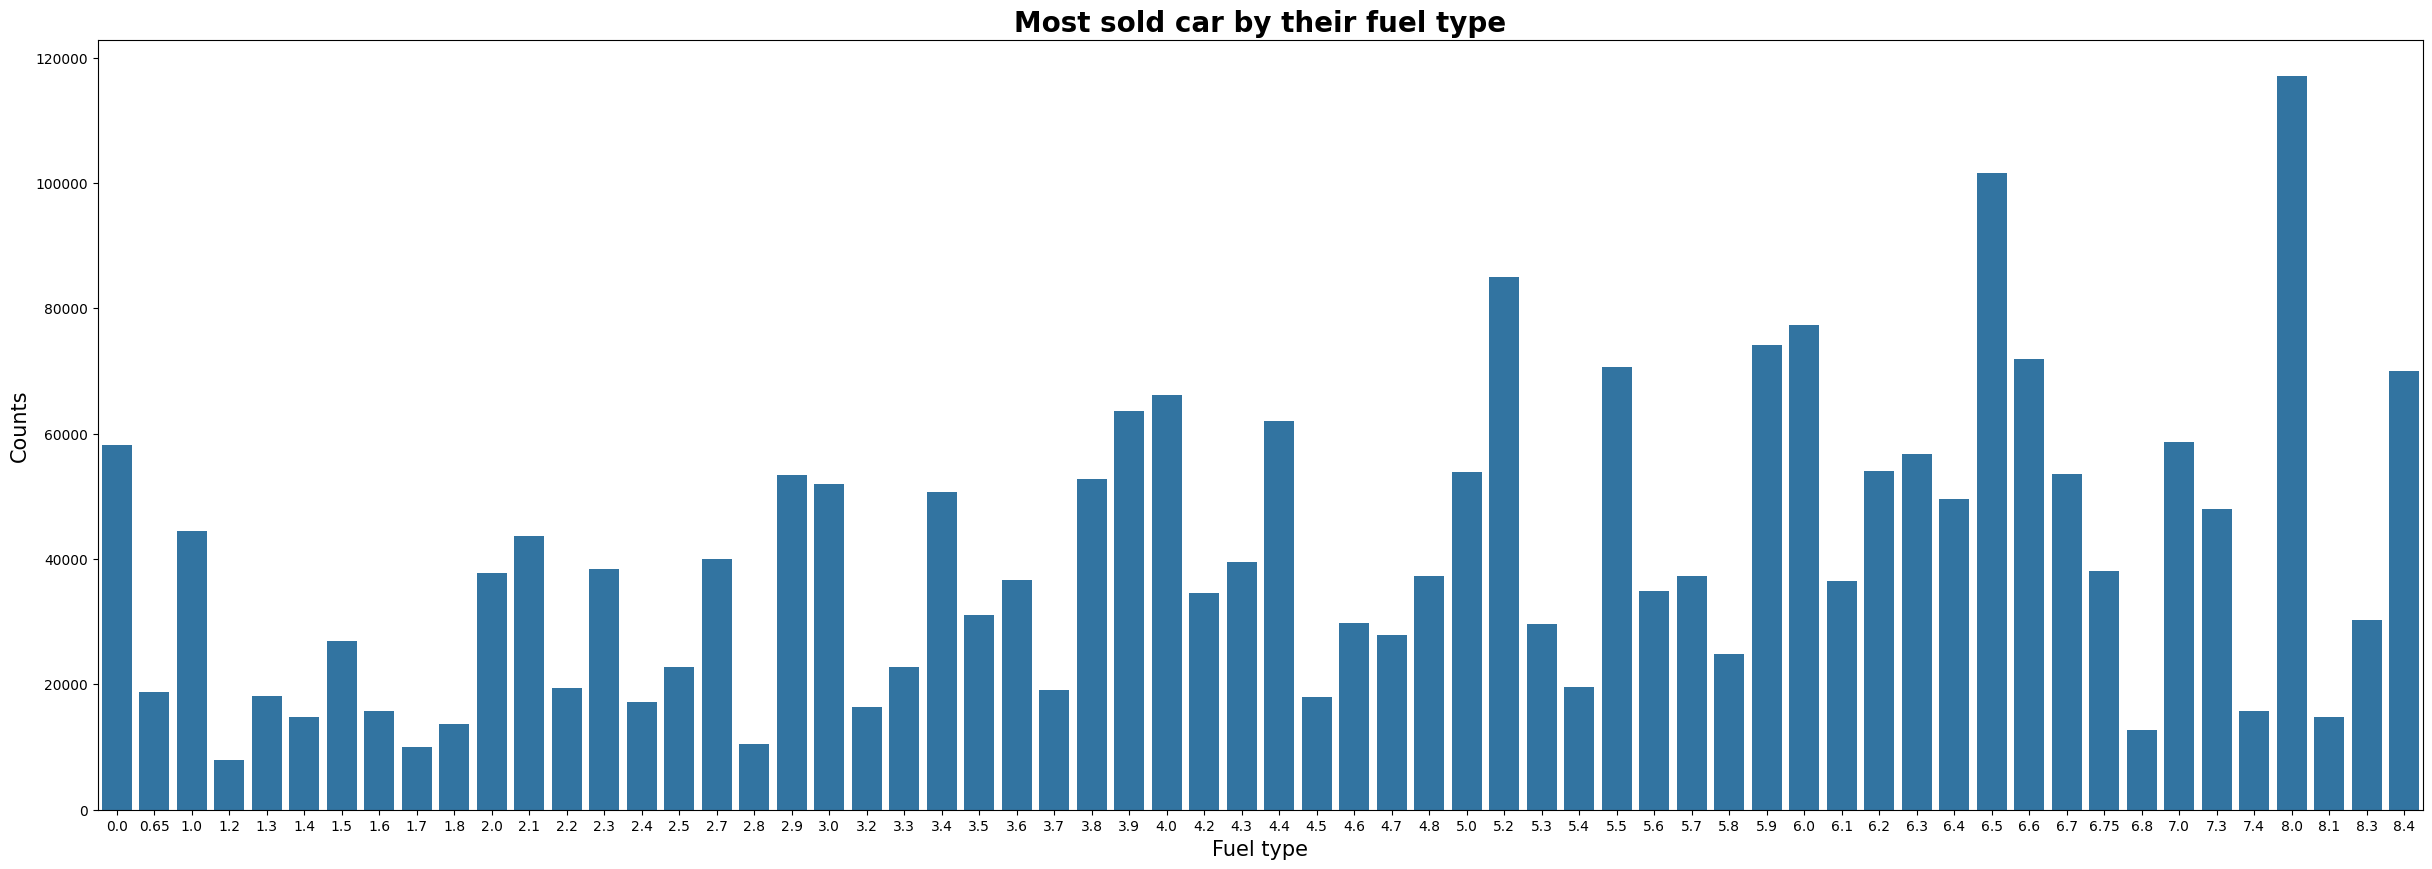

In [92]:
plt.figure(figsize=(30,10))
# colors = ['red' if col == engine_price.engine_size.max() else 'black' for col in engine_price]
sns.barplot(x=engine_price.engine_size , y=engine_price.price)
plt.xlabel('Fuel type', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Most sold car by their fuel type', fontsize=20, fontweight='bold')
plt.show()

## Insights:
- __Engine_size with 8.0L has the highest average car price while lowest average price is of 1.2L engine__

## Relationship between Fuel type and Price

In [93]:
train_df.groupby('fuel_type')['price'].count().reset_index()

fuel_type   price
0             CNG     781
1          Diesel    3955
2   E85 Flex Fuel    5406
3        Gasoline  171038
4          Hybrid    6832
5  Plug-In Hybrid     521

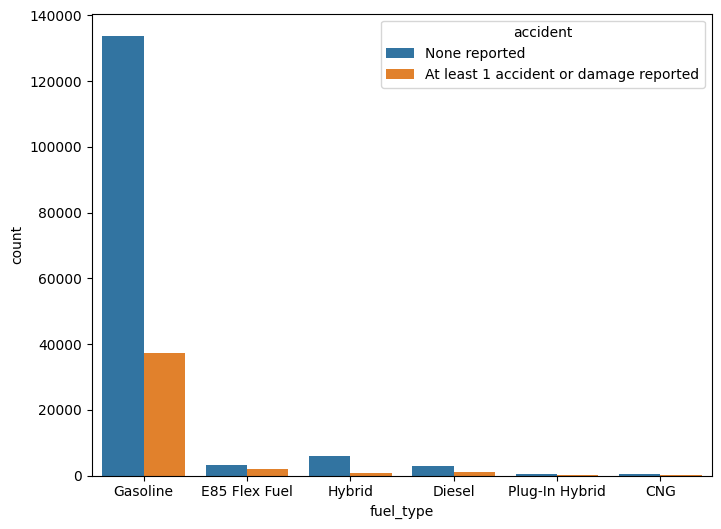

In [94]:
plt.figure(figsize=(8,6))
sns.countplot(x='fuel_type', hue='accident', data=train_df)
plt.show()

## Insights
- __Gasoline has the highest car price for both none and atleast 1 accident reported__

## Average Car Price with respect to Model Year

In [95]:
model_year_price = train_df.groupby('model_year')['price'].mean().sort_values(ascending=False).reset_index()
model_year_price

model_year         price
0         2023  95707.912305
1         2024  78006.067901
2         1974  74124.083333
3         2022  72732.327005
4         2021  65893.857951
5         2020  61556.784074
6         1994  50181.760870
7         2019  49375.295606
8         2018  47707.568722
9         1995  38205.872549
10        1993  38091.871429
11        2017  37943.234329
12        2016  33531.819655
13        2015  30974.878567
14        1992  26957.000000
15        2005  26376.852029
16        2014  24758.274866
17        2013  23437.342702
18        2009  21522.417894
19        2002  21286.650546
20        2008  20384.406711
21        2010  19964.660449
22        2012  19806.953897
23        2007  19449.327112
24        2004  19401.310506
25        2001  19227.459583
26        2006  18351.585288
27        2011  18084.812450
28        1996  17370.894180
29        2003  17021.920252
30        1997  14586.419872
31        2000  13796.912186
32        1998  13442.169096
33        1999  10702.705776

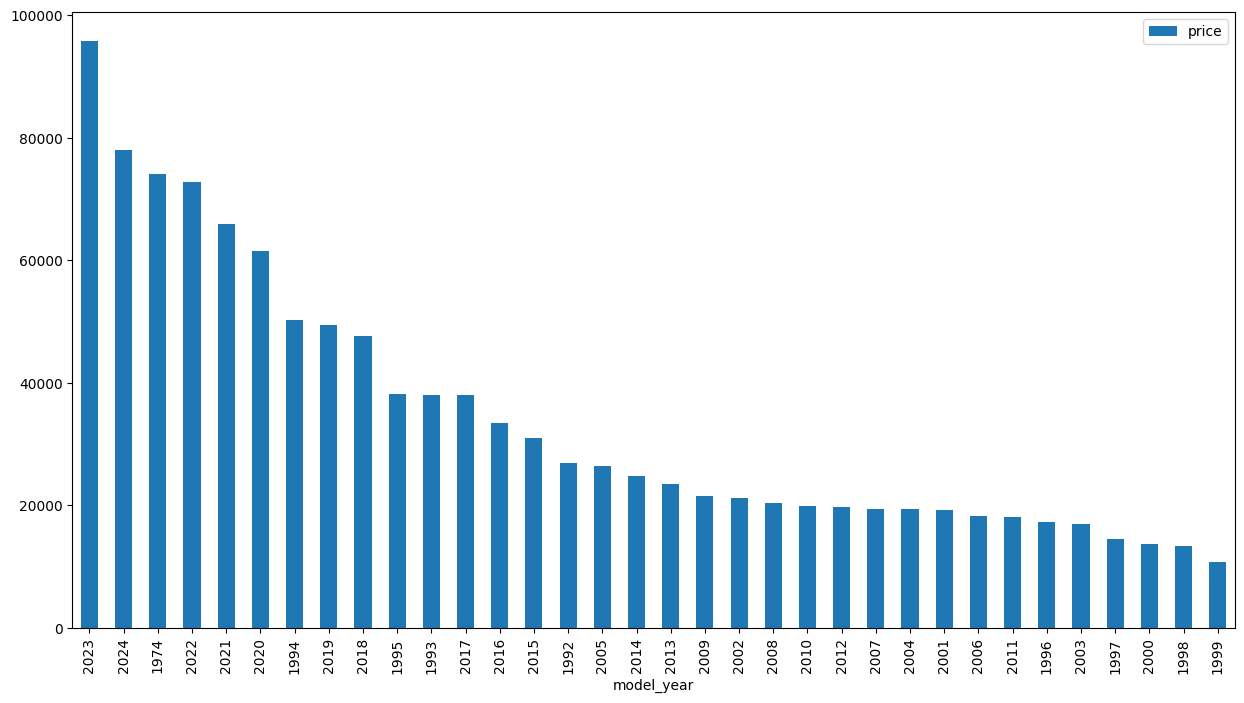

In [96]:
model_year_price.plot(kind='bar', x='model_year',y='price', figsize=(15,8))
plt.show()

## Insights:
- __Model Year 2023 has the highest Average car price and  the lowest Average car price is of the year 1999__

## Average Car Price with respect to Transmission type

In [97]:
train_df.groupby('transmission_type')['price'].mean().sort_values(ascending=False).reset_index()

transmission_type          price
0               DCT  112569.444444
1             Other   50656.516862
2         Automatic   44295.823802
3            Manual   34124.640255
4               CVT   26285.785019

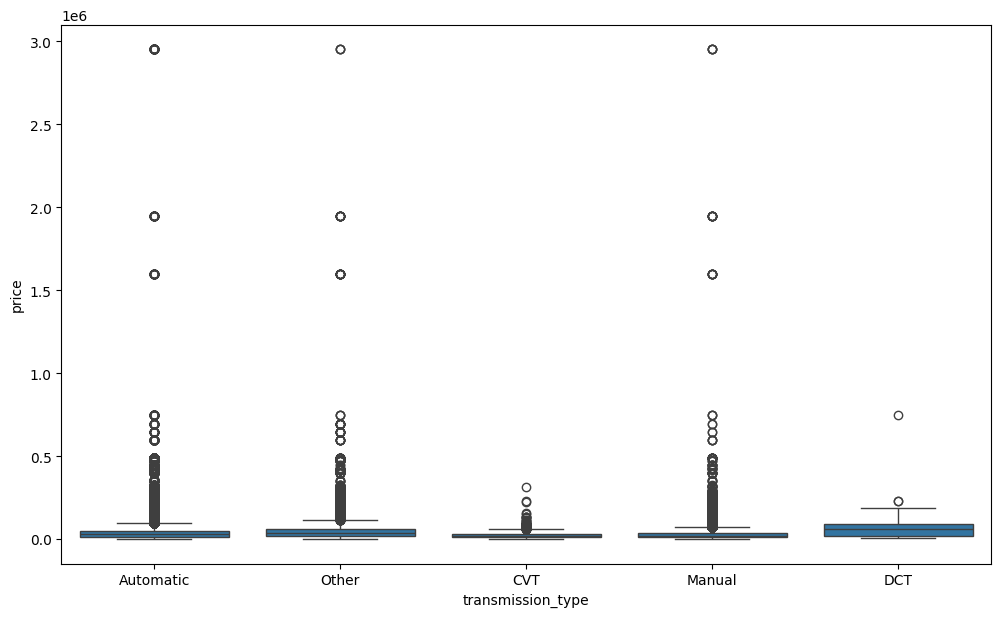

In [98]:
plt.figure(figsize=(12,7))
sns.boxplot(x='transmission_type', y='price', data=train_df)
plt.show()

## Insights:
- __DCT transmission type, despite being the lowest in number has the highest average car price which is obvious because DCT is expensive among all other transmissions__

## Multivariate Analysis

## Affect of Fuel Type and Accident on Price of the Car

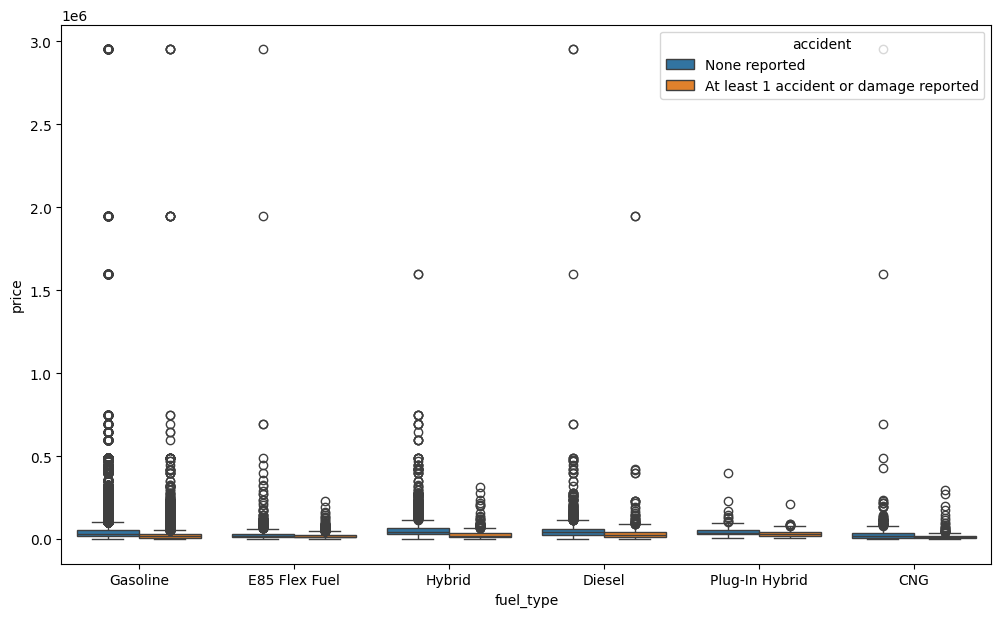

In [99]:
plt.figure(figsize=(12,7))
sns.boxplot(x='fuel_type', y='price', hue='accident', data=train_df)
plt.show()

## Affect of Accident and Mileage on Price 

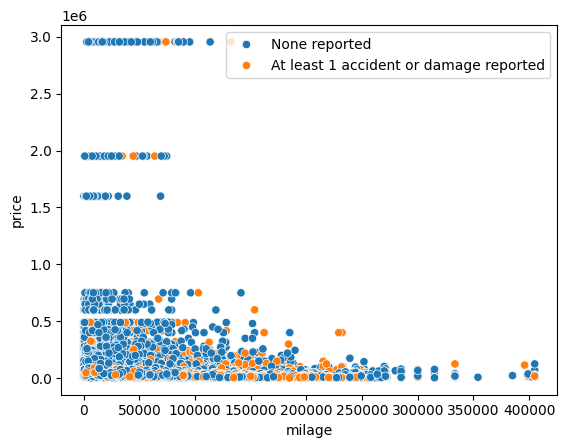

In [100]:
sns.scatterplot(x='milage', y='price', hue='accident', data=train_df)
plt.legend(loc=(1))

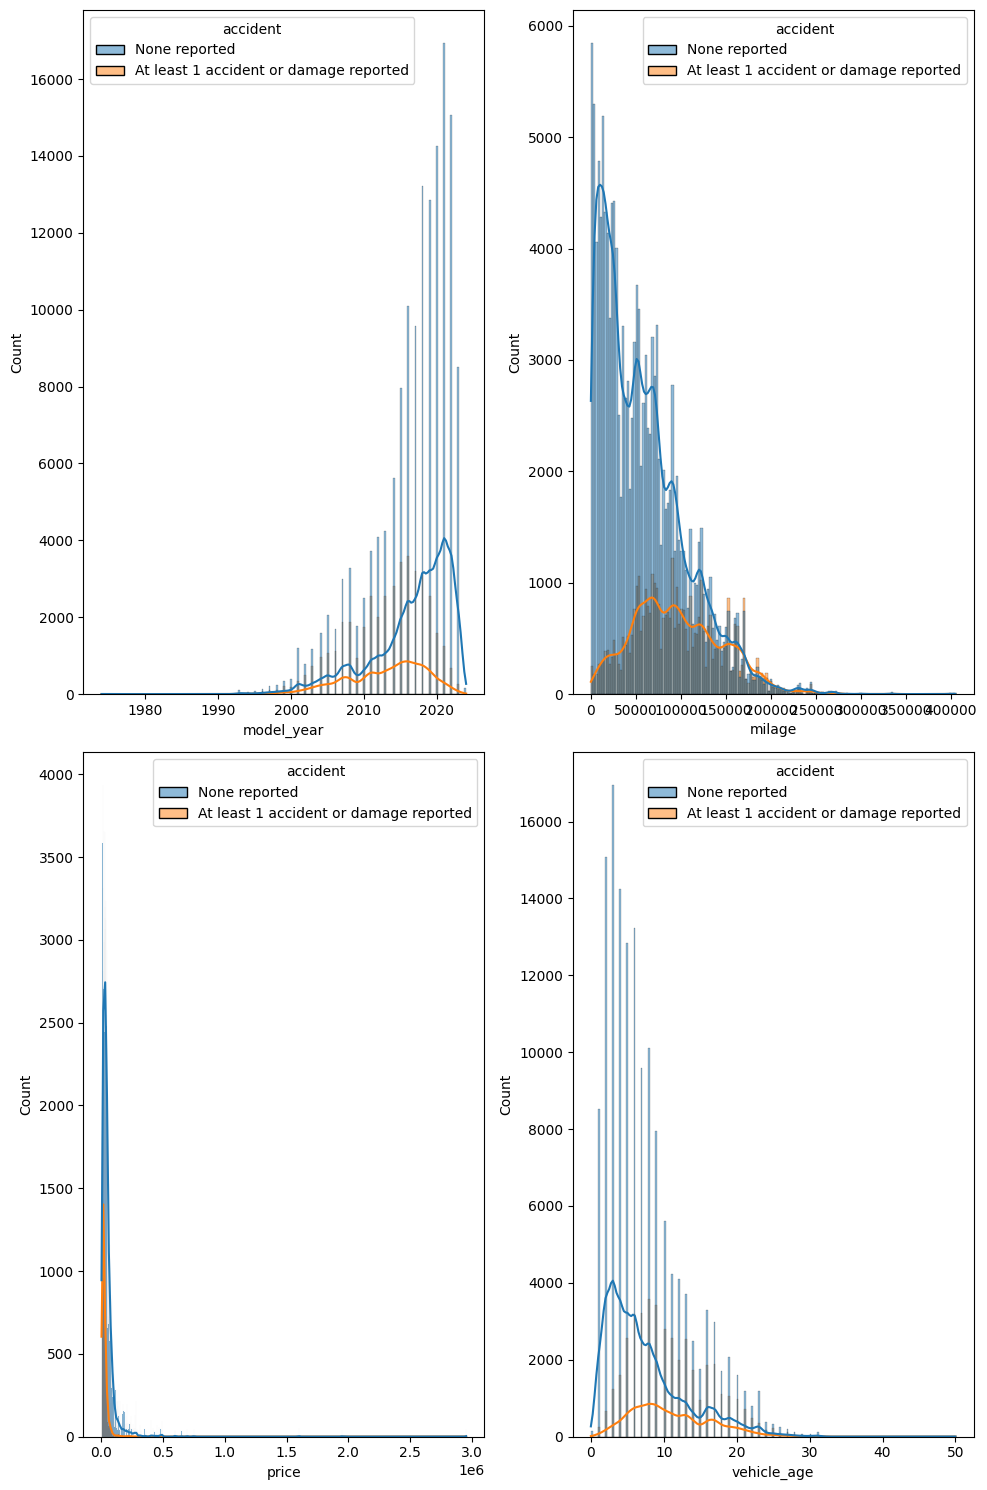

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(10, 15))

idx=0
for row in range(2):
    for col in range(2):
        if(idx < len(num_cols)):
            sns.histplot(ax=axes[row, col], data=train_df, x = num_cols[idx], hue = 'accident', kde=True, color='Red')
        idx += 1
plt.tight_layout()
plt.show()

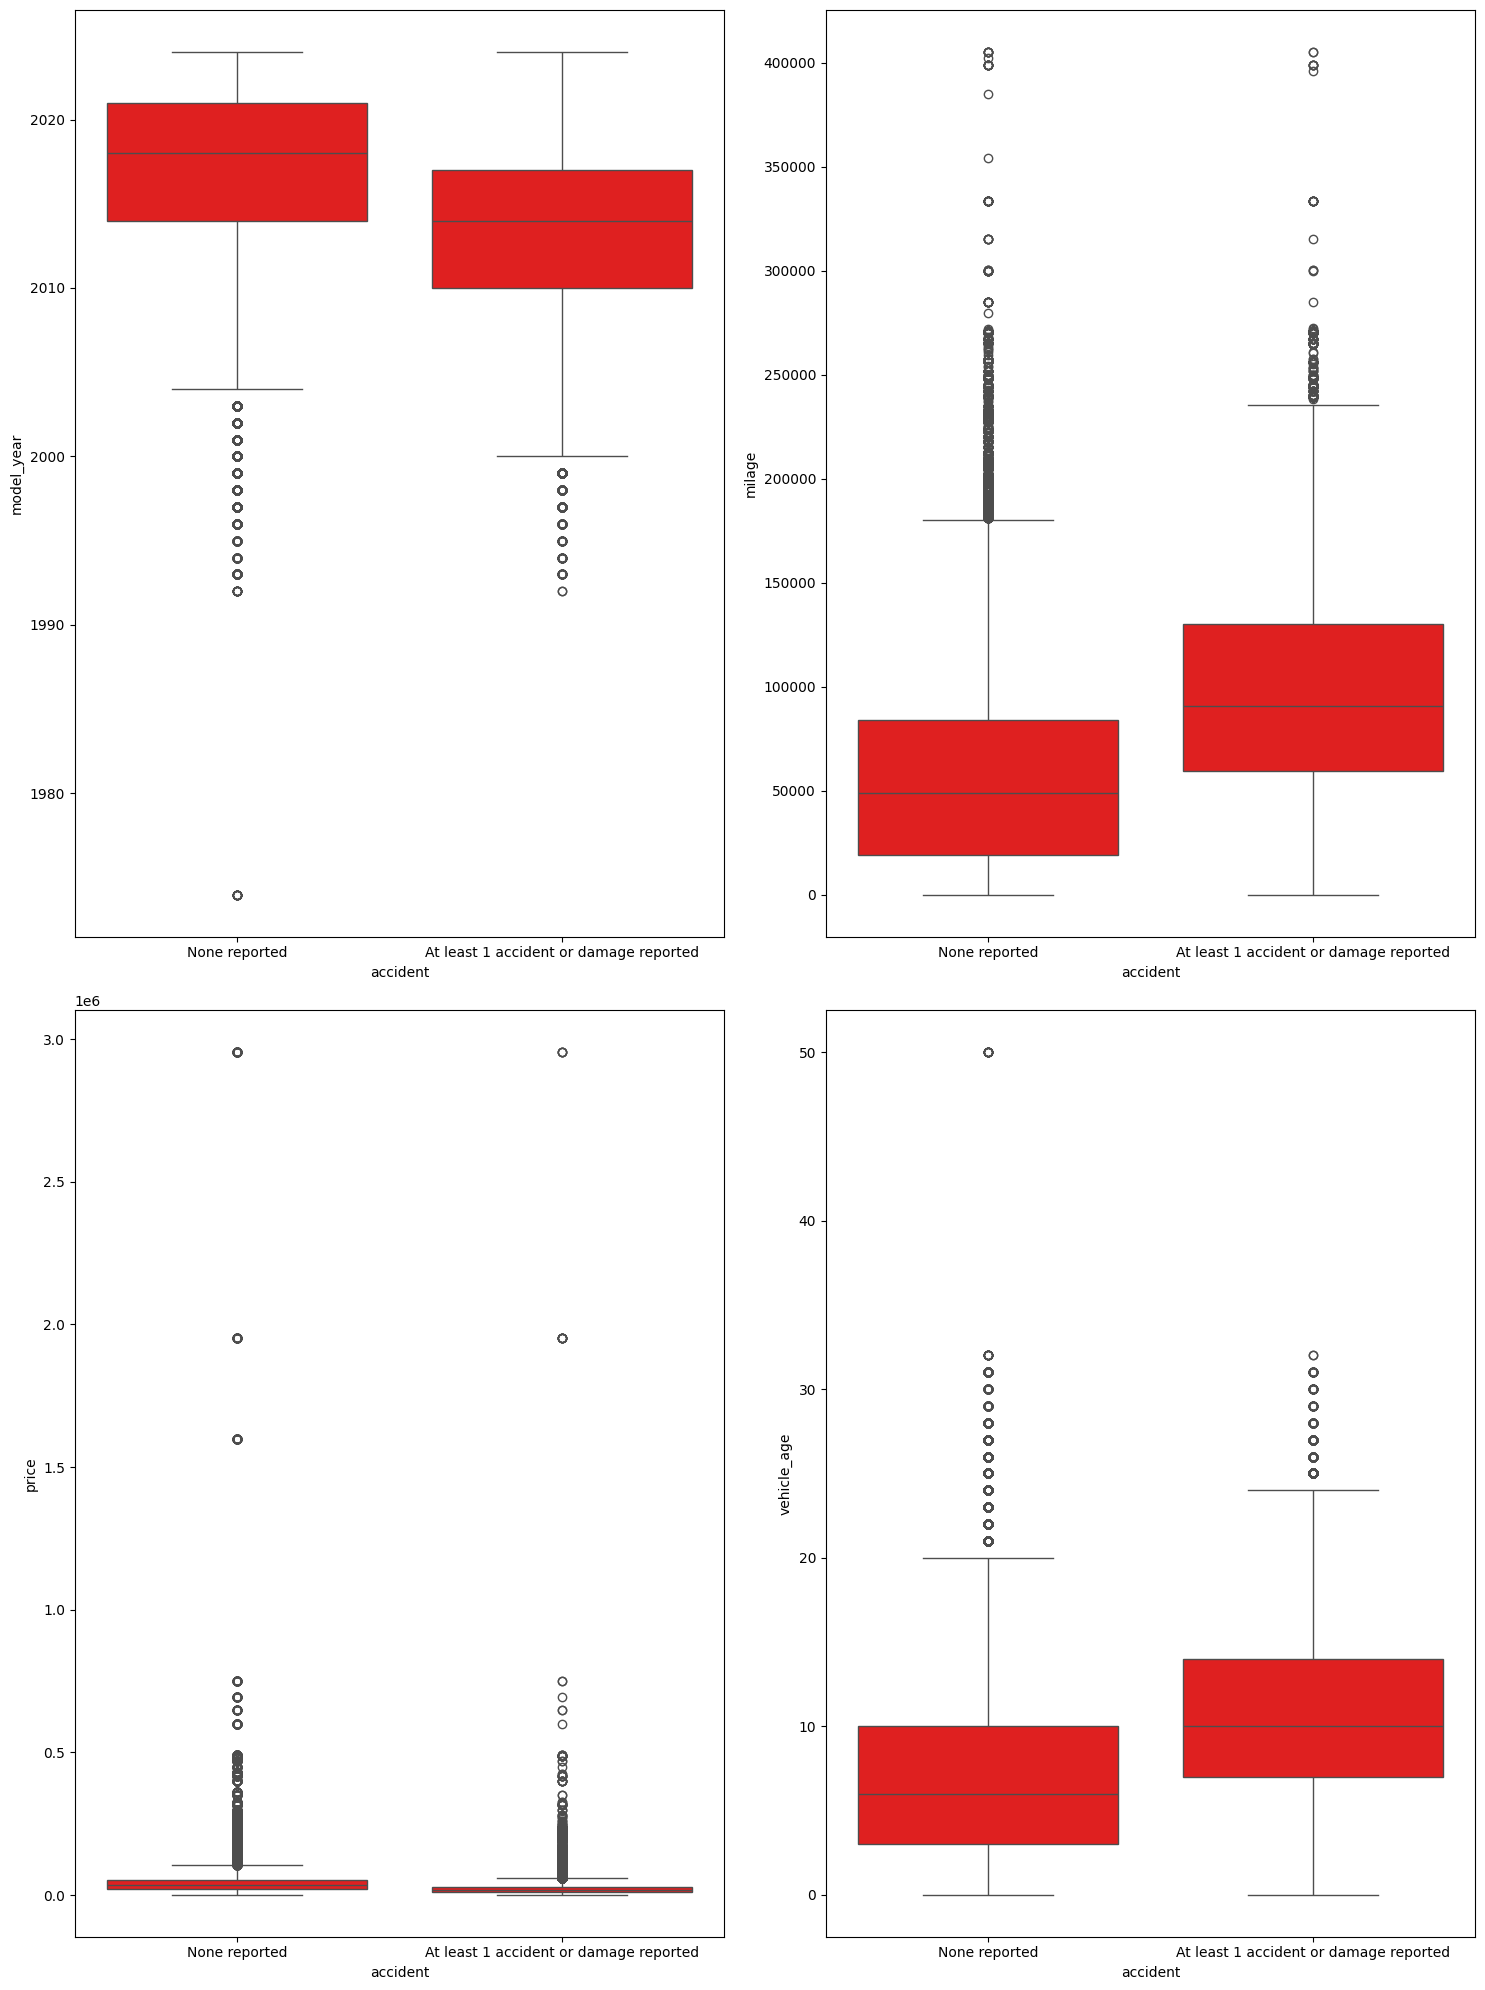

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(15, 20))

idx=0
for row in range(2):
    for col in range(2):
        if(idx < len(num_cols)):
            sns.boxplot(ax=axes[row, col], data=train_df, y = num_cols[idx], x = 'accident', color='Red')
        idx += 1
plt.tight_layout()
plt.show()

## Insights:

## Relation between the Target and Feature Variables

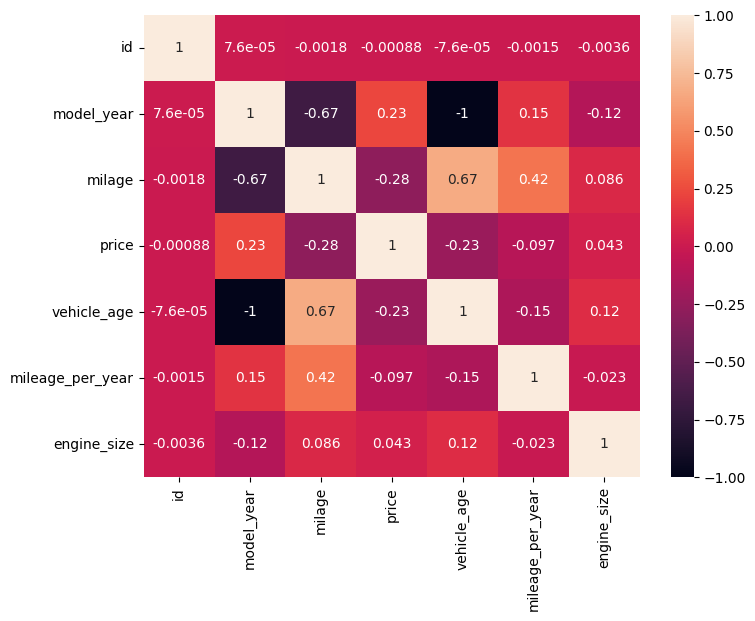

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(data=train_df.select_dtypes(include=[float,int]).corr(), annot=True)
plt.show()

## Insights:
- __There is a extremely high co relation between Vehicle age and Model Year__

## Hypothesis Testing for the Insights

## 1. Does the Car Price is affected by Fuel type

#### STEP-1 : Set up Null Hypothesis

- __Null Hypothesis ( H0 ) - : There is no significant difference between means of price for different fuel types__

- __Alternate Hypothesis ( HA ) : There is a significant difference between means of price for different fuel types__

#### STEP-2 : Checking for basic assumpitons for the hypothesis

- __Distribution check using QQ Plot__
- __Shapiro test for QQ plort distribution__
- __Homogeneity of Variances using Levene's test__

#### STEP-3: Define Test statistics; Distribution of T, Z or ANOVA under H0.

__If the assumptions of T, Z or ANOVA Test are met then we can proceed performing either Tests for independent samples else we will perform the non parametric test equivalent to these Test for independent sample i.e., Kruskal or Mann-Whitney U rank test for two independent samples.__

#### STEP-4: Compute the p-value and fix value of Level of Significance(α).

__We set our alpha to be 0.05__

#### STEP-5: Compare p-value and alpha.

__Based on p-value, we will accept or reject H0.__

- __p-val > alpha : Accept H0__
- __p-val < alpha : Reject H0__

In [104]:
train_df.groupby('fuel_type')['price'].mean().sort_values().reset_index()

fuel_type         price
0   E85 Flex Fuel  26729.755457
1             CNG  36414.285531
2        Gasoline  43876.988827
3  Plug-In Hybrid  44150.967370
4          Diesel  48769.587358
5          Hybrid  55473.451698

In [105]:
from scipy.stats import f_oneway

### Check for all assumptions of ANOVA

In [106]:
ft1 = train_df[train_df['fuel_type']=='E85 Flex Fuel']['price']
ft1

2         13900
7         12500
73        48000
119       11000
132       29000
          ...  
188269    20989
188278    16000
188308     8500
188331    18000
188482    11000
Name: price, Length: 5406, dtype: int64

In [107]:
ft2 = train_df[train_df['fuel_type']=='CNG']['price']
ft2

532       48000
1155      31000
1307      11999
1362      15500
1741       7599
          ...  
187399    11500
187495    10000
187664    65000
187820    31700
188189     9499
Name: price, Length: 781, dtype: int64

In [108]:
ft3 = train_df[train_df['fuel_type']=='Gasoline']['price']
ft3

0          4200
1          4999
3         45000
4         97500
5         29950
          ...  
188528    27500
188529    30000
188530    86900
188531    84900
188532    28995
Name: price, Length: 171038, dtype: int64

In [109]:
ft4 = train_df[train_df['fuel_type']=='Plug-In Hybrid']['price']
ft4

116       95000
213       73897
1605      19900
2825      42433
3008      31500
          ...  
186487    25000
186493    50000
187307    68900
187407     9888
187423    67190
Name: price, Length: 521, dtype: int64

In [110]:
ft5 = train_df[train_df['fuel_type']=='Diesel']['price']
ft5

26        25900
87        27899
353       26000
358       69000
383       62000
          ...  
188317    41900
188341     5500
188381    65000
188387    59000
188389    15900
Name: price, Length: 3955, dtype: int64

In [111]:
ft6= train_df[train_df['fuel_type']=='Hybrid']['price']
ft6

17         55000
23         76000
66         47500
72         65998
100        17500
           ...  
188347     15000
188415     41999
188469    149900
188471     65998
188506     24900
Name: price, Length: 6832, dtype: int64

In [112]:
ft1.mean(), ft2.mean(), ft3.mean(), ft4.mean(), ft5.mean(), ft6.mean()

(26729.75545689974,
 36414.28553137004,
 43876.98882704428,
 44150.96737044146,
 48769.587357774966,
 55473.45169789227)

### Check the Normality of Samples

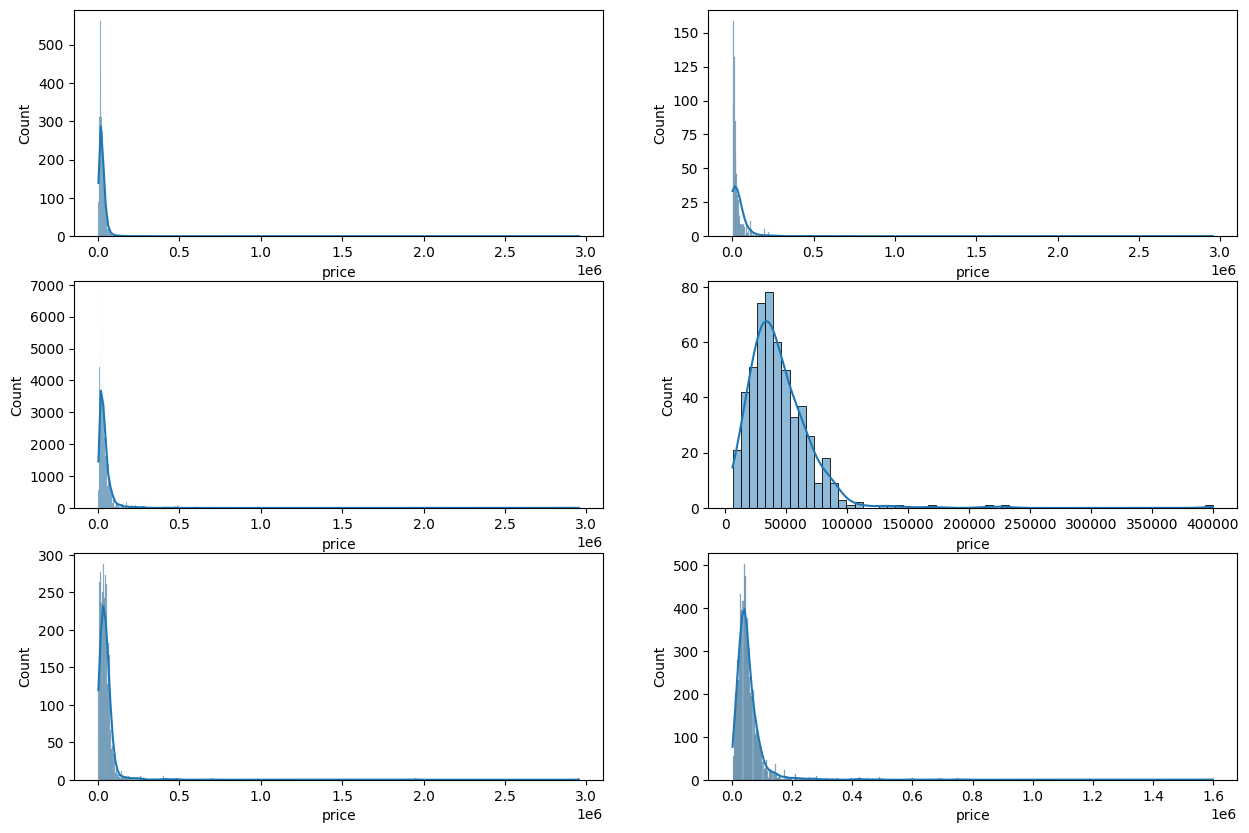

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
sns.histplot(ax=axes[0, 0], x=ft1, kde=True)
sns.histplot(ax=axes[0, 1], x=ft2, kde=True)
sns.histplot(ax=axes[1, 0], x=ft3, kde=True)
sns.histplot(ax=axes[1, 1], x=ft4, kde=True)
sns.histplot(ax=axes[2, 0], x=ft5, kde=True)
sns.histplot(ax=axes[2, 1], x=ft6, kde=True)

plt.show()

## Use QQ plot

In [114]:
from statsmodels.graphics.gofplots import qqplot

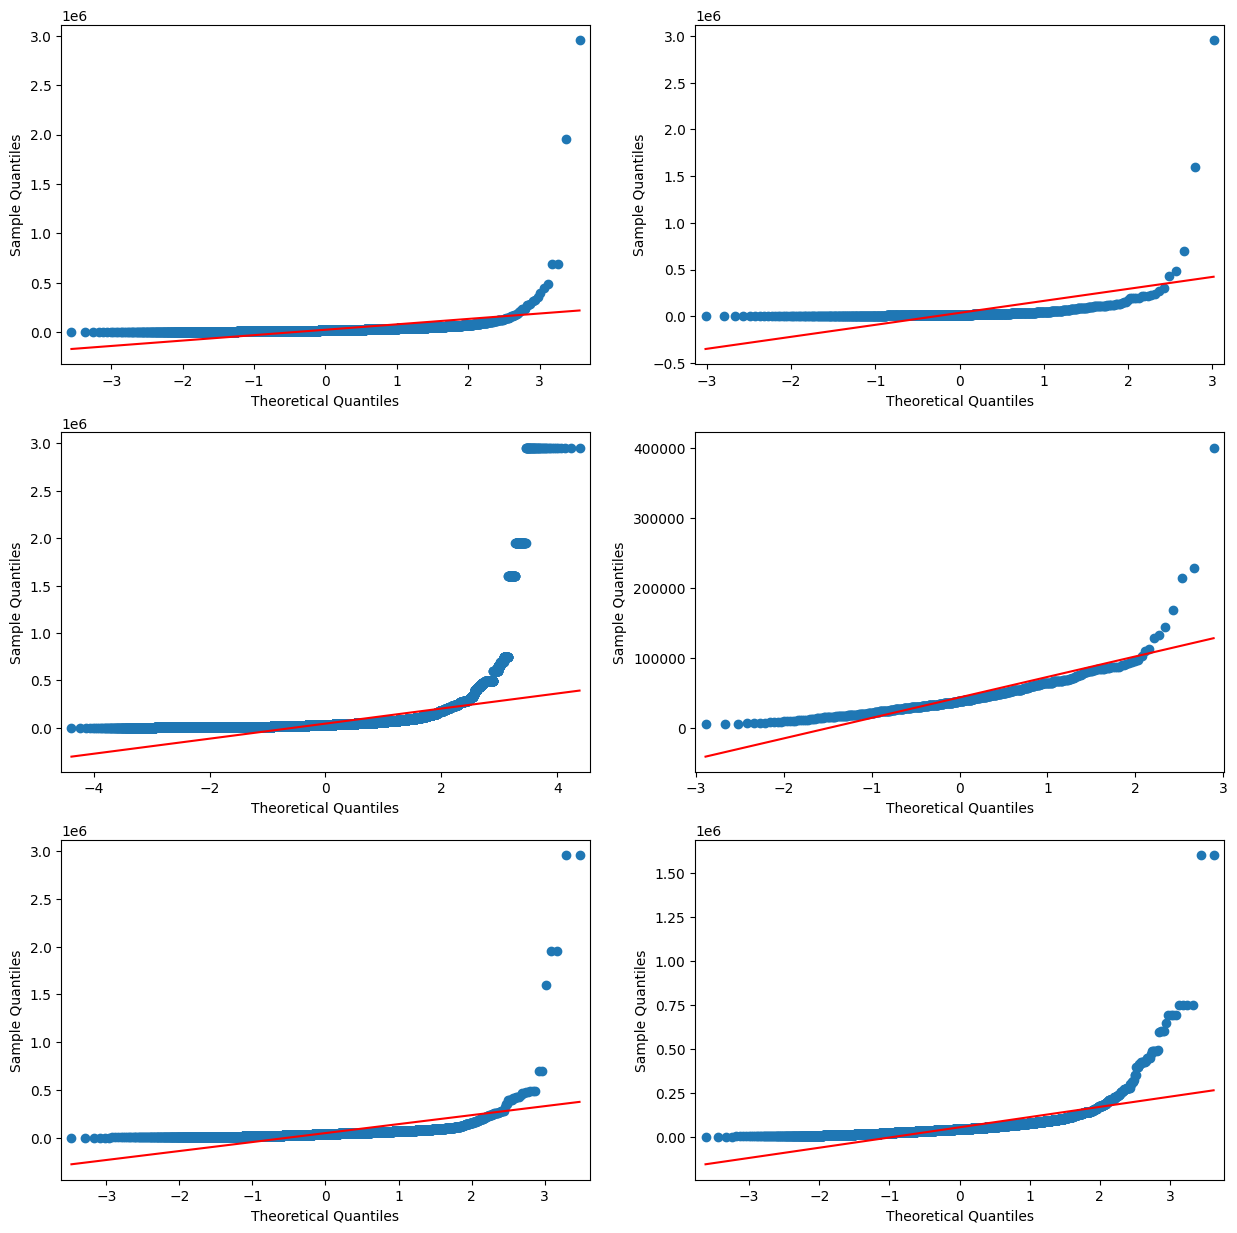

In [115]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(15, 15))
qqplot(ax=axes[0, 0], data=ft1, line='s')
qqplot(ax=axes[0, 1], data=ft2, line='s')
qqplot(ax=axes[1, 0], data=ft3, line='s')
qqplot(ax=axes[1, 1], data=ft4, line='s')
qqplot(ax=axes[2, 0], data=ft5, line='s')
qqplot(ax=axes[2, 1], data=ft6, line='s')
plt.show()

### Apply Shapiro-Wilk test for normality
- __H0 : The sample follows normal distribution__
- __H1 : The sample does not follow normal distribution__
- __alpha = 0.05__

In [116]:
from scipy.stats import shapiro

In [117]:
test_stat1, p_value1 = shapiro(ft1)
print(test_stat1)
print(p_value1)

alpha = 0.05

if p_value1 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.16085284948349
0.0
Reject H0
The sample does not follow normal distribution


In [118]:
test_stat2, p_value2 = shapiro(ft2)
print(test_stat2)
print(p_value2)

alpha = 0.05

if p_value2 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.15573644638061523
0.0
Reject H0
The sample does not follow normal distribution


In [119]:
test_stat3, p_value3 = shapiro(ft3)
print(test_stat3)
print(p_value3)

alpha = 0.05

if p_value3 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.286365270614624
0.0
Reject H0
The sample does not follow normal distribution


In [120]:
test_stat4, p_value4 = shapiro(ft4)
print(test_stat4)
print(p_value4)

alpha = 0.05

if p_value4 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.7111488580703735
5.56616804901933e-29
Reject H0
The sample does not follow normal distribution


In [121]:
test_stat5, p_value5 = shapiro(ft5)
print(test_stat5)
print(p_value5)

alpha = 0.05

if p_value5 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.22138768434524536
0.0
Reject H0
The sample does not follow normal distribution


In [122]:
test_stat6, p_value6 = shapiro(ft6)
print(test_stat6)
print(p_value6)

alpha = 0.05

if p_value6 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.4924575686454773
0.0
Reject H0
The sample does not follow normal distribution


### Homogeneity of Variances using Levene's test
- __H0: Variances are equal__
- __Ha: Variances are not equal__

In [123]:
from scipy.stats import levene

In [124]:
levene_stat8, p_value8 = levene(ft1,ft2,ft3,ft4,ft5,ft6)

print(levene_stat8)
print(p_value8)

alpha = 0.05
if p_value8 < alpha:
    print("Reject H0: Variances are not equal")
else:
    print('Fail to Reject H0: Variance are equal')

32.18928767018631
6.429804786142158e-33
Reject H0: Variances are not equal


### Insights:
__Since the data doesnt follow normal distribution, the Z, T and ANOVA tests cannot be applied. We will try non-parametric test Kruskal-Wallis Test for independent samples__

#### Use Kruskal Test

In [125]:
from scipy.stats import kruskal

In [126]:
# If assumptions of ANOVA fail, use kruskal
test_stat9, p_value9 = kruskal(ft1,ft2,ft3,ft4,ft5,ft6)

print("test statistic:",test_stat9)
print("p_value:",p_value9)
alpha = 0.05

if p_value9 < alpha:
    print("Reject H0")
    print("There is a significant difference between means of price for different fuel types")
else:
    print("Fail to reject H0")
    print("There is no significant difference between means of price for different fuel types")

test statistic: 3626.960080166622
p_value: 0.0
Reject H0
There is a significant difference between means of price for different fuel types


#### Use Mood's Median Test

#### Use Friedmanchisquare

#### Use of Permutation test

## Insights:
- __Since the Hypothesis result shows that there is a significance difference between mean of price for different fuel types, which means that Fuel type has impact on Car Price__

## 2. Does Accident has any impact on Car Price

In [127]:
train_df.groupby('accident')['price'].mean().sort_values().reset_index()

accident         price
0  At least 1 accident or damage reported  25334.071475
1                           None reported  49122.876550

In [128]:
train_df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [129]:
ac1 = train_df[train_df['accident']=='None reported']['price'].values
ac1

array([ 4200, 13900, 45000, ..., 86900, 84900, 28995], dtype=int64)

In [130]:
ac2 = train_df[train_df['accident']=='At least 1 accident or damage reported']['price'].values
ac2

array([ 4999,  7950, 12300, ..., 33600, 24700, 30000], dtype=int64)

In [131]:
ac1.mean(), ac2.mean()

(49122.876549678156, 25334.071474968125)

### Check for the Normality of Samples

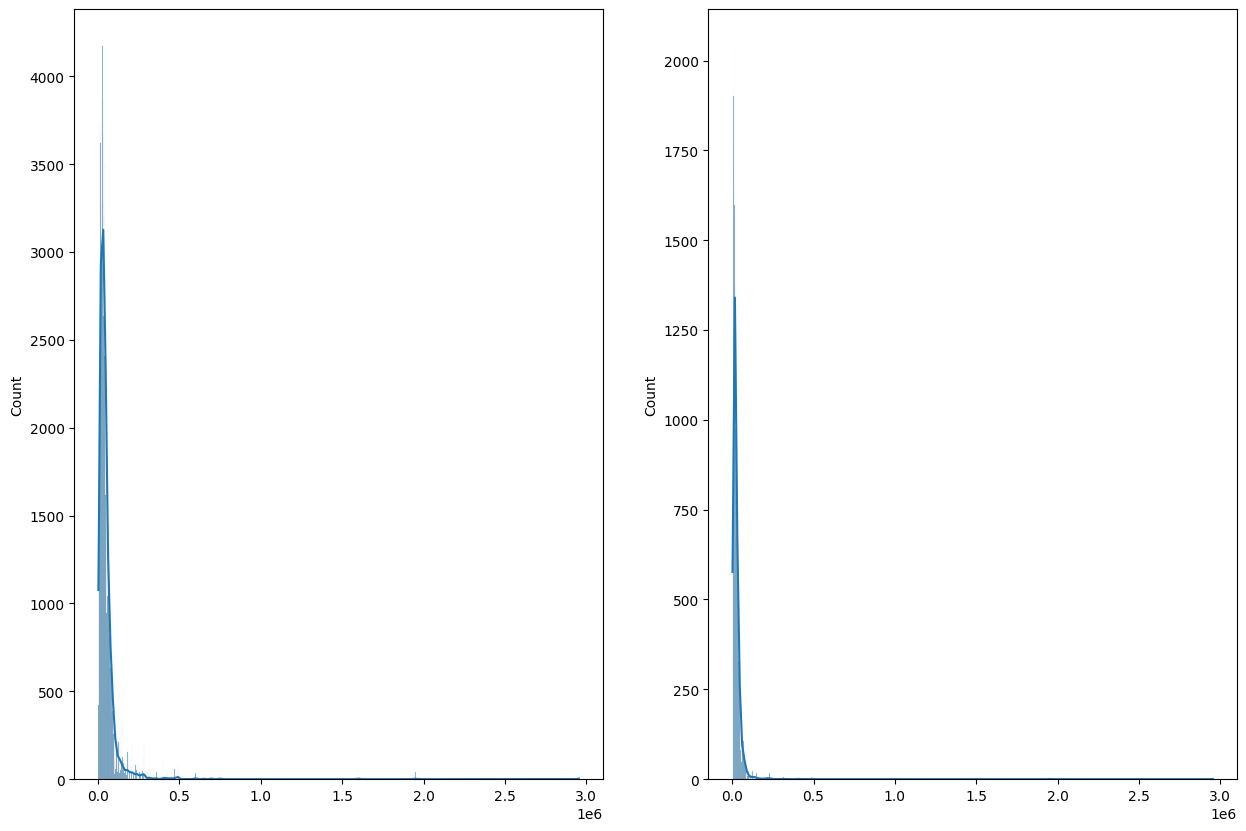

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
sns.histplot(ax=axes[0], x=ac1, kde=True)
sns.histplot(ax=axes[1], x=ac2, kde=True)

plt.show()

### Use QQ plot

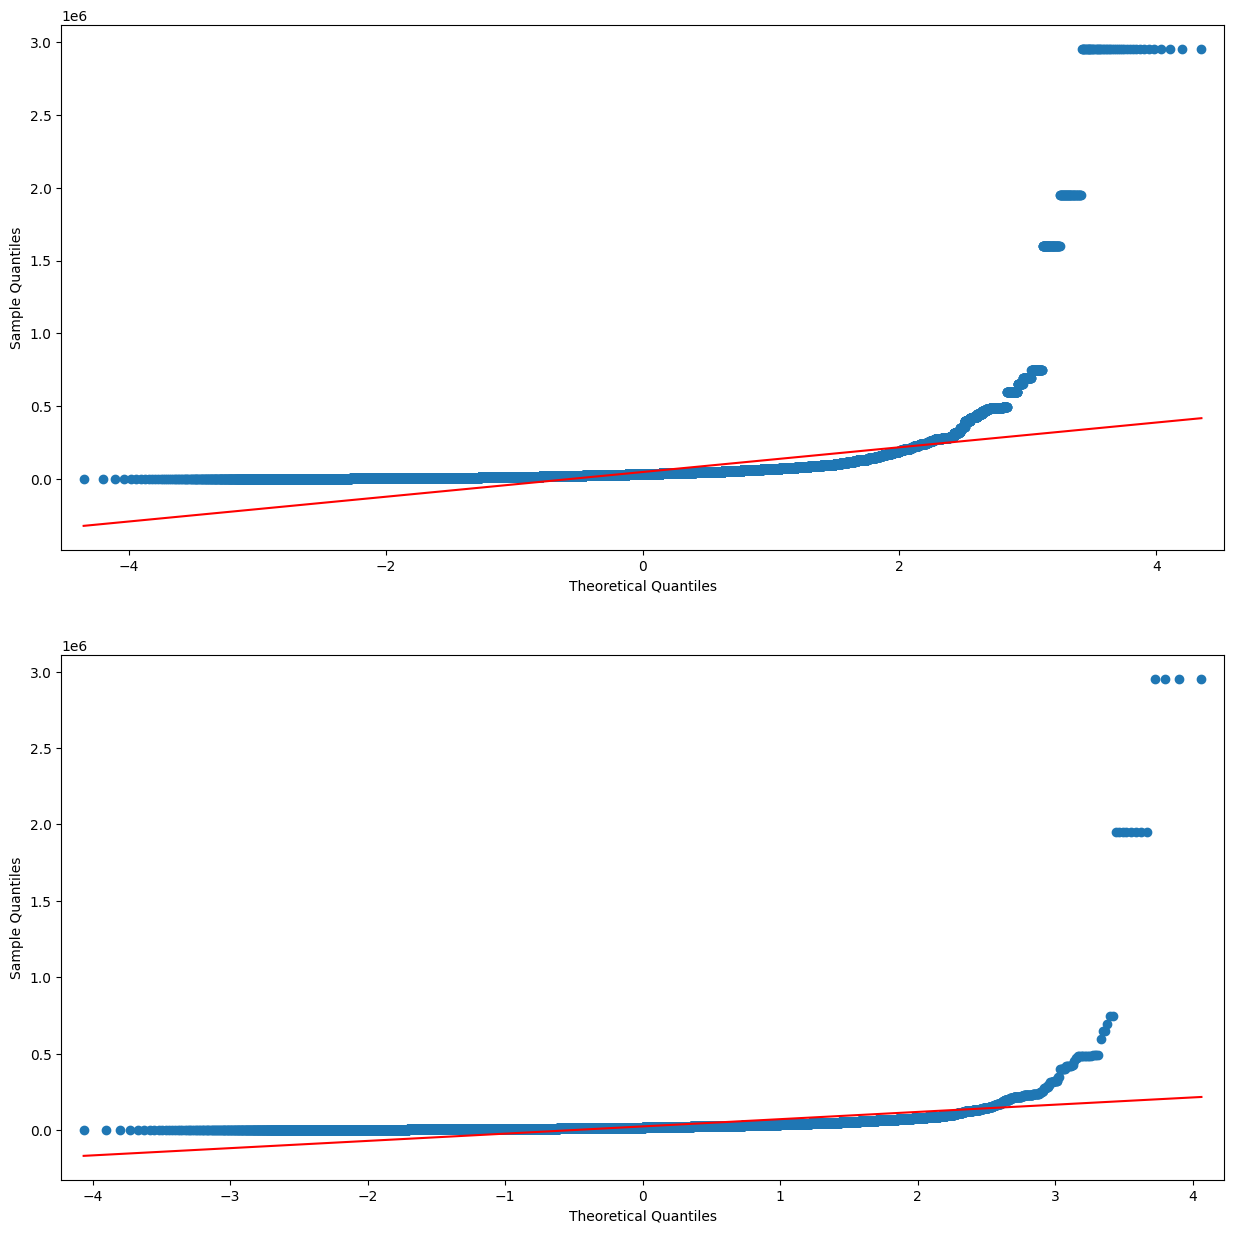

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15, 15))
qqplot(ax=axes[0], data=ac1, line='s')
qqplot(ax=axes[1], data=ac2, line='s')

plt.show()

### Apply Shapiro-Wilk test for normality
- __H0 : The sample follows normal distribution__
- __H1 : The sample does not follow normal distribution__
- __alpha = 0.05__

In [134]:
test_stat11, p_value11 = shapiro(ac1)
print(test_stat11)
print(p_value11)

alpha = 0.05

if p_value11 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.2948697805404663
0.0
Reject H0
The sample does not follow normal distribution


In [135]:
test_stat12, p_value12 = shapiro(ac2)
print(test_stat1)
print(p_value1)

alpha = 0.05

if p_value12 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.16085284948349
0.0
Reject H0
The sample does not follow normal distribution


### Homogeneity of Variances using Levene's test
- __H0: Variances are equal__
- __Ha: Variances are not equal__

In [136]:
levene_stat13, p_value13 = levene(ac1,ac2)

print(levene_stat13)
print(p_value13)

alpha = 0.05
if p_value13 < alpha:
    print("Reject H0: Variances are not equal")
else:
    print('Fail to Reject H0: Variance are equal')

1217.4506665481915
6.98434101406473e-266
Reject H0: Variances are not equal


### Insights:
__Since the data doesnt follow normal distribution, the Z, T and ANOVA tests cannot be applied. We will try non-parametric test Kruskal-Wallis Test for two independent samples__

In [137]:
# If assumptions of ANOVA fail, use kruskal
test_stat14, p_value14 = kruskal(ac1,ac2)

print("test statistic:",test_stat14)
print("p_value:",p_value14)
alpha = 0.05

if p_value14 < alpha:
    print("Reject H0")
    print("There is a significant difference between means of price for for Accidental Cars")
else:
    print("Fail to reject H0")
    print("There is no significant difference between means of price for for Accidental Cars")

test statistic: 18107.646964211523
p_value: 0.0
Reject H0
There is a significant difference between means of price for for Accidental Cars


In [138]:
from scipy.stats import mannwhitneyu

In [139]:
test_stat15, p_value15 = mannwhitneyu(ac1,ac2)

print("test statistic:",test_stat15)
print("p_value:",p_value15)
alpha = 0.05

if p_value15 < alpha:
    print("Reject H0")
    print("There is a significant difference between means of price for Accidental Cars")
else:
    print("Fail to reject H0")
    print("There is no significant difference between means of price for Accidental Cars")

test statistic: 4372772995.5
p_value: 0.0
Reject H0
There is a significant difference between means of price for Accidental Cars


## Insights:
- __Since the Hypothesis result shows that there is a significance difference between mean of price due to accident, which means that Accident has impact on Car Price__

## 3. Does Clean title has any impact on Car Price

In [140]:
train_df.groupby('clean_title')['price'].mean()

clean_title
No     63567.566273
Yes    41354.406704
Name: price, dtype: float64

In [141]:
ct1 = train_df[train_df['clean_title']=='Yes']['price'].values
ct1

array([ 4200,  4999, 13900, ..., 30000, 86900, 28995], dtype=int64)

In [142]:
ct2 = train_df[train_df['clean_title']=='No']['price'].values
ct2

array([41998, 42599, 59598, ..., 48990, 39998, 84900], dtype=int64)

In [143]:
ct1.mean(),ct2.mean()

(41354.40670440537, 63567.56627293525)

### Check for Normality

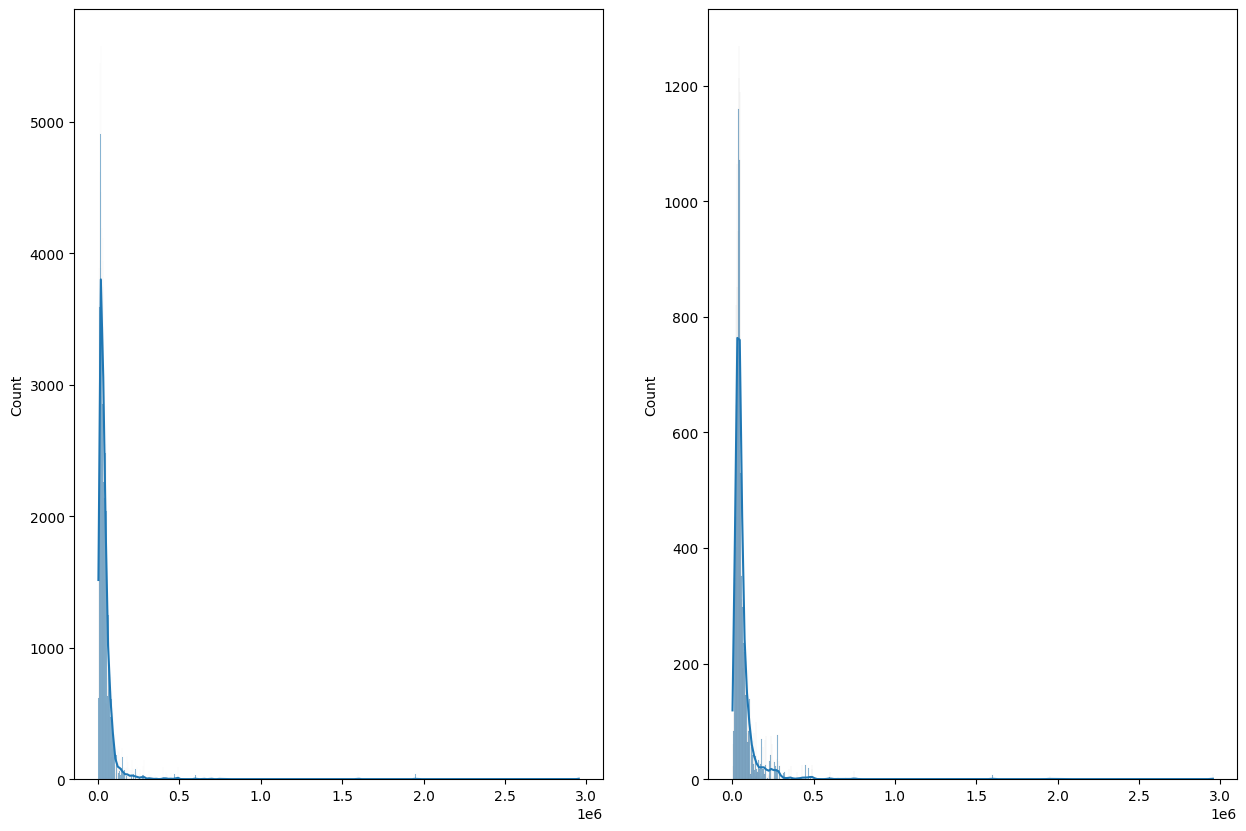

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
sns.histplot(ax=axes[0], x=ct1, kde=True)
sns.histplot(ax=axes[1], x=ct2, kde=True)

plt.show()

### Use QQ plot

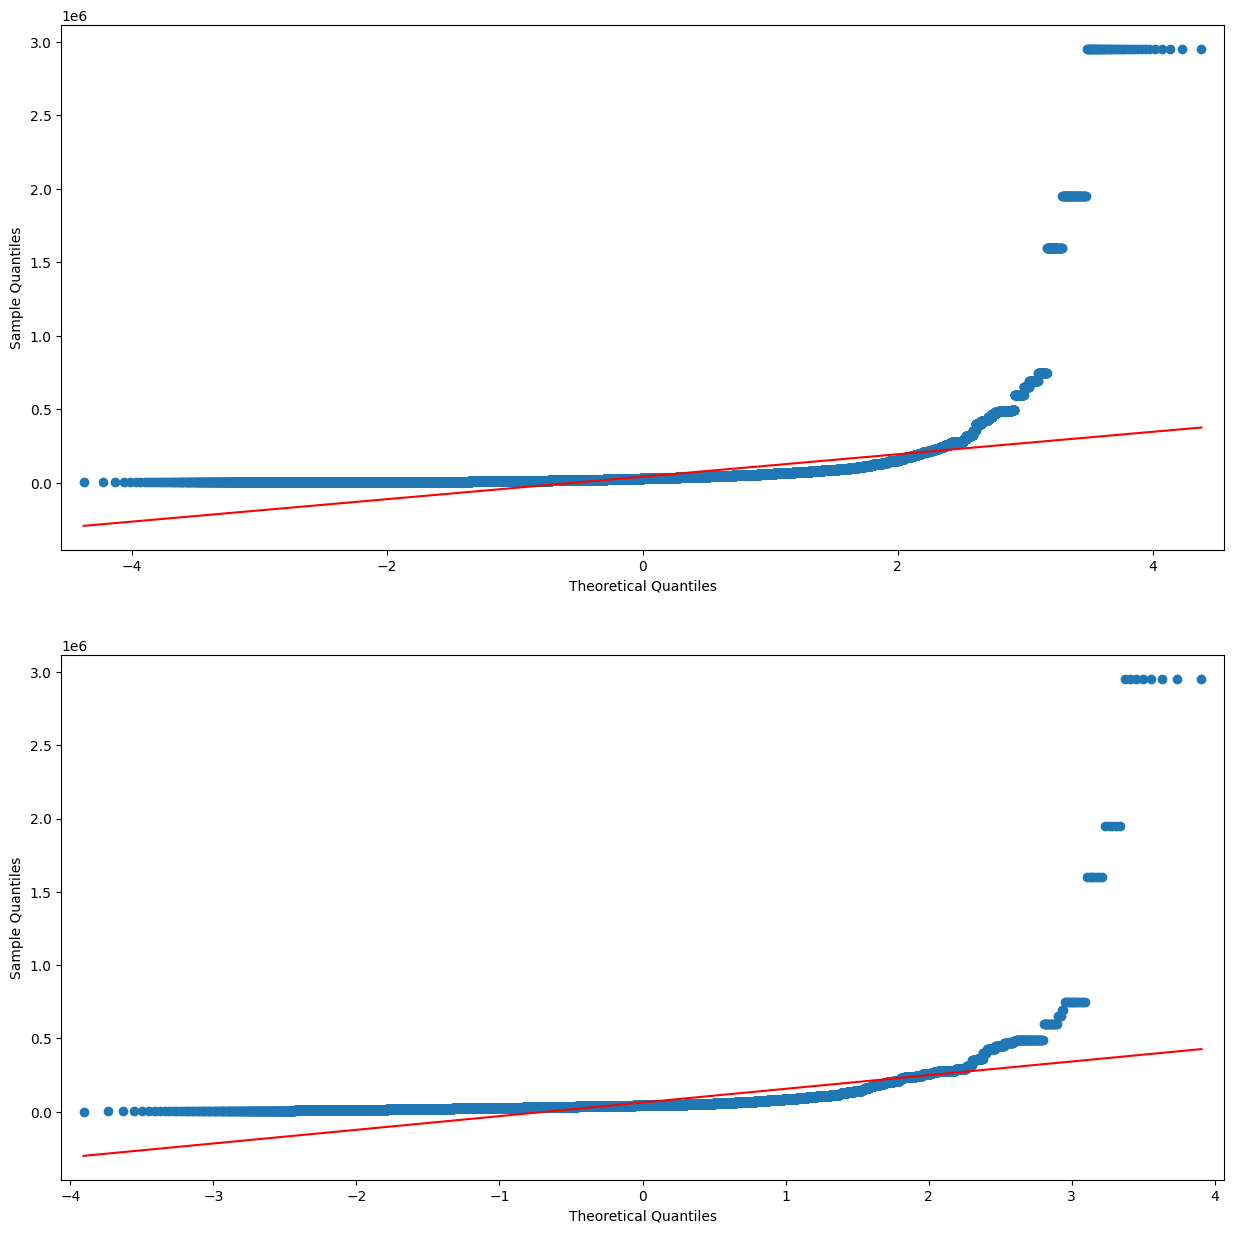

In [145]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15, 15))
qqplot(ax=axes[0], data=ct1, line='s')
qqplot(ax=axes[1], data=ct2, line='s')

plt.show()

### Apply Shapiro-Wilk test for normality
- __H0 : The sample follows normal distribution__
- __H1 : The sample does not follow normal distribution__
- __alpha = 0.05__

In [146]:
test_stat16, p_value16 = shapiro(ct1)
print(test_stat16)
print(p_value16)

alpha = 0.05

if p_value16 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.27288198471069336
0.0
Reject H0
The sample does not follow normal distribution


In [147]:
test_stat17, p_value17 = shapiro(ct2)
print(test_stat17)
print(p_value17)

alpha = 0.05

if p_value17 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.3376091718673706
0.0
Reject H0
The sample does not follow normal distribution


### Homogeneity of Variances using Levene's test
- __H0: Variances are equal__
- __Ha: Variances are not equal__

In [148]:
levene_stat18, p_value18 = levene(ct1,ct2)

print(levene_stat18)
print(p_value18)

alpha = 0.05
if p_value18 < alpha:
    print("Reject H0: Variances are not equal")
else:
    print('Fail to Reject H0: Variance are equal')

184.26266262408268
5.950024924480635e-42
Reject H0: Variances are not equal


### Insights:
__Since the data doesnt follow normal distribution, the Z, T and ANOVA tests cannot be applied. We will try non-parametric test Kruskal-Wallis Test for two independent samples__

In [149]:
# If assumptions of ANOVA fail, use kruskal
test_stat19, p_value19 = kruskal(ac1,ac2)

print("test statistic:",test_stat19)
print("p_value:",p_value19)
alpha = 0.05

if p_value19 < alpha:
    print("Reject H0")
    print("There is a significant difference between means of price for different clean title")
else:
    print("Fail to reject H0")
    print("There is no significant difference between means of price for different clean title")

test statistic: 18107.646964211523
p_value: 0.0
Reject H0
There is a significant difference between means of price for different clean title


In [150]:
# If assumptions of ANOVA fail, use kruskal
test_stat20, p_value20 = mannwhitneyu(ac1,ac2)

print("test statistic:",test_stat20)
print("p_value:",p_value20)
alpha = 0.05

if p_value20 < alpha:
    print("Reject H0")
    print("There is a significant difference between means of price for different clean title")
else:
    print("Fail to reject H0")
    print("There is no significant difference between means of price for different clean title")

test statistic: 4372772995.5
p_value: 0.0
Reject H0
There is a significant difference between means of price for different clean title


## Insights:
- __Since the Hypothesis result shows that there is a significance difference between mean of price for Clean Title, which means that Clean Title has impact on Car Price__

## 4. Does transmission type has any impact on Car Price

In [151]:
train_df.groupby('transmission_type')['price'].mean()

transmission_type
Automatic     44295.823802
CVT           26285.785019
DCT          112569.444444
Manual        34124.640255
Other         50656.516862
Name: price, dtype: float64

In [152]:
tr1 = train_df[train_df['transmission_type']=='Automatic']['price'].values
tr1

array([ 4200,  4999, 13900, ..., 30000, 86900, 84900], dtype=int64)

In [153]:
tr2 = train_df[train_df['transmission_type']=='Other']['price'].values
tr2

array([45000,  4000, 76000, ..., 30500, 27500, 28995], dtype=int64)

In [154]:
tr3 = train_df[train_df['transmission_type']=='CVT']['price'].values
tr3

array([54500, 29995, 27500, ..., 18000, 42998, 54598], dtype=int64)

In [155]:
tr4 = train_df[train_df['transmission_type']=='Manual']['price'].values
tr4

array([11999,  9500, 29500, ..., 11500,  4300, 36300], dtype=int64)

In [156]:
tr5 = train_df[train_df['transmission_type']=='DCT']['price'].values
tr5

array([188500,  97555, 234000,  18998,   9650,  21000,  19500,  69998,
        89900,  16499,  21995,  55655, 749950, 229000,  28900,  78900,
        29000,  67250], dtype=int64)

In [157]:
tr1.mean(), tr2.mean(), tr3.mean(), tr4.mean(), tr5.mean()

(44295.82380227682,
 50656.5168619825,
 26285.785019455252,
 34124.64025539678,
 112569.44444444444)

### Check for Normality

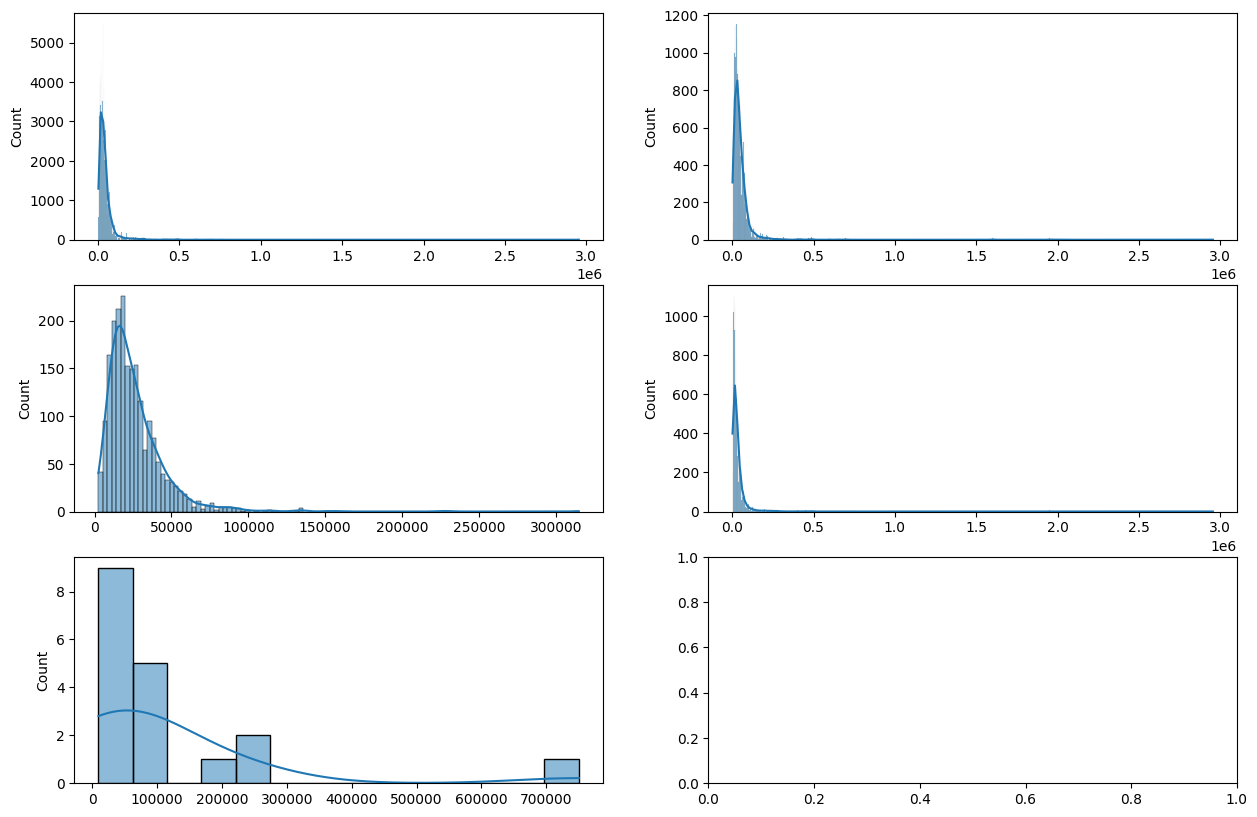

In [158]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
sns.histplot(ax=axes[0,0], x=tr1, kde=True)
sns.histplot(ax=axes[0,1], x=tr2, kde=True)
sns.histplot(ax=axes[1,0], x=tr3, kde=True)
sns.histplot(ax=axes[1,1], x=tr4, kde=True)
sns.histplot(ax=axes[2,0], x=tr5, kde=True)

plt.show()

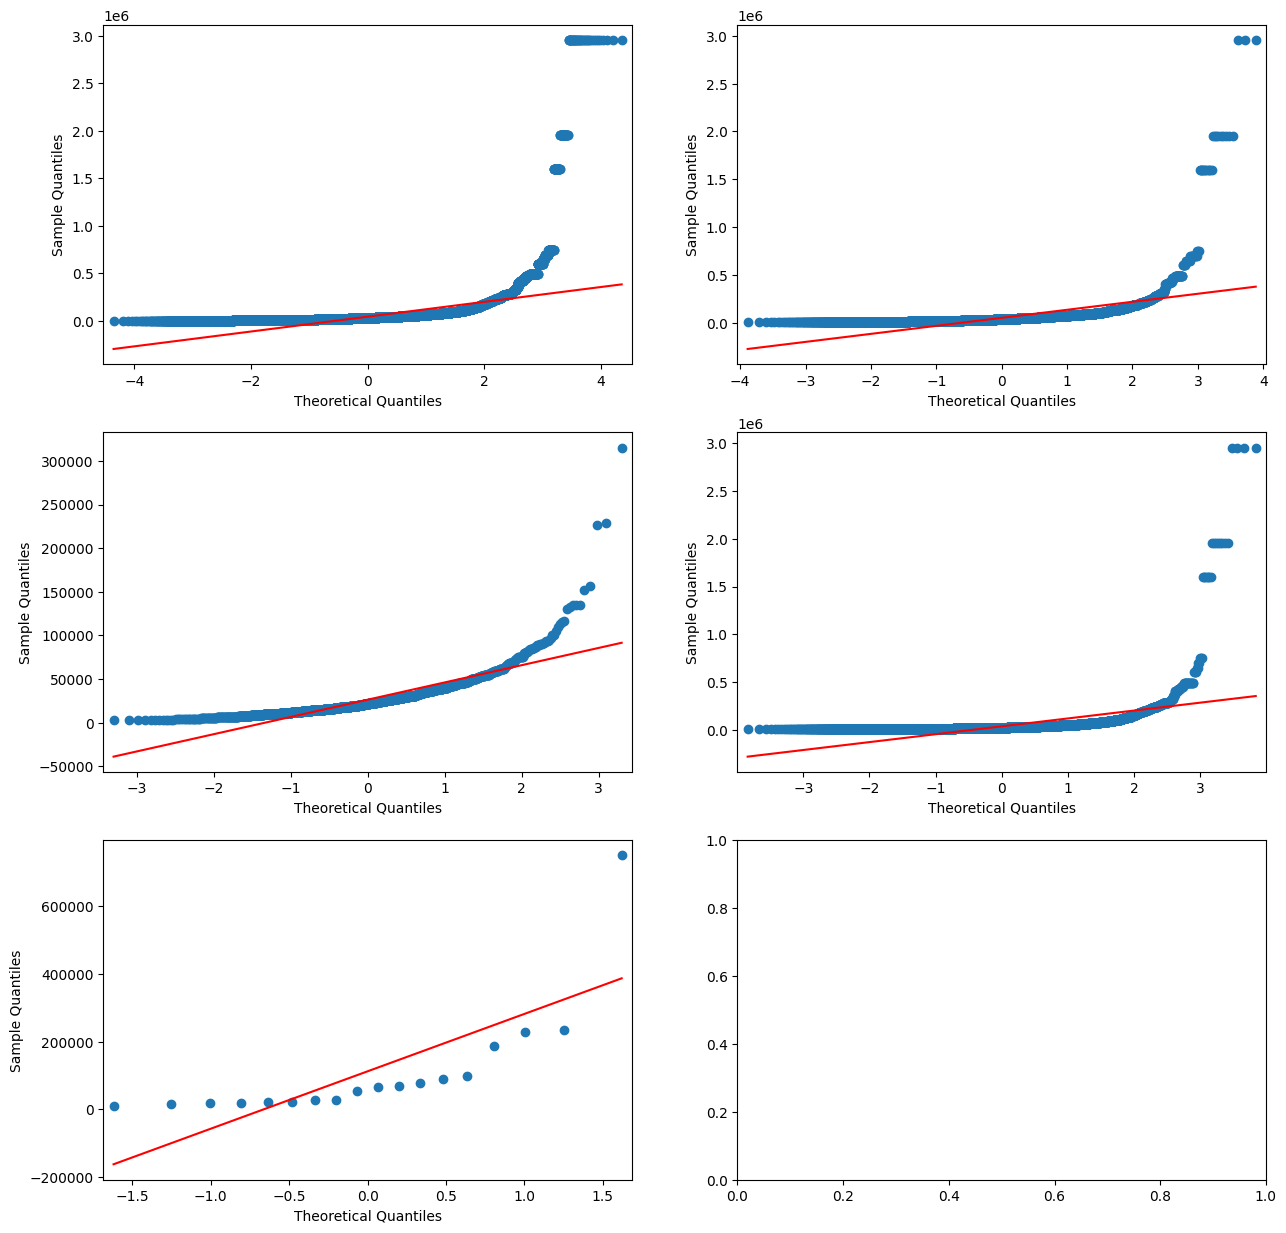

In [159]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=(15, 15))
qqplot(ax=axes[0,0], data=tr1, line='s')
qqplot(ax=axes[0,1], data=tr2, line='s')
qqplot(ax=axes[1,0], data=tr3, line='s')
qqplot(ax=axes[1,1], data=tr4, line='s')
qqplot(ax=axes[2,0], data=tr5, line='s')

plt.show()

### Apply Shapiro-Wilk test for normality
- __H0 : The sample follows normal distribution__
- __H1 : The sample does not follow normal distribution__
- __alpha = 0.05__

In [160]:
test_stat21, p_value21 = shapiro(tr1)
print(test_stat21)
print(p_value21)

alpha = 0.05

if p_value21 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.2912113666534424
0.0
Reject H0
The sample does not follow normal distribution


In [161]:
test_stat22, p_value22 = shapiro(tr2)
print(test_stat22)
print(p_value22)

alpha = 0.05

if p_value22 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.29848116636276245
0.0
Reject H0
The sample does not follow normal distribution


In [162]:
test_stat23, p_value23 = shapiro(tr3)
print(test_stat23)
print(p_value23)

alpha = 0.05

if p_value23 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.7349928617477417
0.0
Reject H0
The sample does not follow normal distribution


In [163]:
test_stat24, p_value24 = shapiro(tr4)
print(test_stat24)
print(p_value24)

alpha = 0.05

if p_value24 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.21182334423065186
0.0
Reject H0
The sample does not follow normal distribution


In [164]:
test_stat25, p_value25 = shapiro(tr5)
print(test_stat25)
print(p_value25)

alpha = 0.05

if p_value25 < alpha:
    print("Reject H0")
    print("The sample does not follow normal distribution")
else:
    print("Fail to reject H0")
    print("The sample follows normal distribution")

0.5784500241279602
4.168764007772552e-06
Reject H0
The sample does not follow normal distribution


### Homogeneity of Variances using Levene's test
- __H0: Variances are equal__
- __Ha: Variances are not equal__

In [165]:
levene_stat26, p_value26 = levene(tr1,tr2,tr3,tr4,tr5)

print(levene_stat26)
print(p_value26)

alpha = 0.05
if p_value26 < alpha:
    print("Reject H0: Variances are not equal")
else:
    print('Fail to Reject H0: Variance are equal')

38.74794227875552
1.7876665080405358e-32
Reject H0: Variances are not equal


### Insights:
__Since the data doesnt follow normal distribution, the Z, T and ANOVA tests cannot be applied. We will try non-parametric test Kruskal-Wallis Test for two independent samples__

In [166]:
# If assumptions of ANOVA fail, use kruskal
test_stat27, p_value27 = kruskal(tr1,tr2,tr3,tr4,tr5)

print("test statistic:",test_stat27)
print("p_value:",p_value27)
alpha = 0.05

if p_value27 < alpha:
    print("Reject H0")
    print("There is a significant difference between means of price for different transmissions")
else:
    print("Fail to reject H0")
    print("There is no significant difference between means of price for different transmissions")

test statistic: 4495.301269739718
p_value: 0.0
Reject H0
There is a significant difference between means of price for different transmissions


## Insights:
- __Since the Hypothesis result shows that there is a significance difference between mean of price for Clean Title, which means that Clean Title has impact on Car Price__

## Final Dataset

### 1. For Train Dataset

In [167]:
final_train_df = train_df.drop(columns=['id','brand','model','engine','transmission','ext_col','int_col'])
final_train_df.head(3)

model_year  milage      fuel_type                                accident  \
0        2007  213000       Gasoline                           None reported   
1        2002  143250       Gasoline  At least 1 accident or damage reported   
2        2002  136731  E85 Flex Fuel                           None reported   

  clean_title  price  vehicle_age  mileage_per_year  engine_size  \
0         Yes   4200           17           12529.0          1.6   
1         Yes   4999           22            6511.0          3.9   
2         Yes  13900           22            6215.0          5.3   

  transmission_type  
0         Automatic  
1         Automatic  
2         Automatic

In [168]:
final_train_df.shape

(188533, 10)

### Convert Categorical columns to Numerical columns for both the datasets

In [169]:
final_train_ohe_df = pd.get_dummies(final_train_df, columns=['fuel_type','accident','clean_title','transmission_type'], drop_first=True)
final_train_ohe_df = final_train_ohe_df.astype(int)
final_train_ohe_df.head(3)

model_year  milage  price  vehicle_age  mileage_per_year  engine_size  \
0        2007  213000   4200           17             12529            1   
1        2002  143250   4999           22              6511            3   
2        2002  136731  13900           22              6215            5   

   fuel_type_Diesel  fuel_type_E85 Flex Fuel  fuel_type_Gasoline  \
0                 0                        0                   1   
1                 0                        0                   1   
2                 0                        1                   0   

   fuel_type_Hybrid  fuel_type_Plug-In Hybrid  accident_None reported  \
0                 0                         0                       1   
1                 0                         0                       0   
2                 0                         0                       1   

   clean_title_Yes  transmission_type_CVT  transmission_type_DCT  \
0                1                      0                      0   
1                1                      0                      0   
2                1                      0                      0   

   transmission_type_Manual  transmission_type_Other  
0                         0                        0  
1                         0                        0  
2                         0                        0

In [170]:
final_train_ohe_df.rename(columns = {'fuel_type_E85 Flex Fuel':'fuel_type_E85_Flex_Fuel', 
                                     'fuel_type_Plug-In Hybrid':'fuel_type_Plug_In_Hybrid',
                                    'accident_None reported':'accident_None_reported'}, inplace=True)

In [171]:
final_train_ohe_df.corr()

model_year    milage     price  vehicle_age  \
model_year                  1.000000 -0.669936  0.231795    -1.000000   
milage                     -0.669936  1.000000 -0.283067     0.669936   
price                       0.231795 -0.283067  1.000000    -0.231795   
vehicle_age                -1.000000  0.669936 -0.231795     1.000000   
mileage_per_year            0.148229  0.418053 -0.097103    -0.148229   
engine_size                -0.064120  0.039122  0.062832     0.064120   
fuel_type_Diesel            0.005828  0.045240  0.009084    -0.005828   
fuel_type_E85_Flex_Fuel    -0.056104  0.128933 -0.037381     0.056104   
fuel_type_Gasoline         -0.036091 -0.026172 -0.000041     0.036091   
fuel_type_Hybrid            0.133783 -0.112423  0.028527    -0.133783   
fuel_type_Plug_In_Hybrid    0.032316 -0.027160  0.000182    -0.032316   
accident_None_reported      0.256367 -0.321356  0.125122    -0.256367   
clean_title_Yes            -0.264893  0.242779 -0.089433     0.264893   
transmission_type_CVT       0.009811  0.023903 -0.023436    -0.009811   
transmission_type_DCT       0.005184 -0.008356  0.008516    -0.005184   
transmission_type_Manual   -0.265308  0.082827 -0.038253     0.265308   
transmission_type_Other     0.045944 -0.068697  0.029244    -0.045944   

                          mileage_per_year  engine_size  fuel_type_Diesel  \
model_year                        0.148229    -0.064120          0.005828   
milage                            0.418053     0.039122          0.045240   
price                            -0.097103     0.062832          0.009084   
vehicle_age                      -0.148229     0.064120         -0.005828   
mileage_per_year                  1.000000    -0.027180          0.067597   
engine_size                      -0.027180     1.000000          0.187718   
fuel_type_Diesel                  0.067597     0.187718          1.000000   
fuel_type_E85_Flex_Fuel           0.054292     0.141992         -0.025150   
fuel_type_Gasoline               -0.059077    -0.082843         -0.457691   
fuel_type_Hybrid                 -0.001320    -0.079104         -0.028384   
fuel_type_Plug_In_Hybrid          0.003159    -0.043268         -0.007706   
accident_None_reported           -0.077607    -0.010630         -0.014018   
clean_title_Yes                   0.005199     0.156940          0.017066   
transmission_type_CVT             0.032032    -0.073462         -0.014301   
transmission_type_DCT            -0.006081     0.003517         -0.001430   
transmission_type_Manual         -0.100639    -0.007802         -0.042758   
transmission_type_Other          -0.050138     0.041023         -0.020148   

                          fuel_type_E85_Flex_Fuel  fuel_type_Gasoline  \
model_year                              -0.056104           -0.036091   
milage                                   0.128933           -0.026172   
price                                   -0.037381           -0.000041   
vehicle_age                              0.056104            0.036091   
mileage_per_year                         0.054292           -0.059077   
engine_size                              0.141992           -0.082843   
fuel_type_Diesel                        -0.025150           -0.457691   
fuel_type_E85_Flex_Fuel                  1.000000           -0.537219   
fuel_type_Gasoline                      -0.537219            1.000000   
fuel_type_Hybrid                        -0.033316           -0.606296   
fuel_type_Plug_In_Hybrid                -0.009045           -0.164595   
accident_None_reported                  -0.067549            0.023317   
clean_title_Yes                          0.044385            0.017825   
transmission_type_CVT                   -0.017123           -0.046330   
transmission_type_DCT                   -0.001679            0.001254   
transmission_type_Manual                -0.051874            0.084096   
transmission_type_Other                 -0.039552            0.033366   

         

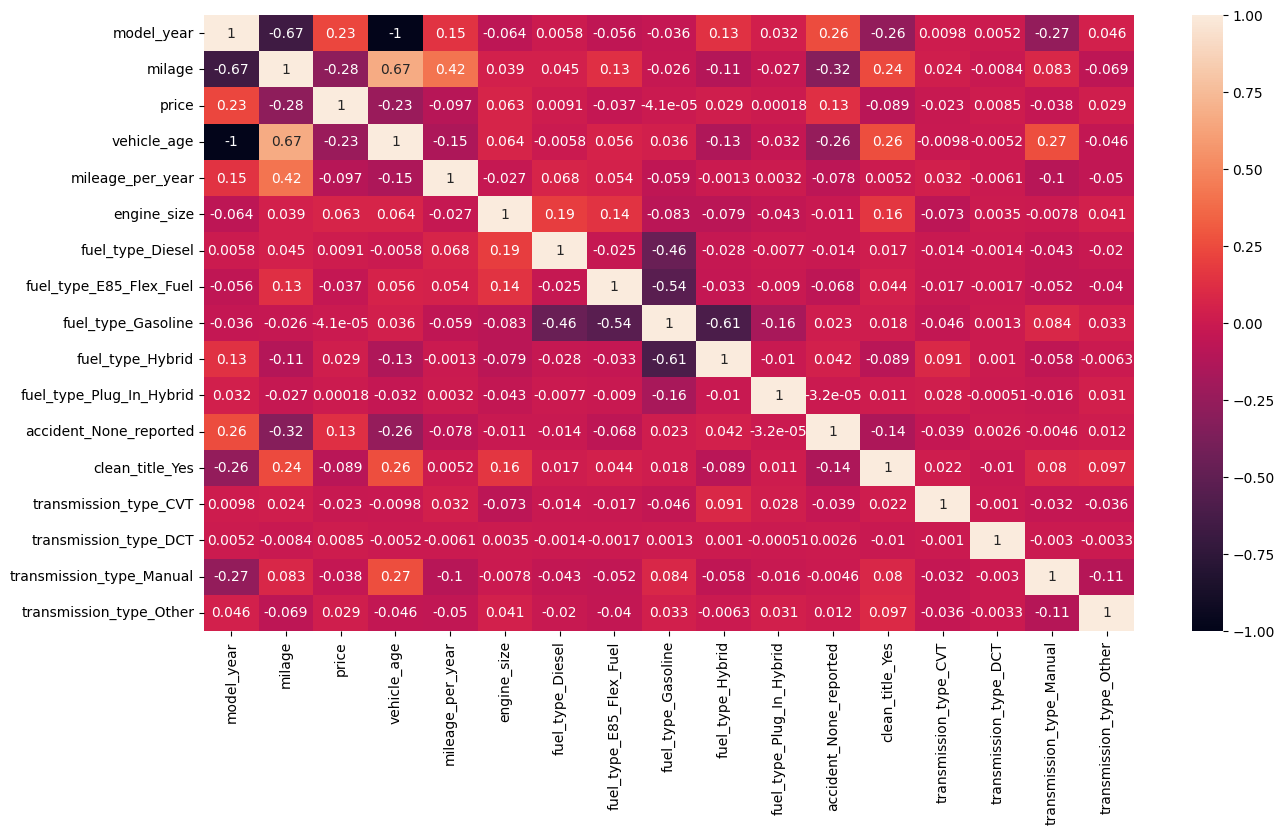

In [172]:
plt.figure(figsize=(15,8))
sns.heatmap(final_train_ohe_df.corr(), annot=True)
plt.show()

### 2. For Test Dataset

In [174]:
final_test_df = test_df.drop(columns=['id','brand','model','engine','transmission','ext_col','int_col'])
final_test_df.head(3)

model_year  milage fuel_type       accident clean_title  vehicle_age  \
0        2015   98000  Gasoline  None reported         Yes            9   
1        2020    9142    Hybrid  None reported         Yes            4   
2        2022   28121  Gasoline  None reported          No            2   

   mileage_per_year  engine_size transmission_type  
0           10889.0          2.0         Automatic  
1            2286.0          3.0         Automatic  
2           14060.0          3.0         Automatic

### Convert Categorical columns to Numerical columns for both the datasets

In [175]:
final_test_ohe_df = pd.get_dummies(final_test_df, columns=['fuel_type','accident','clean_title','transmission_type'], drop_first=True)
final_test_ohe_df = final_test_ohe_df.astype(int)
final_test_ohe_df.head(3)

model_year  milage  vehicle_age  mileage_per_year  engine_size  \
0        2015   98000            9             10889            2   
1        2020    9142            4              2286            3   
2        2022   28121            2             14060            3   

   fuel_type_Diesel  fuel_type_E85 Flex Fuel  fuel_type_Gasoline  \
0                 0                        0                   1   
1                 0                        0                   0   
2                 0                        0                   1   

   fuel_type_Hybrid  fuel_type_Plug-In Hybrid  accident_None reported  \
0                 0                         0                       1   
1                 1                         0                       1   
2                 0                         0                       1   

   clean_title_Yes  transmission_type_CVT  transmission_type_DCT  \
0                1                      0                      0   
1                1                      0                      0   
2                0                      0                      0   

   transmission_type_Manual  transmission_type_Other  
0                         0                        0  
1                         0                        0  
2                         0                        0

In [176]:
final_test_ohe_df.rename(columns = {'fuel_type_E85 Flex Fuel':'fuel_type_E85_Flex_Fuel', 
                                     'fuel_type_Plug-In Hybrid':'fuel_type_Plug_In_Hybrid',
                                    'accident_None reported':'accident_None_reported'}, inplace=True)

In [177]:
final_test_ohe_df.corr()

model_year    milage  vehicle_age  mileage_per_year  \
model_year                  1.000000 -0.675038    -1.000000          0.142927   
milage                     -0.675038  1.000000     0.675038          0.413722   
vehicle_age                -1.000000  0.675038     1.000000         -0.142927   
mileage_per_year            0.142927  0.413722    -0.142927          1.000000   
engine_size                -0.063624  0.037737     0.063624         -0.025848   
fuel_type_Diesel            0.006001  0.040018    -0.006001          0.064345   
fuel_type_E85_Flex_Fuel    -0.054904  0.129334     0.054904          0.057062   
fuel_type_Gasoline         -0.036966 -0.021839     0.036966         -0.058082   
fuel_type_Hybrid            0.136773 -0.114794    -0.136773         -0.001731   
fuel_type_Plug_In_Hybrid    0.030513 -0.027416    -0.030513         -0.000023   
accident_None_reported      0.257548 -0.324673    -0.257548         -0.073627   
clean_title_Yes            -0.264495  0.241093     0.264495          0.002723   
transmission_type_CVT       0.012173  0.018886    -0.012173          0.031185   
transmission_type_DCT       0.007079 -0.009651    -0.007079         -0.006883   
transmission_type_Manual   -0.264455  0.081490     0.264455         -0.097096   
transmission_type_Other     0.050776 -0.076937    -0.050776         -0.050033   

                          engine_size  fuel_type_Diesel  \
model_year                  -0.063624          0.006001   
milage                       0.037737          0.040018   
vehicle_age                  0.063624         -0.006001   
mileage_per_year            -0.025848          0.064345   
engine_size                  1.000000          0.192380   
fuel_type_Diesel             0.192380          1.000000   
fuel_type_E85_Flex_Fuel      0.142269         -0.025094   
fuel_type_Gasoline          -0.082411         -0.459948   
fuel_type_Hybrid            -0.081031         -0.029048   
fuel_type_Plug_In_Hybrid    -0.043050         -0.007662   
accident_None_reported      -0.012178         -0.014585   
clean_title_Yes              0.159944          0.017755   
transmission_type_CVT       -0.076160         -0.014080   
transmission_type_DCT        0.004262         -0.001382   
transmission_type_Manual    -0.010319         -0.042665   
transmission_type_Other      0.045407         -0.019323   

                          fuel_type_E85_Flex_Fuel  fuel_type_Gasoline  \
model_year                              -0.054904           -0.036966   
milage                                   0.129334           -0.021839   
vehicle_age                              0.054904            0.036966   
mileage_per_year                         0.057062           -0.058082   
engine_size                              0.142269           -0.082411   
fuel_type_Diesel                        -0.025094           -0.459948   
fuel_type_E85_Flex_Fuel                  1.000000           -0.528561   
fuel_type_Gasoline                      -0.528561            1.000000   
fuel_type_Hybrid                        -0.033381           -0.611836   
fuel_type_Plug_In_Hybrid                -0.008805           -0.161385   
accident_None_reported                  -0.062478            0.015694   
clean_title_Yes                          0.043513            0.021700   
transmission_type_CVT                   -0.017530           -0.050976   
transmission_type_DCT                   -0.001589            0.003006   
transmission_type_Manual                -0.050121            0.083739   
transmission_type_Other                 -0.040290            0.032116   

                          fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  \
model_year                        0.136773                  0.030513   
milage                           -0.114794                 -0.027416   
vehicle_age                      -0.136773                 -0.030513   
mileage_per_year                 -0.001731                 -0.000023   
engine_size                      -0.081031

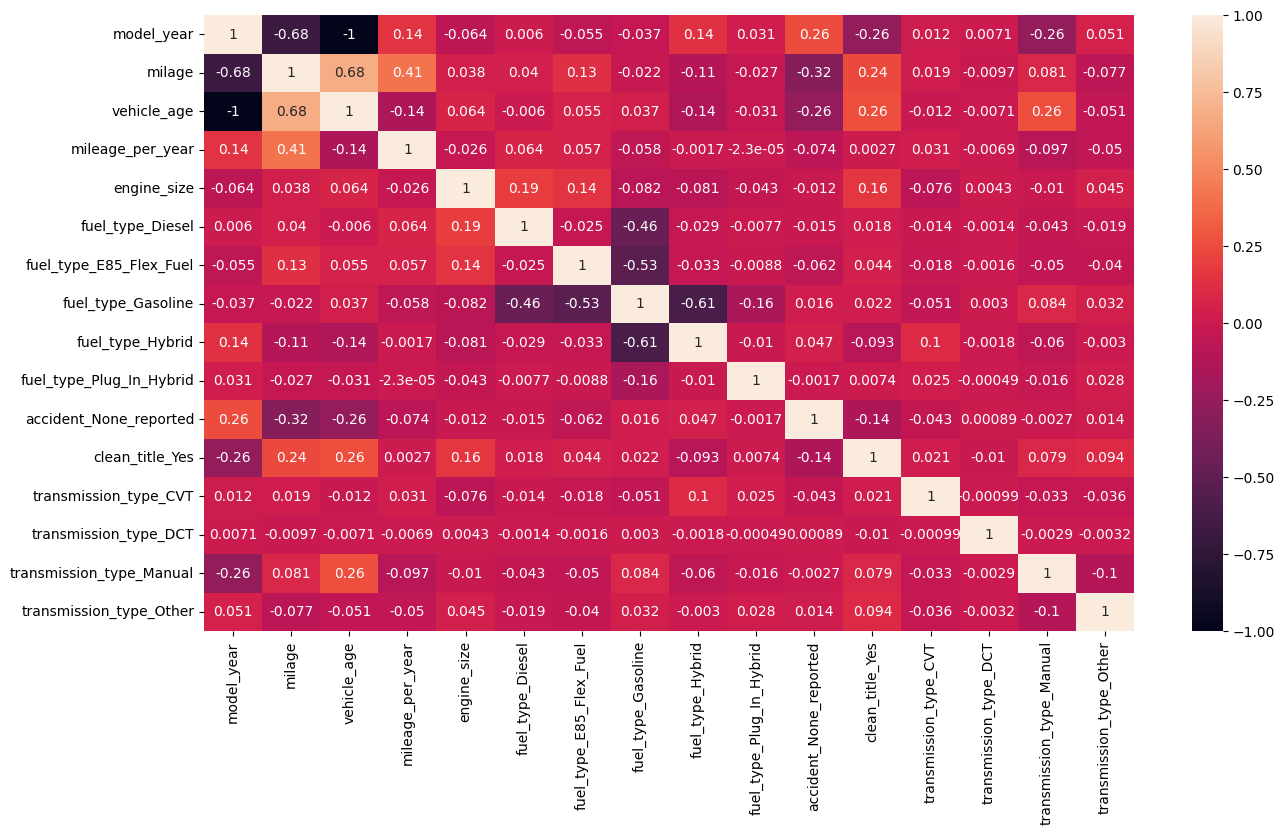

In [178]:
plt.figure(figsize=(15,8))
sns.heatmap(final_test_ohe_df.corr(), annot=True)
plt.show()

## Split the Train Data into train and valid dataset 

In [179]:
from sklearn.model_selection import train_test_split as tts
train, validation = tts(final_train_ohe_df, test_size=0.2, random_state=42)

In [180]:
train.shape

(150826, 17)

In [181]:
validation.shape

(37707, 17)

## Check the skewness in the dataset and remove it

### 1. For Train Dataset

In [182]:
train.skew()

model_year                   -1.045366
milage                        0.895177
price                        20.387448
vehicle_age                   1.045366
mileage_per_year              5.331072
engine_size                   0.240110
fuel_type_Diesel              6.757201
fuel_type_E85_Flex_Fuel       5.646155
fuel_type_Gasoline           -2.816728
fuel_type_Hybrid              4.977806
fuel_type_Plug_In_Hybrid     18.583264
accident_None_reported       -1.349616
clean_title_Yes              -2.443274
transmission_type_CVT         9.426973
transmission_type_DCT       100.260993
transmission_type_Manual      2.923416
transmission_type_Other       2.599423
dtype: float64

## Use Log transformation to remove skewness

In [183]:
log_train = np.log(train+1)
log_train.head(3)

model_year     milage      price  vehicle_age  mileage_per_year  \
184031    7.609862  11.029650  10.085851     2.079442          9.083870   
173831    7.602900  12.128117   9.018090     3.091042          9.083756   
183819    7.611348  11.429555  10.308986     1.609438         10.043293   

        engine_size  fuel_type_Diesel  fuel_type_E85_Flex_Fuel  \
184031     1.098612               0.0                 0.693147   
173831     1.609438               0.0                 0.000000   
183819     1.098612               0.0                 0.000000   

        fuel_type_Gasoline  fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  \
184031            0.000000               0.0                       0.0   
173831            0.693147               0.0                       0.0   
183819            0.693147               0.0                       0.0   

        accident_None_reported  clean_title_Yes  transmission_type_CVT  \
184031                     0.0         0.693147                    0.0   
173831                     0.0         0.693147                    0.0   
183819                     0.0         0.693147                    0.0   

        transmission_type_DCT  transmission_type_Manual  \
184031                    0.0                       0.0   
173831                    0.0                       0.0   
183819                    0.0                       0.0   

        transmission_type_Other  
184031                 0.693147  
173831                 0.000000  
183819                 0.000000

In [184]:
log_train.skew()

model_year                   -1.052497
milage                       -1.362856
price                         0.109299
vehicle_age                  -0.182362
mileage_per_year             -2.349485
engine_size                  -1.354671
fuel_type_Diesel              6.757201
fuel_type_E85_Flex_Fuel       5.646155
fuel_type_Gasoline           -2.816728
fuel_type_Hybrid              4.977806
fuel_type_Plug_In_Hybrid     18.583264
accident_None_reported       -1.349616
clean_title_Yes              -2.443274
transmission_type_CVT         9.426973
transmission_type_DCT       100.260993
transmission_type_Manual      2.923416
transmission_type_Other       2.599423
dtype: float64

sns.pairplot(data=log_train, diag_kind='kde')
plt.show()

## Use Standard Scaler For Scaling all the features

In [185]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = log_train
scaled_log_train = sc.fit_transform(X)
scaled_log_train

array([[ 0.20864366,  0.32313809, -0.24380512, ..., -0.00997308,
        -0.3093367 ,  2.93958167],
       [-2.27022103,  1.27791164, -1.50941596, ..., -0.00997308,
        -0.3093367 , -0.34018446],
       [ 0.73759117,  0.67073026,  0.02067572, ..., -0.00997308,
        -0.3093367 , -0.34018446],
       ...,
       [ 0.91373254, -0.26084797,  1.44474291, ..., -0.00997308,
        -0.3093367 , -0.34018446],
       [-0.8516145 ,  1.28259727, -1.75075448, ..., -0.00997308,
        -0.3093367 , -0.34018446],
       [ 1.26575409, -1.70363702,  2.1437459 , ..., -0.00997308,
        -0.3093367 , -0.34018446]])

In [186]:
scaled_log_train = pd.DataFrame(scaled_log_train)
scaled_log_train.head(3)

0         1         2         3         4         5         6   \
0  0.208644  0.323138 -0.243805  0.086598  0.312579 -0.747748 -0.144885   
1 -2.270221  1.277912 -1.509416  1.671540  0.312447  0.575290 -0.144885   
2  0.737591  0.670730  0.020676 -0.649787  1.420937 -0.747748 -0.144885   

         7         8         9         10        11        12        13  \
0  5.817980 -3.135616 -0.193381 -0.053657 -1.881183  0.357098 -0.104912   
1 -0.171881  0.318917 -0.193381 -0.053657 -1.881183  0.357098 -0.104912   
2 -0.171881  0.318917 -0.193381 -0.053657 -1.881183  0.357098 -0.104912   

         14        15        16  
0 -0.009973 -0.309337  2.939582  
1 -0.009973 -0.309337 -0.340184  
2 -0.009973 -0.309337 -0.340184

In [187]:
scaled_log_train.columns = train.columns

In [188]:
scaled_log_train.head(3)

model_year    milage     price  vehicle_age  mileage_per_year  engine_size  \
0    0.208644  0.323138 -0.243805     0.086598          0.312579    -0.747748   
1   -2.270221  1.277912 -1.509416     1.671540          0.312447     0.575290   
2    0.737591  0.670730  0.020676    -0.649787          1.420937    -0.747748   

   fuel_type_Diesel  fuel_type_E85_Flex_Fuel  fuel_type_Gasoline  \
0         -0.144885                 5.817980           -3.135616   
1         -0.144885                -0.171881            0.318917   
2         -0.144885                -0.171881            0.318917   

   fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  accident_None_reported  \
0         -0.193381                 -0.053657               -1.881183   
1         -0.193381                 -0.053657               -1.881183   
2         -0.193381                 -0.053657               -1.881183   

   clean_title_Yes  transmission_type_CVT  transmission_type_DCT  \
0         0.357098              -0.104912              -0.009973   
1         0.357098              -0.104912              -0.009973   
2         0.357098              -0.104912              -0.009973   

   transmission_type_Manual  transmission_type_Other  
0                 -0.309337                 2.939582  
1                 -0.309337                -0.340184  
2                 -0.309337                -0.340184

### For Validation Dataset

In [189]:
validation.skew()

model_year                   -1.041250
milage                        0.894739
price                        19.559751
vehicle_age                   1.041250
mileage_per_year              5.818880
engine_size                   0.251488
fuel_type_Diesel              6.417152
fuel_type_E85_Flex_Fuel       5.657795
fuel_type_Gasoline           -2.768474
fuel_type_Hybrid              4.906163
fuel_type_Plug_In_Hybrid     20.628253
accident_None_reported       -1.344193
clean_title_Yes              -2.403675
transmission_type_CVT         9.386044
transmission_type_DCT       112.102631
transmission_type_Manual      2.935364
transmission_type_Other       2.606090
dtype: float64

sns.pairplot(data=validation, diag_kind='kde')
plt.show()

## Use Log transformation to remove skewness

In [190]:
log_valid = np.log(validation+1)
log_valid.head(3)

model_year     milage      price  vehicle_age  mileage_per_year  \
111355    7.612337  10.072302  10.545341     1.098612          9.379154   
182258    7.603399  10.819798  10.308986     3.044522          7.824446   
14147     7.610853  11.605021  10.195149     1.791759          9.995611   

        engine_size  fuel_type_Diesel  fuel_type_E85_Flex_Fuel  \
111355     1.386294               0.0                      0.0   
182258     1.386294               0.0                      0.0   
14147      1.386294               0.0                      0.0   

        fuel_type_Gasoline  fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  \
111355            0.693147               0.0                       0.0   
182258            0.693147               0.0                       0.0   
14147             0.693147               0.0                       0.0   

        accident_None_reported  clean_title_Yes  transmission_type_CVT  \
111355                0.693147         0.000000                    0.0   
182258                0.693147         0.000000                    0.0   
14147                 0.693147         0.693147                    0.0   

        transmission_type_DCT  transmission_type_Manual  \
111355                    0.0                       0.0   
182258                    0.0                       0.0   
14147                     0.0                       0.0   

        transmission_type_Other  
111355                      0.0  
182258                      0.0  
14147                       0.0

In [191]:
log_valid.skew()

model_year                   -1.047830
milage                       -1.308927
price                         0.102154
vehicle_age                  -0.180155
mileage_per_year             -2.429669
engine_size                  -1.339736
fuel_type_Diesel              6.417152
fuel_type_E85_Flex_Fuel       5.657795
fuel_type_Gasoline           -2.768474
fuel_type_Hybrid              4.906163
fuel_type_Plug_In_Hybrid     20.628253
accident_None_reported       -1.344193
clean_title_Yes              -2.403675
transmission_type_CVT         9.386044
transmission_type_DCT       112.102631
transmission_type_Manual      2.935364
transmission_type_Other       2.606090
dtype: float64

sns.pairplot(data=log_valid, diag_kind='kde')
plt.show()

## Use Standard Scaler For Scaling all the features

In [192]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = log_valid
scaled_log_valid = sc.fit_transform(X)
scaled_log_valid

array([[ 1.08118836, -0.50041972,  0.29849514, ..., -0.00892004,
        -0.30830408, -0.33950222],
       [-2.08676101,  0.14825796,  0.01916731, ..., -0.00892004,
        -0.30830408, -0.33950222],
       [ 0.55515911,  0.82967467, -0.11536645, ..., -0.00892004,
        -0.30830408, -0.33950222],
       ...,
       [-0.49924714,  0.47235764, -0.34736335, ..., -0.00892004,
        -0.30830408, -0.33950222],
       [-0.49924714,  0.87104679, -2.48629789, ..., -0.00892004,
        -0.30830408, -0.33950222],
       [-2.61751625, -1.63558222, -1.22145249, ..., -0.00892004,
         3.24355103, -0.33950222]])

In [193]:
scaled_log_valid = pd.DataFrame(scaled_log_valid)
scaled_log_valid.head(3)

0         1         2         3         4         5         6   \
0  1.081188 -0.500420  0.298495 -1.433055  0.651630 -0.003728 -0.152227   
1 -2.086761  0.148258  0.019167  1.595631 -1.124043 -0.003728 -0.152227   
2  0.555159  0.829675 -0.115366 -0.354215  1.355701 -0.003728 -0.152227   

         7         8         9         10        11        12        13  \
0 -0.171552  0.323436 -0.196003 -0.048366  0.532786 -2.765215 -0.105363   
1 -0.171552  0.323436 -0.196003 -0.048366  0.532786 -2.765215 -0.105363   
2 -0.171552  0.323436 -0.196003 -0.048366  0.532786  0.361636 -0.105363   

        14        15        16  
0 -0.00892 -0.308304 -0.339502  
1 -0.00892 -0.308304 -0.339502  
2 -0.00892 -0.308304 -0.339502

In [194]:
scaled_log_valid.columns = validation.columns

In [195]:
scaled_log_valid.head(3)

model_year    milage     price  vehicle_age  mileage_per_year  engine_size  \
0    1.081188 -0.500420  0.298495    -1.433055          0.651630    -0.003728   
1   -2.086761  0.148258  0.019167     1.595631         -1.124043    -0.003728   
2    0.555159  0.829675 -0.115366    -0.354215          1.355701    -0.003728   

   fuel_type_Diesel  fuel_type_E85_Flex_Fuel  fuel_type_Gasoline  \
0         -0.152227                -0.171552            0.323436   
1         -0.152227                -0.171552            0.323436   
2         -0.152227                -0.171552            0.323436   

   fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  accident_None_reported  \
0         -0.196003                 -0.048366                0.532786   
1         -0.196003                 -0.048366                0.532786   
2         -0.196003                 -0.048366                0.532786   

   clean_title_Yes  transmission_type_CVT  transmission_type_DCT  \
0        -2.765215              -0.105363               -0.00892   
1        -2.765215              -0.105363               -0.00892   
2         0.361636              -0.105363               -0.00892   

   transmission_type_Manual  transmission_type_Other  
0                 -0.308304                -0.339502  
1                 -0.308304                -0.339502  
2                 -0.308304                -0.339502

## For Test Dataset

### Use Log transformation to remove skewness

In [196]:
final_test_ohe_df.skew()

model_year                   -1.036489
milage                        0.909928
vehicle_age                   1.036489
mileage_per_year              5.642137
engine_size                   0.255771
fuel_type_Diesel              6.619469
fuel_type_E85_Flex_Fuel       5.718968
fuel_type_Gasoline           -2.791296
fuel_type_Hybrid              4.890708
fuel_type_Plug_In_Hybrid     19.234835
accident_None_reported       -1.343877
clean_title_Yes              -2.440301
transmission_type_CVT         9.333470
transmission_type_DCT       106.881413
transmission_type_Manual      2.947095
transmission_type_Other       2.603482
dtype: float64

sns.pairplot(data=final_test_ohe_df, diag_kind='kde')
plt.show()

In [197]:
log_test = np.log(final_test_ohe_df+1)
log_test.head(3)

model_year     milage  vehicle_age  mileage_per_year  engine_size  \
0    7.608871  11.492733     2.302585          9.295600     1.098612   
1    7.611348   9.120744     1.609438          7.734996     1.386294   
2    7.612337  10.244307     1.098612          9.551160     1.386294   

   fuel_type_Diesel  fuel_type_E85_Flex_Fuel  fuel_type_Gasoline  \
0               0.0                      0.0            0.693147   
1               0.0                      0.0            0.000000   
2               0.0                      0.0            0.693147   

   fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  accident_None_reported  \
0          0.000000                       0.0                0.693147   
1          0.693147                       0.0                0.693147   
2          0.000000                       0.0                0.693147   

   clean_title_Yes  transmission_type_CVT  transmission_type_DCT  \
0         0.693147                    0.0                    0.0   
1         0.693147                    0.0                    0.0   
2         0.000000                    0.0                    0.0   

   transmission_type_Manual  transmission_type_Other  
0                       0.0                      0.0  
1                       0.0                      0.0  
2                       0.0                      0.0

In [198]:
log_test.skew()

model_year                   -1.043429
milage                       -1.348404
vehicle_age                  -0.187187
mileage_per_year             -2.392171
engine_size                  -1.342369
fuel_type_Diesel              6.619469
fuel_type_E85_Flex_Fuel       5.718968
fuel_type_Gasoline           -2.791296
fuel_type_Hybrid              4.890708
fuel_type_Plug_In_Hybrid     19.234835
accident_None_reported       -1.343877
clean_title_Yes              -2.440301
transmission_type_CVT         9.333470
transmission_type_DCT       106.881413
transmission_type_Manual      2.947095
transmission_type_Other       2.603482
dtype: float64

sns.pairplot(data=log_test, diag_kind='kde')
plt.show()

## Use Standard Scaler For Scaling all the features

In [199]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = log_test
scaled_log_test = sc.fit_transform(X)
scaled_log_test

array([[-0.13897772,  0.72252191,  0.43135235, ..., -0.00935546,
        -0.30728179, -0.33976449],
       [ 0.74023517, -1.33393732, -0.65282565, ..., -0.00935546,
        -0.30728179, -0.33976449],
       [ 1.09131143, -0.35983387, -1.45182754, ..., -0.00935546,
        -0.30728179, -0.33976449],
       ...,
       [-0.66755275,  0.52055161,  0.84172633, ..., -0.00935546,
        -0.30728179, -0.33976449],
       [-0.66755275,  0.8382894 ,  0.84172633, ..., -0.00935546,
        -0.30728179, -0.33976449],
       [ 0.38881132,  0.39076373, -0.12653656, ..., -0.00935546,
        -0.30728179, -0.33976449]])

In [200]:
scaled_log_test = pd.DataFrame(scaled_log_test)
scaled_log_test.head(3)

0         1         2         3         4         5         6   \
0 -0.138978  0.722522  0.431352  0.557853 -0.753127 -0.147772 -0.169816   
1  0.740235 -1.333937 -0.652826 -1.237798 -0.003763 -0.147772 -0.169816   
2  1.091311 -0.359834 -1.451828  0.851904 -0.003763 -0.147772 -0.169816   

         7         8        9         10        11       12        13  \
0  0.321281 -0.196571 -0.05185  0.532848  0.357436 -0.10594 -0.009355   
1 -3.112543  5.087220 -0.05185  0.532848  0.357436 -0.10594 -0.009355   
2  0.321281 -0.196571 -0.05185  0.532848 -2.797707 -0.10594 -0.009355   

         14        15  
0 -0.307282 -0.339764  
1 -0.307282 -0.339764  
2 -0.307282 -0.339764

In [201]:
scaled_log_test.columns = final_test_ohe_df.columns

In [202]:
scaled_log_test.head(3)

model_year    milage  vehicle_age  mileage_per_year  engine_size  \
0   -0.138978  0.722522     0.431352          0.557853    -0.753127   
1    0.740235 -1.333937    -0.652826         -1.237798    -0.003763   
2    1.091311 -0.359834    -1.451828          0.851904    -0.003763   

   fuel_type_Diesel  fuel_type_E85_Flex_Fuel  fuel_type_Gasoline  \
0         -0.147772                -0.169816            0.321281   
1         -0.147772                -0.169816           -3.112543   
2         -0.147772                -0.169816            0.321281   

   fuel_type_Hybrid  fuel_type_Plug_In_Hybrid  accident_None_reported  \
0         -0.196571                  -0.05185                0.532848   
1          5.087220                  -0.05185                0.532848   
2         -0.196571                  -0.05185                0.532848   

   clean_title_Yes  transmission_type_CVT  transmission_type_DCT  \
0         0.357436               -0.10594              -0.009355   
1         0.357436               -0.10594              -0.009355   
2        -2.797707               -0.10594              -0.009355   

   transmission_type_Manual  transmission_type_Other  
0                 -0.307282                -0.339764  
1                 -0.307282                -0.339764  
2                 -0.307282                -0.339764

## Model Developmment

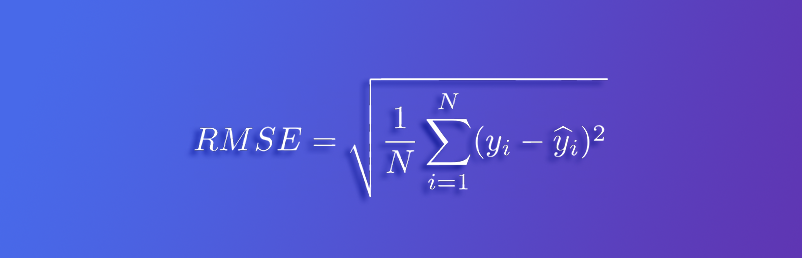

In [203]:
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from xgboost import XGBRegressor

In [204]:
# Make Train and Valid dataset for Modelling
X_train = scaled_log_train.drop(columns = ['price']) # always needs to be dataframe
y_train = scaled_log_train.price # always a Series

X_valid = scaled_log_valid.drop('price',axis=1)
y_valid = scaled_log_valid['price']

In [205]:
print(X_train.shape)
print('-'*30)
print(y_train.shape)
print('-'*30)
print(X_valid.shape)
print('-'*30)
print(y_valid.shape)

(150826, 16)
------------------------------
(150826,)
------------------------------
(37707, 16)
------------------------------
(37707,)


## Linear Regression

In [206]:
# create a model object
lm = LinearRegression()

In [207]:
lm.fit(X_train, y_train)

LinearRegression()

In [208]:
lm.coef_

array([ 0.42735749, -0.33817308, -0.04391678, -0.0056683 ,  0.12194841,
       -0.10238074, -0.16152082, -0.2492856 , -0.17033848, -0.04735364,
        0.07790977, -0.00480993, -0.01688061,  0.00241992,  0.03172713,
        0.04213657])

In [209]:
lm.intercept_

5.216719966055262e-14

In [210]:
pred_y = lm.predict(X_valid)
pred_y

array([ 0.72089256, -0.97526473, -0.02012208, ..., -0.38950577,
       -0.61793604, -0.42582003])

In [211]:
lm_r_square = lm.score(X_valid, y_valid)
lm_r_square

0.5573037773328728

In [212]:
lm_rmse = np.sqrt(mean_squared_error(y_valid,pred_y))
lm_rmse

0.665354208423699

##  Decision Tree

In [213]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt

DecisionTreeRegressor(max_depth=10, random_state=42)

In [214]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [215]:
pred_y1 = dt.predict(X_valid)
pred_y1

array([ 0.59369807, -0.26805561,  0.15382918, ..., -0.3960202 ,
       -1.07826941, -0.65896476])

In [216]:
dt_r_square = dt.score(X_valid,y_valid)
dt_r_square

0.6056593336724077

In [217]:
dt_rmse = np.sqrt(mean_squared_error(y_valid, pred_y1))
dt_rmse

0.6279654977206888

## Random Forest

In [218]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf

RandomForestRegressor(random_state=42)

In [219]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [220]:
pred_y2 = rf.predict(X_valid)
pred_y2

array([ 0.63435632, -0.45585931,  0.14916865, ..., -0.78728123,
       -1.08123301, -0.57798711])

In [221]:
rf_r_square = rf.score(X_valid, y_valid)
rf_r_square

0.5561402514735234

In [222]:
rf_rmse = np.sqrt(mean_squared_error(y_valid, pred_y2))
rf_rmse

0.6662280004071253

## Support Vector Regressor

In [223]:
svr = SVR(C=100)
svr

SVR(C=100)

In [224]:
svr.fit(X_train.sample(frac=0.5, random_state=42), y_train.sample(frac=0.5, random_state=42))

SVR(C=100)

In [225]:
pred_y3 = svr.predict(X_valid)
pred_y3

array([ 0.56221047, -0.41914802,  0.06319936, ..., -0.48261752,
       -1.02391683,  0.80132326])

In [ ]:
svr_r_square = svr.score(X_valid, y_valid)
svr_r_square

In [366]:
svr_rmse = np.sqrt(mean_squared_error(y_valid, pred_y3))
svr_rmse

0.6232521264767145

## KNN Regressor

In [231]:
knn = KNeighborsRegressor(n_neighbors=5)
knn

KNeighborsRegressor()

In [232]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [233]:
pred_y4 = knn.predict(X_valid)
pred_y4

array([ 0.56857949,  0.30578708,  0.0942893 , ..., -0.47256607,
       -1.24856734, -0.33902737])

In [234]:
knn_r_square = knn.score(X_valid, y_valid)
knn_r_square

0.5573980939440847

In [235]:
knn_rmse = np.sqrt(mean_squared_error(y_valid, pred_y4))
knn_rmse

0.6652833276551542

## Final Model Selection on the basis of least RMSE value

In [236]:
submit_df = pd.read_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\sample_submission.csv\sample_submission.csv')
submit_df.head(2)

id      price
0  188533  43878.016
1  188534  43878.016

In [237]:
predict_y = svr.predict(scaled_log_test)

In [238]:
submit_df.shape

(125690, 2)

In [239]:
scaled_log_test.shape

(125690, 16)

In [240]:
submit_df['price'] = predict_y

In [244]:
submit_df.to_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\sample_submission.csv\sample_submission.csv', index=False)

In [246]:
pd.read_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\sample_submission.csv\sample_submission.csv')

id     price
0       188533 -0.682028
1       188534  0.719999
2       188535  0.551830
3       188536 -0.178887
4       188537 -0.057256
...        ...       ...
125685  314218 -0.502581
125686  314219  0.368812
125687  314220 -0.608365
125688  314221 -0.949159
125689  314222  0.249257

[125690 rows x 2 columns]

## Do the Inverse Transformation to get the Original Price Values

In [247]:
submit_df['price'] = np.exp(submit_df['price'])
submit_df['price']

0         0.505590
1         2.054432
2         1.736428
3         0.836201
4         0.944352
            ...   
125685    0.604967
125686    1.446016
125687    0.544240
125688    0.387066
125689    1.283072
Name: price, Length: 125690, dtype: float64

In [248]:
std_dev = train.price.std()
std_dev

79845.88169169854

In [249]:
mean = train.price.mean()
mean

43890.78531552915

In [250]:
submit_df['price'] = (submit_df['price'] * std_dev) + mean

In [251]:
submit_df.to_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\sample_submission.csv\sample_submission.csv', index=False)

In [253]:
submission_df = pd.read_csv(r'C:\Users\Aaqui\OneDrive\Desktop\Scaler\Module 9 - DA Portfolio\Portolio Project\Project 1 -  Used car price\sample_submission.csv\sample_submission.csv')
submission_df

id          price
0       188533   84260.103818
1       188534  207928.732986
2       188535  182537.377780
3       188536  110657.953082
4       188537  119293.436357
...        ...            ...
125685  314218   92194.918084
125686  314219  159349.242517
125687  314220   87346.086603
125688  314221   74796.442015
125689  314222  146338.797982

[125690 rows x 2 columns]

# Hence we have predict the Price of Car with 0.6232 RMSE value

# Description


__Project Title:__ Used Car Price Prediction

__Description:__ Developed a predictive model to estimate the prices of used cars based on various features such as vehicle age, mileage, fuel type,transmission and many more. Leveraged support vector regression (SVR) to handle the non-linear relationships between car attributes and their market price effectively. The SVR model was chosen for its robustness in managing high-dimensional data and minimizing prediction error.

__Key Highlights:__

- Implemented thorough data preprocessing, including handling missing values, feature engineering, EDA, Hypothesis Testing.
- Conducted data normalization and scaling to prepare for model building  ensuring better convergence and prediction performance.
- Evaluated model performance using metrics like RMSE to validate predictive accuracy. SVR has the least RMSE value among others Algorithms.
- Delivered final price predictions and demonstrated model deployment readiness for real-world applications.
- This project showcased advanced data handling, modeling techniques, and effective use of machine learning algorithms to solve regression problems.